In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pymannkendall import original_test

from dataflow import df_train, df_test, df_geography, df_product

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Tắt tất cả cảnh báo
warnings.filterwarnings('ignore')


In [2]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


ProductID       Date    Zip  Units    Revenue          COGS  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660   
1        781 2014-03-12  90501     16   20351.52  13497.128064   
2       2090 2013-11-29  44460     26  111367.62  91488.499830   
3       1116 2018-08-29  30122     12   36280.44  21967.806420   
4        993 2013-04-27  75789     14   55557.18  48645.866808   

                 City State   Region      District Category       Segment  \
0          Austin, TX    TX  Central  District #23    Urban   Convenience   
1        Torrance, CA    CA     West  District #37    Rural  Productivity   
2           Salem, OH    OH     East  District #14    Urban   Convenience   
3  Lithia Springs, GA    GA     East  District #09    Rural        Select   
4           Troup, TX    TX  Central  District #24    Urban   Convenience   

        Product  
0   Pirum UC-30  
1  Natura RP-69  
2  Currus UC-25  
3   Pirum RS-04  
4  Natura UC-56

In [4]:
#sort df by Zip
df1 = df.sort_values(by=['Zip', 'Date'])
df1

ProductID       Date    Zip  Units   Revenue         COGS  \
81633         609 2011-03-10   1001      1  10202.85  8794.856700   
873462       2284 2011-03-30   1001      1   3716.37  2000.893608   
454107       1005 2011-04-01   1001      1   1290.87   746.510121   
335351        617 2011-04-19   1001      1  10136.70  6670.962270   
504627        915 2011-05-01   1001      1   6677.37  6479.052111   
...           ...        ...    ...    ...       ...          ...   
440003       2099 2013-04-01  99928      1   4913.37  4428.911718   
752484       2393 2016-05-17  99929      1   1259.37  1371.705804   
861219        702 2019-03-26  99929      1   3779.37  3358.726119   
14011        2199 2020-04-26  99929      2   2890.44  3008.948040   
278188          8 2019-04-15  99950      1   5830.65  4040.057385   

                 City State Region      District Category      Segment  \
81633      Agawam, MA    MA   East  District #02    Urban  Convenience   
873462     Agawam, MA    MA   East  District #02    Rural       Select   
454107     Agawam, MA    MA   East  District #02    Youth        Youth   
335351     Agawam, MA    MA   East  District #02    Urban  Convenience   
504627     Agawam, MA    MA   East  District #02    Urban      Extreme   
...               ...   ...    ...           ...      ...          ...   
440003  Ward Cove, AK    AK   West  District #34    Youth        Youth   
752484   Wrangell, AK    AK   West  District #34    Youth        Youth   
861219   Wrangell, AK    AK   West  District #34      Mix   All Season   
14011    Wrangell, AK    AK   West  District #34      Mix   All Season   
278188  Ketchikan, AK    AK   West  District #34      Mix   All Season   

              Product  
81633   Maximus UC-74  
873462   Aliqui RS-17  
454107   Natura YY-06  
335351  Maximus UC-82  
504627   Natura UE-24  
...               ...  
440003   Currus YY-03  
752484   Aliqui YY-02  
861219   Natura MA-09  
14011    Aliqui MA-13  
278188    Abbas MA-08  

[901561 rows x 13 columns]

`Segment` (Phân khúc):
- Productivity: Hướng đến khách hàng tìm kiếm sản phẩm tăng năng suất công việc hoặc cuộc sống.
- Convenience: Dành cho khách hàng ưu tiên sự tiện lợi, dễ sử dụng và tiết kiệm thời gian.
- Moderation: Nhắm đến khách hàng có nhu cầu tiêu dùng trung bình, cân bằng giữa giá cả và chất lượng.
- Extreme: Dành cho khách hàng có nhu cầu cao, sẵn sàng chi trả cho các sản phẩm cao cấp.
- Youth: Dành cho khách hàng trẻ tuổi, thích các sản phẩm thời trang, sáng tạo và theo xu hướng.
- Select: Nhắm đến khách hàng chọn lọc, tìm kiếm sản phẩm đặc biệt nhưng không quá xa xỉ.
- All Season: Các sản phẩm sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- Regular: Dành cho khách hàng tìm kiếm sản phẩm ổn định, bền bỉ và lâu dài.

`Category` (Danh mục):
- Urban: Sản phẩm phục vụ nhu cầu tiêu dùng ở các khu vực đô thị với cơ sở hạ tầng phát triển.
- Rural: Sản phẩm phục vụ khách hàng ở khu vực nông thôn với nhu cầu cơ bản và giá cả hợp lý.
- Mix: Sản phẩm phù hợp cho cả thành thị và nông thôn, hoặc sự kết hợp giữa các yếu tố khác nhau.
- Youth: Sản phẩm nhắm đến giới trẻ, yêu thích sự sáng tạo, thời trang và xu hướng mới.

# I. Phân tích theo Category


## 1. Kiểm tra dữ liệu cơ bản

In [ ]:
print(df.info())

print(df["Category"].isnull().sum())

print(df["Category"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB
None
0
Category
Urban    502142
Rural    322288
Youth     46678
Mix       30453
Name: c

## 2. Phân bố dữ liệu


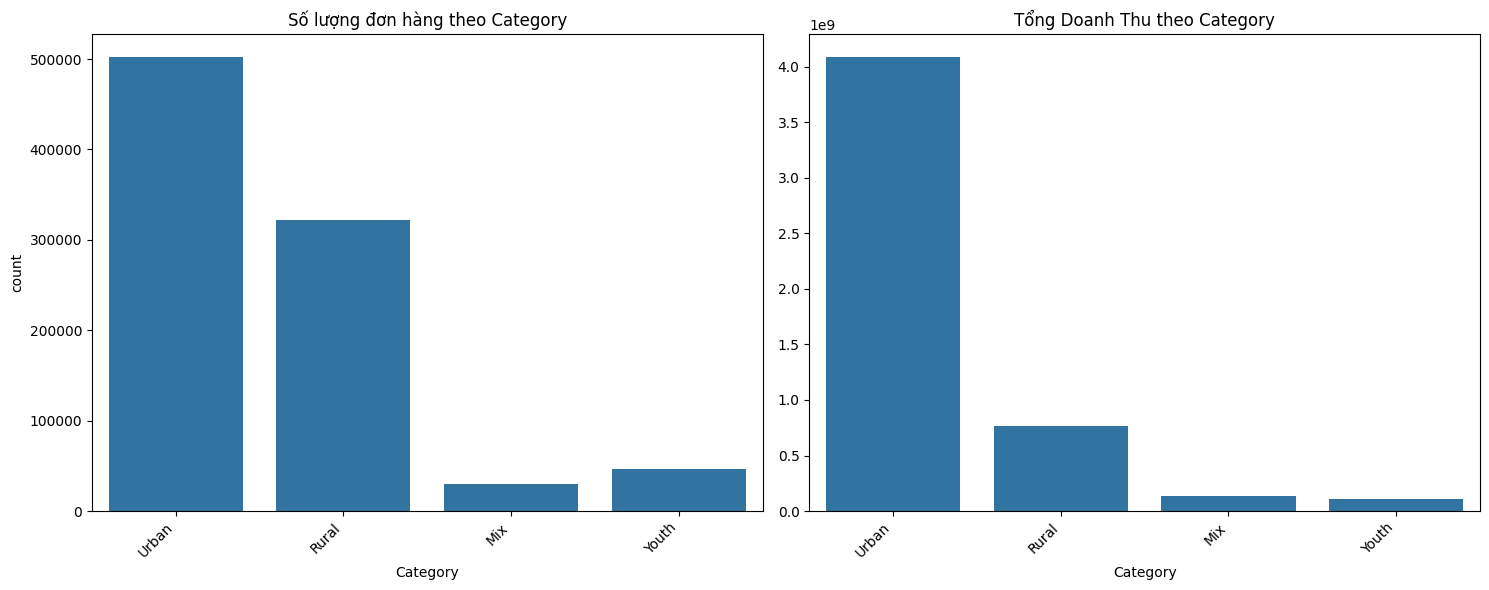

In [ ]:
fig_category, axes_category = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x="Category", data=df, ax=axes_category[0])
axes_category[0].set_title("Số lượng đơn hàng theo Category")
axes_category[0].set_xticklabels(axes_category[0].get_xticklabels(), rotation=45, ha='right')

category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values, ax=axes_category[1])
axes_category[1].set_title("Tổng Doanh Thu theo Category")
axes_category[1].set_xticklabels(axes_category[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


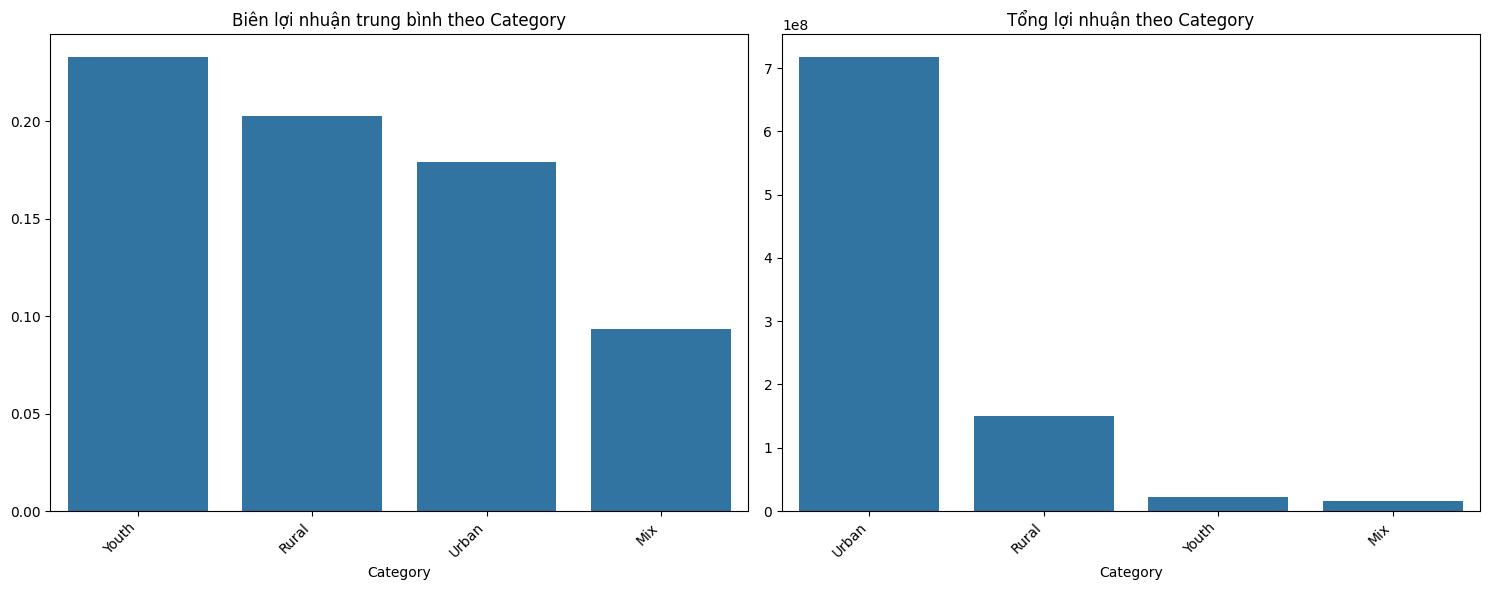

In [ ]:
df["Total Profit"] = df["Revenue"] - df["COGS"]
df["Profit Margin"] = df["Total Profit"] / df["Revenue"]

category_profit = df.groupby("Category")["Profit Margin"].mean().sort_values(ascending=False)
segment_profit = df.groupby("Segment")["Profit Margin"].mean().sort_values(ascending=False)


category_total_profit = df.groupby("Category")["Total Profit"].sum().sort_values(ascending=False)
segment_total_profit = df.groupby("Segment")["Total Profit"].sum().sort_values(ascending=False)


fig_category, axes_category = plt.subplots(1, 2, figsize=(15, 6))


sns.barplot(x=category_profit.index, y=category_profit.values, ax=axes_category[0])
axes_category[0].set_title("Biên lợi nhuận trung bình theo Category")
axes_category[0].set_xticklabels(axes_category[0].get_xticklabels(), rotation=45, ha='right')


sns.barplot(x=category_total_profit.index, y=category_total_profit.values, ax=axes_category[1])
axes_category[1].set_title("Tổng lợi nhuận theo Category")
axes_category[1].set_xticklabels(axes_category[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

`Category:`
- Urban có doanh thu vượt trội, phản ánh nhu cầu tiêu dùng cao tại các khu vực thành thị, nơi có thị trường lớn và đông đúc. Các sản phẩm trong phân khúc này cần tiếp tục phát triển để đáp ứng các nhu cầu đa dạng và tăng trưởng bền vững.
- Rural có doanh thu thấp hơn nhưng vẫn có tiềm năng đáng kể. Các chiến lược sản phẩm và giá cần điều chỉnh để phục vụ nhu cầu tiêu dùng ở khu vực nông thôn, nơi có đặc thù và sự khác biệt về lối sống và thói quen tiêu dùng.
- Mix và Youth có doanh thu khiêm tốn, cho thấy các phân khúc này cần được nghiên cứu và điều chỉnh chiến lược rõ ràng hơn. Việc phát triển sản phẩm phù hợp và xây dựng chiến lược tiếp thị hiệu quả sẽ giúp tăng trưởng doanh thu trong tương lai.





## 3. Xu hướng theo thời gian

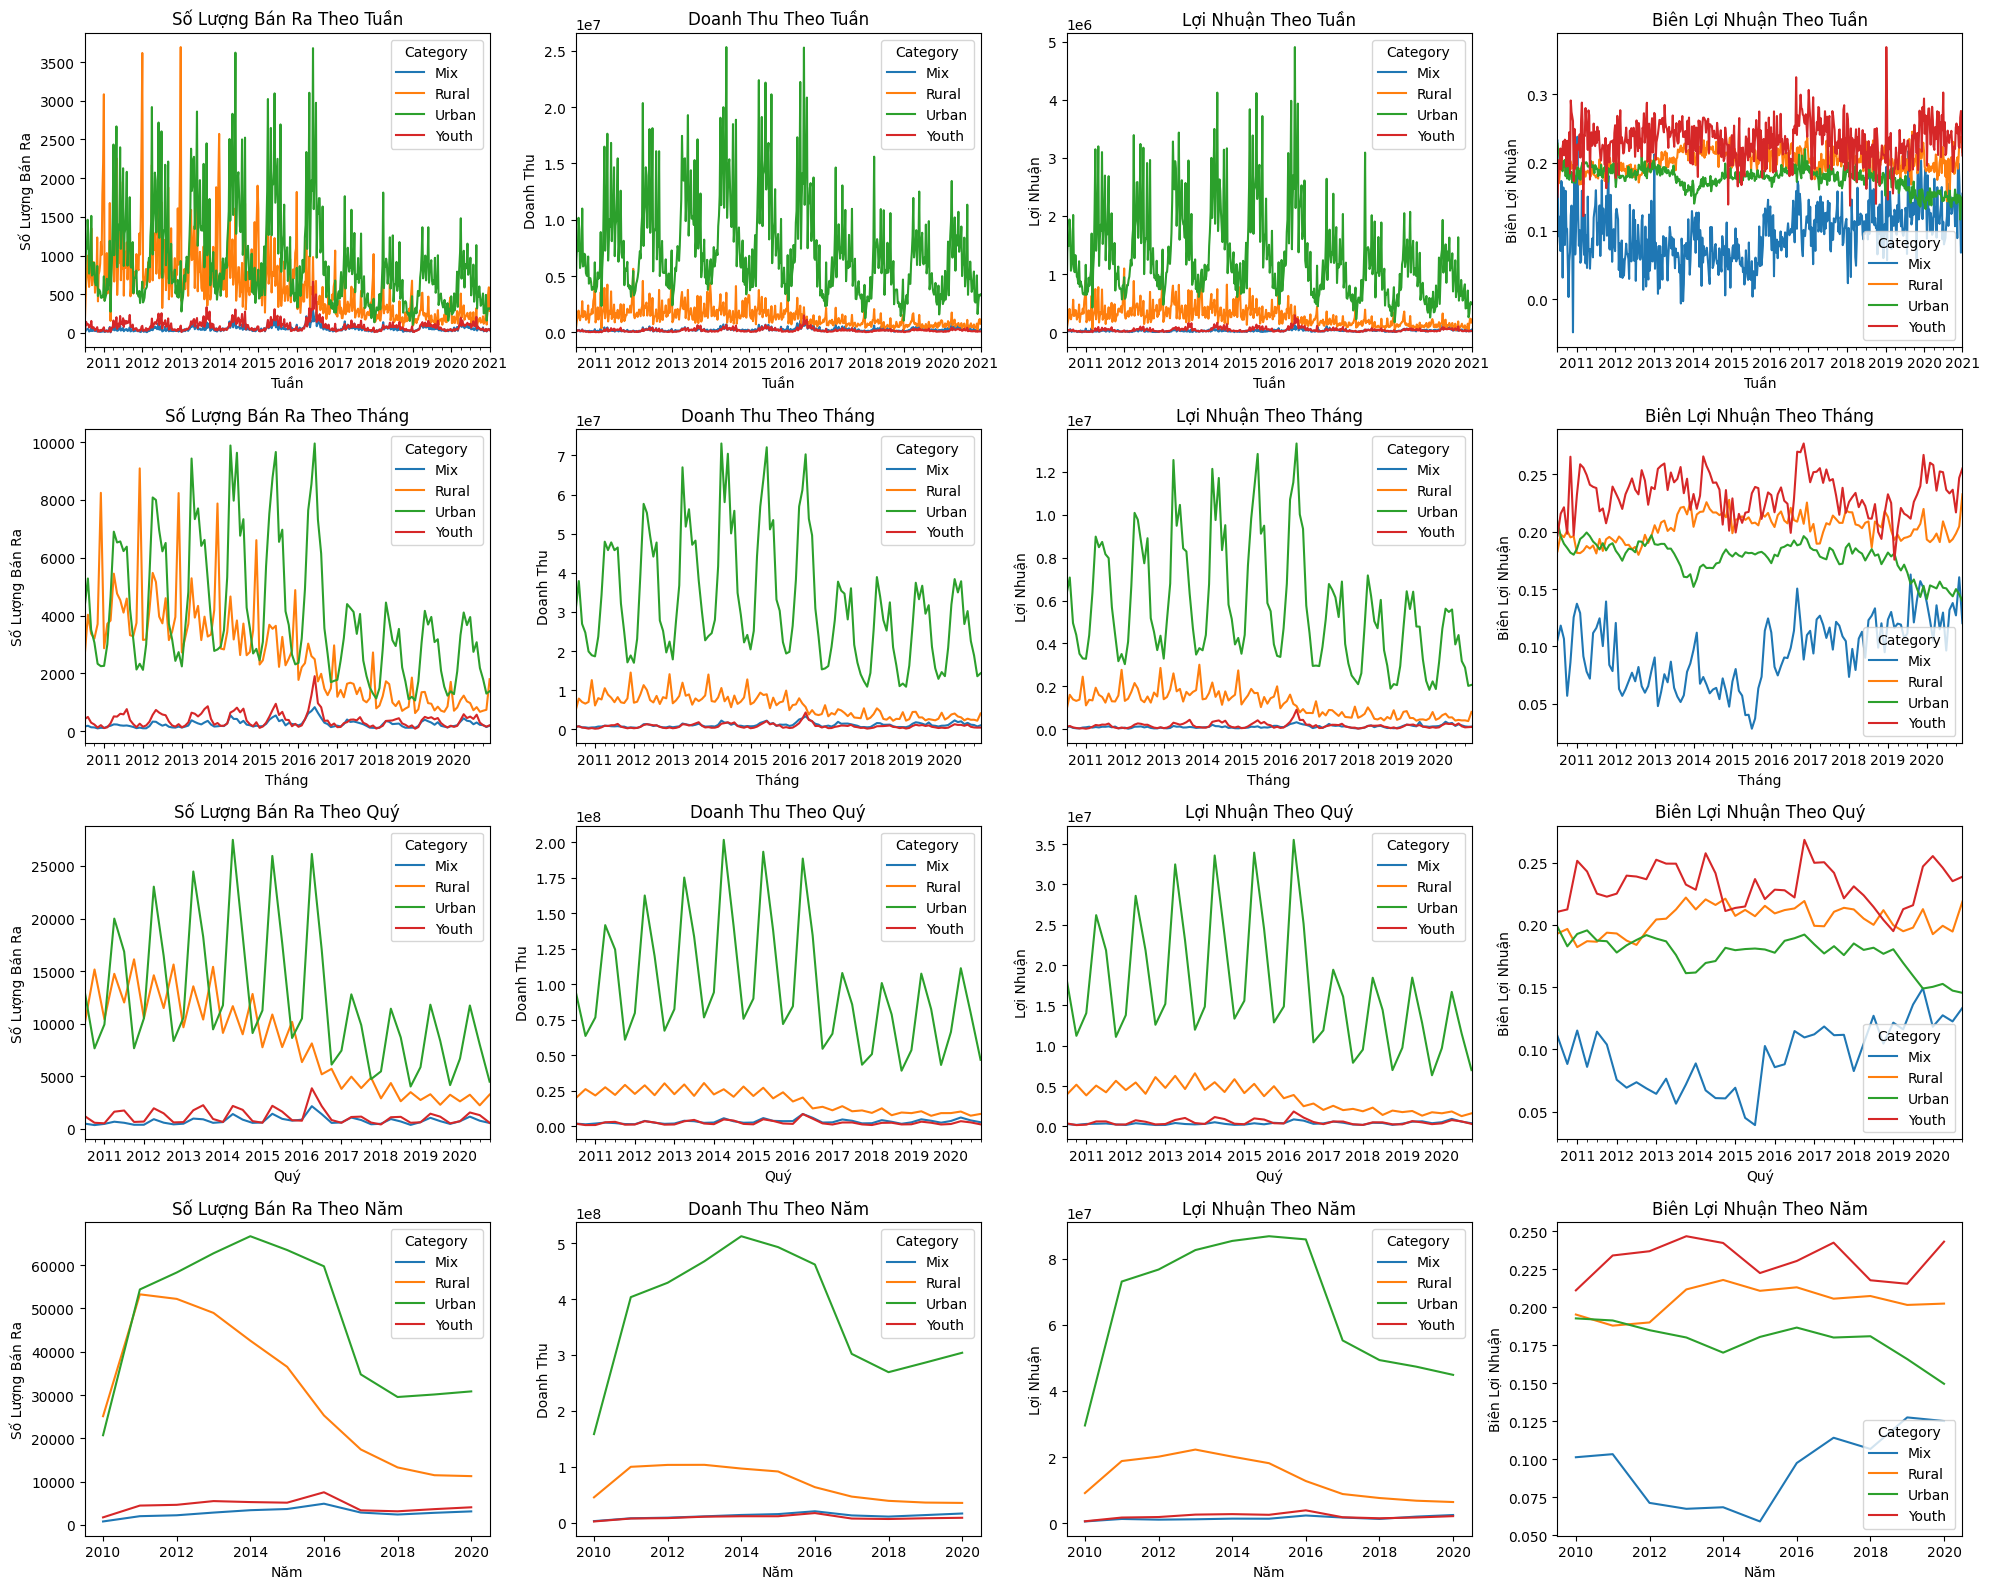

In [ ]:
df['Profit'] = df['Revenue'] - df['COGS']
df['Profit Margin'] = df['Profit'] / df['Revenue']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.to_period('W')
df['Quarter'] = df['Date'].dt.to_period('Q')


units_by_year_category = df.groupby(['Year', 'Category'])['Units'].sum().unstack()
revenue_by_year_category = df.groupby(['Year', 'Category'])['Revenue'].sum().unstack()
profit_by_year_category = df.groupby(['Year', 'Category'])['Profit'].sum().unstack()
profit_margin_by_year_category = df.groupby(['Year', 'Category'])['Profit Margin'].mean().unstack()

units_by_month_category = df.groupby(['Month', 'Category'])['Units'].sum().unstack()
revenue_by_month_category = df.groupby(['Month', 'Category'])['Revenue'].sum().unstack()
profit_by_month_category = df.groupby(['Month', 'Category'])['Profit'].sum().unstack()
profit_margin_by_month_category = df.groupby(['Month', 'Category'])['Profit Margin'].mean().unstack()

units_by_week_category = df.groupby(['Week', 'Category'])['Units'].sum().unstack()
revenue_by_week_category = df.groupby(['Week', 'Category'])['Revenue'].sum().unstack()
profit_by_week_category = df.groupby(['Week', 'Category'])['Profit'].sum().unstack()
profit_margin_by_week_category = df.groupby(['Week', 'Category'])['Profit Margin'].mean().unstack()

units_by_quarter_category = df.groupby(['Quarter', 'Category'])['Units'].sum().unstack()
revenue_by_quarter_category = df.groupby(['Quarter', 'Category'])['Revenue'].sum().unstack()
profit_by_quarter_category = df.groupby(['Quarter', 'Category'])['Profit'].sum().unstack()
profit_margin_by_quarter_category = df.groupby(['Quarter', 'Category'])['Profit Margin'].mean().unstack()

fig, axes = plt.subplots(4, 4, figsize=(20, 16))

def plot_time_series(axes, data, title, xlabel, ylabel, row, col):
    data.plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel(xlabel)
    axes[row, col].set_ylabel(ylabel)
    axes[row, col].legend(title='Category')

# Biểu đồ theo tuần
plot_time_series(axes, units_by_week_category, 'Số Lượng Bán Ra Theo Tuần', 'Tuần', 'Số Lượng Bán Ra', 0, 0)
plot_time_series(axes, revenue_by_week_category, 'Doanh Thu Theo Tuần', 'Tuần', 'Doanh Thu', 0, 1)
plot_time_series(axes, profit_by_week_category, 'Lợi Nhuận Theo Tuần', 'Tuần', 'Lợi Nhuận', 0, 2)
plot_time_series(axes, profit_margin_by_week_category, 'Biên Lợi Nhuận Theo Tuần', 'Tuần', 'Biên Lợi Nhuận', 0, 3)

# Biểu đồ theo tháng
plot_time_series(axes, units_by_month_category, 'Số Lượng Bán Ra Theo Tháng', 'Tháng', 'Số Lượng Bán Ra', 1, 0)
plot_time_series(axes, revenue_by_month_category, 'Doanh Thu Theo Tháng', 'Tháng', 'Doanh Thu', 1, 1)
plot_time_series(axes, profit_by_month_category, 'Lợi Nhuận Theo Tháng', 'Tháng', 'Lợi Nhuận', 1, 2)
plot_time_series(axes, profit_margin_by_month_category, 'Biên Lợi Nhuận Theo Tháng', 'Tháng', 'Biên Lợi Nhuận', 1, 3)

# Biểu đồ theo quý
plot_time_series(axes, units_by_quarter_category, 'Số Lượng Bán Ra Theo Quý', 'Quý', 'Số Lượng Bán Ra', 2, 0)
plot_time_series(axes, revenue_by_quarter_category, 'Doanh Thu Theo Quý', 'Quý', 'Doanh Thu', 2, 1)
plot_time_series(axes, profit_by_quarter_category, 'Lợi Nhuận Theo Quý', 'Quý', 'Lợi Nhuận', 2, 2)
plot_time_series(axes, profit_margin_by_quarter_category, 'Biên Lợi Nhuận Theo Quý', 'Quý', 'Biên Lợi Nhuận', 2, 3)

# Biểu đồ theo năm
plot_time_series(axes, units_by_year_category, 'Số Lượng Bán Ra Theo Năm', 'Năm', 'Số Lượng Bán Ra', 3, 0)
plot_time_series(axes, revenue_by_year_category, 'Doanh Thu Theo Năm', 'Năm', 'Doanh Thu', 3, 1)
plot_time_series(axes, profit_by_year_category, 'Lợi Nhuận Theo Năm', 'Năm', 'Lợi Nhuận', 3, 2)
plot_time_series(axes, profit_margin_by_year_category, 'Biên Lợi Nhuận Theo Năm', 'Năm', 'Biên Lợi Nhuận', 3, 3)


plt.tight_layout()
plt.show()

### Chiến lược đầu tư hợp lý theo từng nhóm Category
1. `Urban` (Khu vực thành thị)  
Nhận xét: Đây từng là phân khúc mạnh nhất nhưng đang giảm mạnh từ 2016.    
Chiến lược đầu tư:  
- Ngắn hạn: Nếu có cơ hội phục hồi, có thể đầu tư lướt sóng khi giá thấp.
- Dài hạn: Tránh đầu tư lớn vì xu hướng giảm kéo dài.
- Tái cơ cấu: Tìm cách đa dạng hóa sản phẩm hoặc dịch vụ để giữ khách hàng.  
2. `Rural` (Khu vực nông thôn)    
Nhận xét: Có sự ổn định nhưng đang suy giảm dần.  
Chiến lược đầu tư:  
- Đầu tư vào các sản phẩm thiết yếu: Tập trung vào các mặt hàng có nhu cầu dài hạn.
- Tối ưu hóa chi phí: Doanh thu giảm nhưng biên lợi nhuận vẫn tốt, nên cần cắt giảm chi phí vận hành để duy trì lợi nhuận.
- Tiếp thị & mở rộng thị trường: Có thể mở rộng thị trường bằng các sản phẩm giá rẻ hơn để phù hợp với nhu cầu nông thôn.
3. `Youth` (Phân khúc giới trẻ)  
Nhận xét: Biên lợi nhuận cao nhất và ổn định.   
Chiến lược đầu tư:  
- Tăng cường đầu tư: Đây là phân khúc có tiềm năng nhất để phát triển bền vững.  
- Đổi mới sản phẩm: Cập nhật xu hướng để phù hợp với nhu cầu giới trẻ. 
- Tận dụng Marketing số: Dùng nền tảng kỹ thuật số để tiếp cận nhóm khách hàng trẻ, tối ưu lợi nhuận.
4. `Mix` (Hỗn hợp)  
Nhận xét: Doanh thu và lợi nhuận thấp, biên lợi nhuận cũng không cao.  
Chiến lược đầu tư:  
- Chỉ đầu tư ngắn hạn: Không nên đặt kỳ vọng lớn vào phân khúc này.
- Tìm kiếm cơ hội niche (thị trường ngách): Tập trung vào phân khúc đặc biệt, thay vì đầu tư dàn trải.
- Tái cấu trúc hoặc hợp tác: Cân nhắc sáp nhập hoặc hợp tác với các danh mục khác để cải thiện hiệu suất.

| Category  | Mức ưu tiên đầu tư  | Chiến lược |
|-----------|------------------|------------|
| **Urban**  | ⭐⭐ (Trung bình)  | Chỉ đầu tư ngắn hạn, cần phục hồi tăng trưởng. |
| **Rural**  | ⭐⭐⭐ (Khá tốt)    | Tập trung vào tối ưu chi phí và mở rộng thị trường. |
| **Youth**  | ⭐⭐⭐⭐ (Tốt nhất)  | Tăng cường đầu tư, đổi mới sản phẩm, tận dụng marketing số. |
| **Mix**    | ⭐ (Thấp)         | Chỉ đầu tư ngắn hạn hoặc tìm thị trường ngách. |


### Tần suất mua hàng 

#### a. Theo Zip 

In [ ]:
import pandas as pd

# Sắp xếp theo Zip, Category, Date
df_sorted = df.sort_values(by=['Zip', 'Category', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['Zip', 'Category'])['Date'].diff().dt.days

avg_repurchase_time_zip = df_sorted.groupby(['Zip', 'Category'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_zip)


Category    Mix       Rural       Urban   Youth
Zip                                            
1001        NaN  175.166667  103.562500  1225.0
1002        NaN  339.250000  369.222222     NaN
1004        NaN         NaN         NaN     NaN
1005        NaN  207.571429  226.187500     NaN
1007      656.5  182.235294   79.581395     NaN
...         ...         ...         ...     ...
99925       NaN   59.333333         NaN     NaN
99926       NaN  497.333333         NaN     NaN
99928       NaN         NaN         NaN     NaN
99929     397.0         NaN         NaN     NaN
99950       NaN         NaN         NaN     NaN

[31194 rows x 4 columns]


#### b. Theo city 

In [ ]:
import pandas as pd

# Sắp xếp theo City, Category, Date
df_sorted = df.sort_values(by=['City', 'Category', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['City', 'Category'])['Date'].diff().dt.days

avg_repurchase_time_city = df_sorted.groupby(['City', 'Category'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_city)


Category        Mix       Rural       Urban   Youth
City                                               
Aaronsburg, PA  NaN    0.000000         NaN     NaN
Abbeville, AL   NaN         NaN  631.400000     NaN
Abbeville, GA   NaN    0.000000  418.000000     NaN
Abbeville, LA   NaN  128.807692   90.350000  1900.0
Abbeville, MS   NaN  112.333333  520.666667     NaN
...             ...         ...         ...     ...
Zumbrota, MN    NaN  268.555556  752.250000     NaN
Zuni, NM        NaN         NaN  529.000000     NaN
Zuni, VA        NaN    0.000000  520.500000     NaN
Zwingle, IA     NaN    0.000000  528.500000     NaN
Zwolle, LA      NaN    0.000000  401.500000     NaN

[23856 rows x 4 columns]


#### c. Theo State 

In [ ]:
# Sắp xếp theo State, Category, Date
df_sorted = df.sort_values(by=['State', 'Category', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['State', 'Category'])['Date'].diff().dt.days

avg_repurchase_time_state = df_sorted.groupby(['State', 'Category'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_state)


Category         Mix      Rural      Urban       Youth
State                                                 
AK         17.758454   2.641259   2.686357   29.592000
AL         11.302671   0.677100   0.453051    8.177350
AR         12.410423   1.190847   0.625674    5.288301
AZ          4.696187   0.478342   0.389924    5.613905
CA          0.668178   0.057932   0.073799    0.711524
CO          3.127555   0.414637   0.381764    2.760319
CT         11.384146   1.168601   0.640053    6.915162
DC        269.750000  41.901235  17.166667   24.453947
DE         97.333333   5.339888   2.101210   25.393333
FL          2.475081   0.295337   0.099758    0.899671
GA          6.200647   0.424441   0.274873    4.306306
IA         13.017123   1.156637   0.539870    5.293223
ID          6.455932   0.580929   1.372085   11.872671
IL          5.266575   0.466017   0.198057    1.647034
IN          9.828571   0.698337   0.328138    2.343980
KS         12.037855   1.648730   0.733257    8.878505
KY        

#### d. Theo Region

In [ ]:
# Sắp xếp theo Region, Category, Date
df_sorted = df.sort_values(by=['Region', 'Category', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['Region', 'Category'])['Date'].diff().dt.days

avg_repurchase_time_region = df_sorted.groupby(['Region', 'Category'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_region)


Category       Mix     Rural     Urban     Youth
Region                                          
Central   0.540438  0.049273  0.024966  0.259024
East      0.340320  0.030085  0.015460  0.179183
West      0.316563  0.032712  0.038048  0.365031


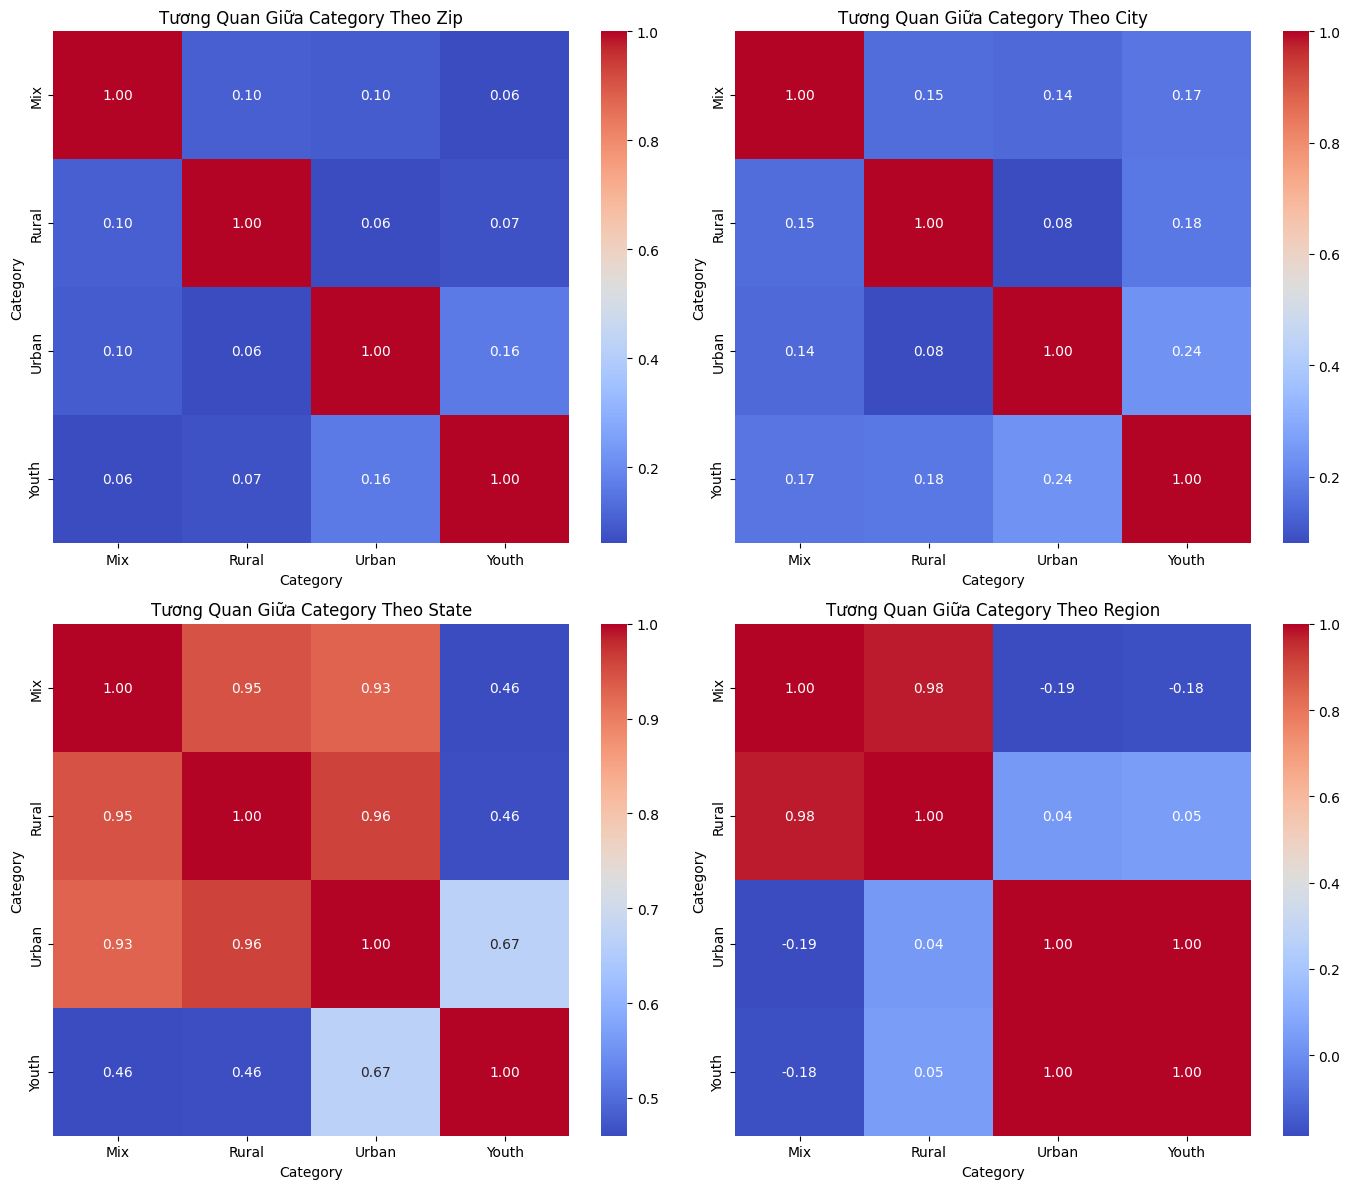

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame chứa hệ số tương quan theo Zip, City, State, Region
correlation_zip = avg_repurchase_time_zip.corr()
correlation_city = avg_repurchase_time_city.corr()
correlation_state = avg_repurchase_time_state.corr()
correlation_region = avg_repurchase_time_region.corr()

# Vẽ heatmap với 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(correlation_zip, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title("Tương Quan Giữa Category Theo Zip")

sns.heatmap(correlation_city, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title("Tương Quan Giữa Category Theo City")

sns.heatmap(correlation_state, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title("Tương Quan Giữa Category Theo State")

sns.heatmap(correlation_region, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title("Tương Quan Giữa Category Theo Region")

plt.tight_layout()
plt.show()


## 4. Phân tích rủi ro

Độ lệch chuẩn của Biên lợi nhuận theo Category:
Category
Urban    0.173159
Rural    0.171602
Mix      0.169340
Youth    0.161742
Name: Profit Margin, dtype: float64

Độ lệch chuẩn của Tổng lợi nhuận theo Category:
Category
Urban    1700.444212
Mix      1019.930166
Rural     655.893309
Youth     539.262602
Name: Total Profit, dtype: float64


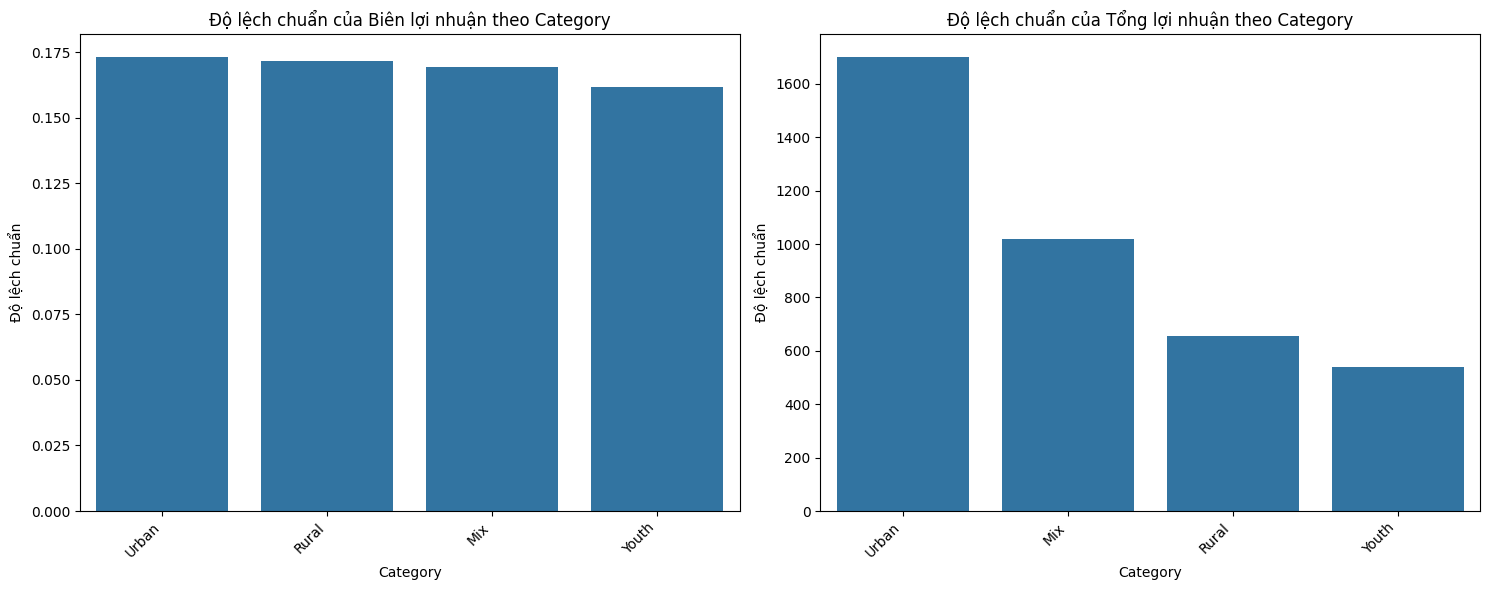

In [ ]:
category_profit_std = df.groupby("Category")["Profit Margin"].std().sort_values(ascending=False)

category_total_profit_std = df.groupby("Category")["Total Profit"].std().sort_values(ascending=False)

print("Độ lệch chuẩn của Biên lợi nhuận theo Category:")
print(category_profit_std)

print("\nĐộ lệch chuẩn của Tổng lợi nhuận theo Category:")
print(category_total_profit_std)


fig_std, axes_std = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=category_profit_std.index, y=category_profit_std.values, ax=axes_std[0])
axes_std[0].set_title("Độ lệch chuẩn của Biên lợi nhuận theo Category")
axes_std[0].set_xlabel("Category")
axes_std[0].set_ylabel("Độ lệch chuẩn")
axes_std[0].set_xticklabels(axes_std[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=category_total_profit_std.index, y=category_total_profit_std.values, ax=axes_std[1])
axes_std[1].set_title("Độ lệch chuẩn của Tổng lợi nhuận theo Category")
axes_std[1].set_xlabel("Category")
axes_std[1].set_ylabel("Độ lệch chuẩn")
axes_std[1].set_xticklabels(axes_std[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


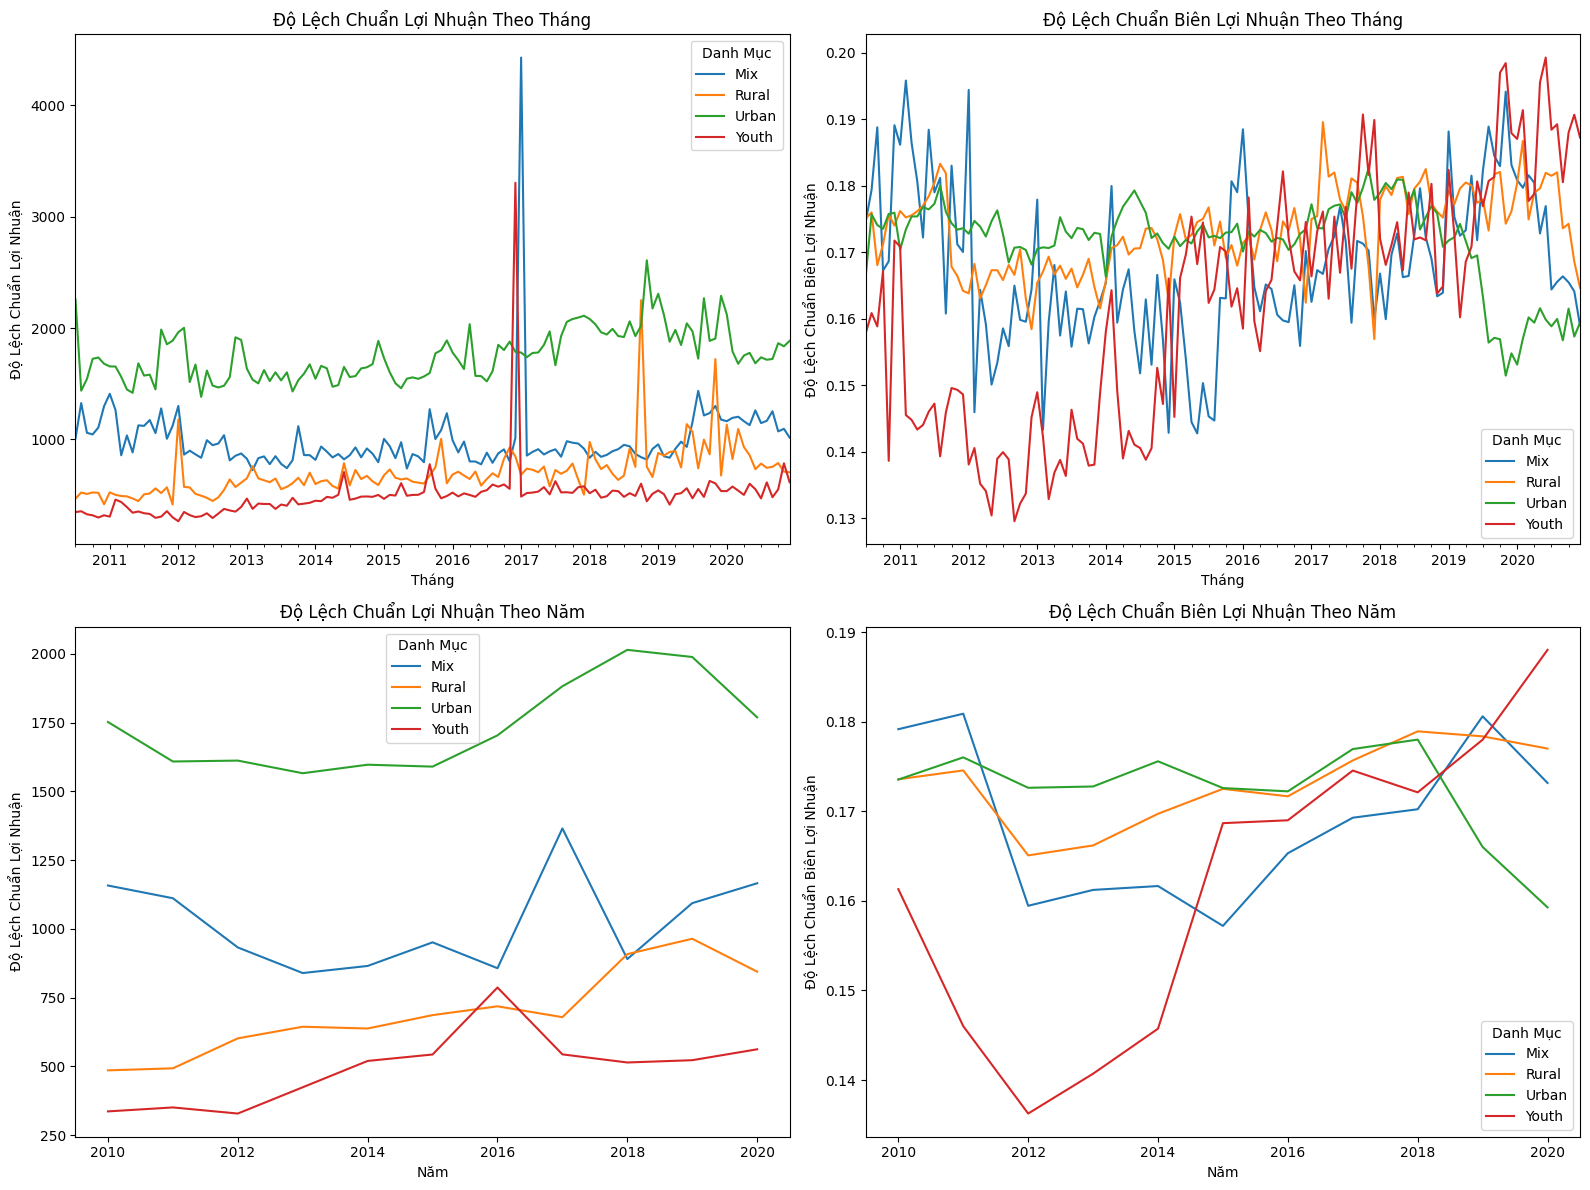

In [ ]:
profit_std_by_month = df.groupby(['Month', 'Category'])['Profit'].std().unstack()
profit_margin_std_by_month = df.groupby(['Month', 'Category'])['Profit Margin'].std().unstack()

profit_std_by_year = df.groupby(['Year', 'Category'])['Profit'].std().unstack()
profit_margin_std_by_year = df.groupby(['Year', 'Category'])['Profit Margin'].std().unstack()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

profit_std_by_month.plot(kind='line', ax=axes[0, 0])
axes[0, 0].set_title('Độ Lệch Chuẩn Lợi Nhuận Theo Tháng')
axes[0, 0].set_xlabel('Tháng')
axes[0, 0].set_ylabel('Độ Lệch Chuẩn Lợi Nhuận')
axes[0, 0].legend(title='Danh Mục')

# Vẽ biểu đồ độ lệch chuẩn của biên lợi nhuận theo tháng
profit_margin_std_by_month.plot(kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Độ Lệch Chuẩn Biên Lợi Nhuận Theo Tháng')
axes[0, 1].set_xlabel('Tháng')
axes[0, 1].set_ylabel('Độ Lệch Chuẩn Biên Lợi Nhuận')
axes[0, 1].legend(title='Danh Mục')

# Vẽ biểu đồ độ lệch chuẩn của lợi nhuận theo năm
profit_std_by_year.plot(kind='line', ax=axes[1, 0])
axes[1, 0].set_title('Độ Lệch Chuẩn Lợi Nhuận Theo Năm')
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Độ Lệch Chuẩn Lợi Nhuận')
axes[1, 0].legend(title='Danh Mục')

# Vẽ biểu đồ độ lệch chuẩn của biên lợi nhuận theo năm
profit_margin_std_by_year.plot(kind='line', ax=axes[1, 1])
axes[1, 1].set_title('Độ Lệch Chuẩn Biên Lợi Nhuận Theo Năm')
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Độ Lệch Chuẩn Biên Lợi Nhuận')
axes[1, 1].legend(title='Danh Mục')

# Điều chỉnh layout và hiển thị
plt.tight_layout()
plt.show()


Skewness (Lợi Nhuận) theo Category:
Category
Mix       4.940457
Rural     8.932713
Urban     4.012639
Youth    14.489573
Name: Profit, dtype: float64

Kurtosis (Lợi Nhuận) theo Category:
Category
Mix      161.698868
Rural    446.336633
Urban    111.775650
Youth    971.128440
Name: Profit, dtype: float64

Skewness (Biên Lợi Nhuận) theo Category:
Category
Mix      0.538701
Rural   -0.079658
Urban    0.186176
Youth   -0.392049
Name: Profit Margin, dtype: float64

Kurtosis (Biên Lợi Nhuận) theo Category:
Category
Mix     -1.051922
Rural   -1.146857
Urban   -1.213759
Youth   -0.838958
Name: Profit Margin, dtype: float64


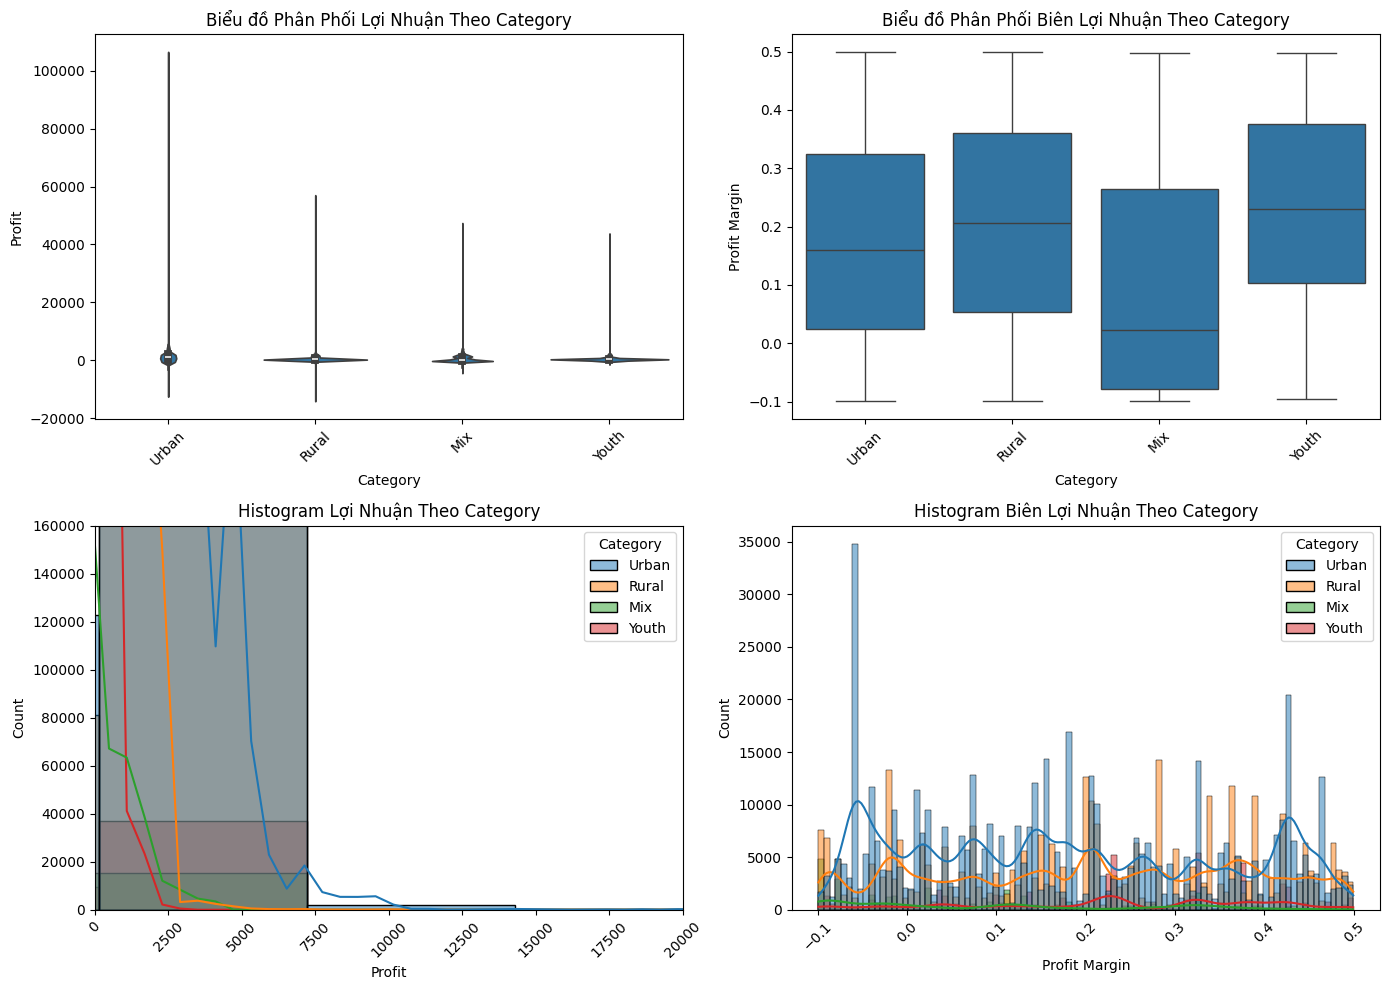

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Tính skewness và kurtosis theo category cho lợi nhuận và biên lợi nhuận
skewness_by_category = df.groupby('Category')['Profit'].apply(lambda x: skew(x))
kurtosis_by_category = df.groupby('Category')['Profit'].apply(lambda x: kurtosis(x))

# Tính skewness và kurtosis cho biên lợi nhuận
skewness_margin_by_category = df.groupby('Category')['Profit Margin'].apply(lambda x: skew(x))
kurtosis_margin_by_category = df.groupby('Category')['Profit Margin'].apply(lambda x: kurtosis(x))

# In kết quả skewness và kurtosis
print("Skewness (Lợi Nhuận) theo Category:")
print(skewness_by_category)
print("\nKurtosis (Lợi Nhuận) theo Category:")
print(kurtosis_by_category)

print("\nSkewness (Biên Lợi Nhuận) theo Category:")
print(skewness_margin_by_category)
print("\nKurtosis (Biên Lợi Nhuận) theo Category:")
print(kurtosis_margin_by_category)

# Vẽ biểu đồ phân phối cho lợi nhuận và biên lợi nhuận theo category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Biểu đồ phân phối cho Lợi Nhuận theo Category (thay violin plot)
sns.violinplot(x='Category', y='Profit', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Biểu đồ Phân Phối Lợi Nhuận Theo Category')

# Biểu đồ phân phối cho Biên Lợi Nhuận theo Category
sns.boxplot(x='Category', y='Profit Margin', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Biểu đồ Phân Phối Biên Lợi Nhuận Theo Category')

# Biểu đồ phân phối lợi nhuận (Histogram) theo Category (giảm độ cao còn 13000 và trục hoành max là 7000)
sns.histplot(df, x='Profit', hue='Category', kde=True, ax=axes[1, 0], binwidth=7000)
axes[1, 0].set_title('Histogram Lợi Nhuận Theo Category')
axes[1, 0].set_ylim(0, 160000)  # Điều chỉnh chiều cao tối đa
axes[1, 0].set_xlim(0, 20000)  # Điều chỉnh trục hoành tối đa

# Biểu đồ phân phối biên lợi nhuận (Histogram) theo Category
sns.histplot(df, x='Profit Margin', hue='Category', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram Biên Lợi Nhuận Theo Category')

# Chỉnh sửa chữ trục X nghiêng 45 độ
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


## 5. Kiểm tra tương quan giữa các thành phần của Category 

### Phân Tích Tương Quan Giữa Các Category Theo Doanh Thu và Doanh Số

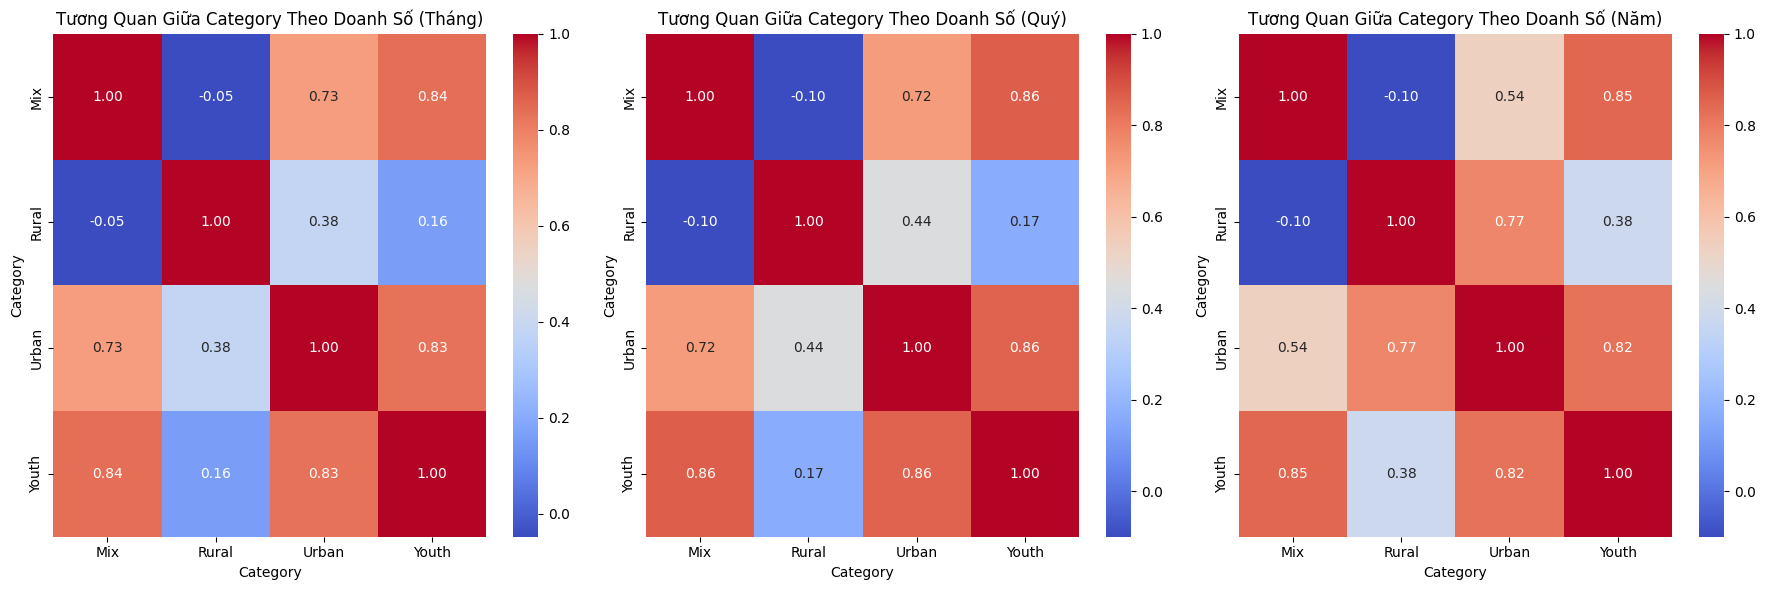

In [ ]:
# Chuyển cột Date về tháng, quý, năm
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Nhóm dữ liệu theo Month, Quarter, Year và Category, tính tổng Units
monthly_units = df.groupby(['Month', 'Category'])['Units'].sum().unstack()
quarterly_units = df.groupby(['Quarter', 'Category'])['Units'].sum().unstack()
yearly_units = df.groupby(['Year', 'Category'])['Units'].sum().unstack()

# Tính ma trận tương quan giữa các Category theo Units
corr_month = monthly_units.corr()
corr_quarter = quarterly_units.corr()
corr_year = yearly_units.corr()

# Vẽ heatmap với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(corr_month, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Tương Quan Giữa Category Theo Doanh Số (Tháng)")

sns.heatmap(corr_quarter, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Tương Quan Giữa Category Theo Doanh Số (Quý)")

sns.heatmap(corr_year, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2])
axes[2].set_title("Tương Quan Giữa Category Theo Doanh Số (Năm)")

plt.tight_layout()
plt.show()


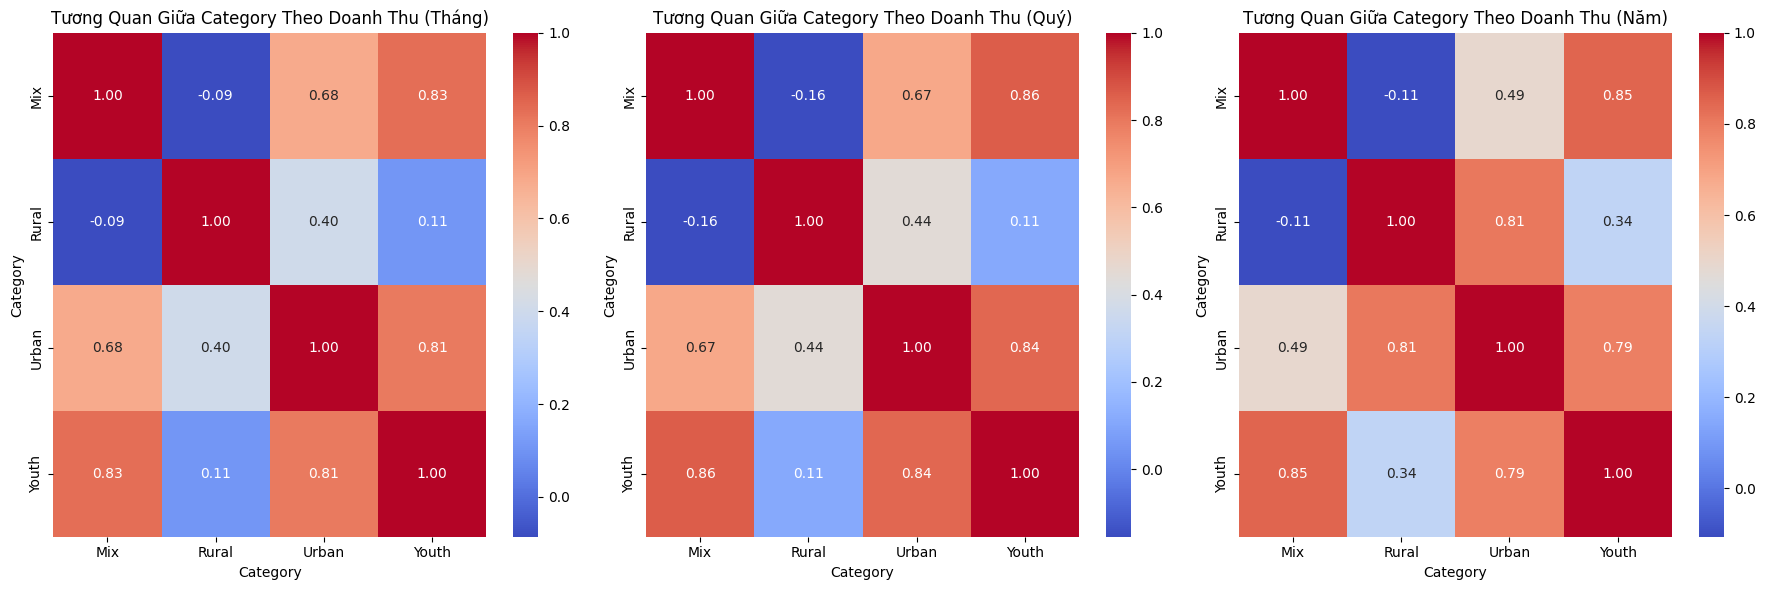

In [ ]:
# Chuyển cột Date về tháng, quý, năm
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Nhóm dữ liệu theo Month, Quarter, Year và Category, tính tổng Revenue
monthly_revenue = df.groupby(['Month', 'Category'])['Revenue'].sum().unstack()
quarterly_revenue = df.groupby(['Quarter', 'Category'])['Revenue'].sum().unstack()
yearly_revenue = df.groupby(['Year', 'Category'])['Revenue'].sum().unstack()

# Tính ma trận tương quan giữa các Category theo Month, Quarter, Year
corr_month = monthly_revenue.corr()
corr_quarter = quarterly_revenue.corr()
corr_year = yearly_revenue.corr()

# Vẽ heatmap với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(corr_month, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Tương Quan Giữa Category Theo Doanh Thu (Tháng)")

sns.heatmap(corr_quarter, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Tương Quan Giữa Category Theo Doanh Thu (Quý)")

sns.heatmap(corr_year, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2])
axes[2].set_title("Tương Quan Giữa Category Theo Doanh Thu (Năm)")

plt.tight_layout()
plt.show()




#### 1. Tương Quan Giữa Các Category Theo Doanh Thu
##### Nhận Xét Chính:
- **Mix và Youth có mối tương quan cao nhất**: Ở cả ba khung thời gian (tháng, quý, năm), hai danh mục này có giá trị tương quan rất cao (~0.85 - 0.86). Điều này cho thấy hai danh mục này có xu hướng biến động doanh thu cùng chiều với nhau.
- **Rural có mức tương quan thấp hơn với các danh mục khác**: Đặc biệt là với Mix, Urban, và Youth, Rural có hệ số tương quan thấp hơn nhiều (dao động từ -0.16 đến 0.44). Điều này cho thấy doanh thu của Rural có thể ít bị ảnh hưởng bởi các danh mục khác.
- **Urban có mức tương quan cao với Youth và Mix**: Đặc biệt trong khung thời gian tháng và quý, Urban có giá trị tương quan ~0.8 với Youth và Mix, cho thấy doanh thu của chúng thường biến động cùng nhau.

#### 2. Tương Quan Giữa Các Category Theo Doanh Số
##### Nhận Xét Chính:
- **Mix và Youth tiếp tục có mối tương quan cao nhất**: Giá trị tương quan giữa hai danh mục này vẫn duy trì ở mức cao (~0.85 - 0.86), chứng tỏ rằng nếu một danh mục tăng doanh số, danh mục kia cũng có xu hướng tăng.
- **Rural vẫn có mức tương quan thấp nhất**: So với các danh mục khác, Rural có hệ số tương quan thấp hơn hẳn, đặc biệt là với Mix (-0.10) và Youth (~0.38). Điều này có thể gợi ý rằng doanh số của Rural không chịu ảnh hưởng lớn từ các danh mục còn lại.
- **Urban có mối quan hệ chặt chẽ với Mix và Youth**: Trong khung thời gian tháng, quý, và năm, Urban duy trì mức tương quan khá cao với các danh mục này (~0.7 - 0.86), cho thấy có sự liên kết mạnh về doanh số.

#### 3. Nhận Xét Chung
- **Mix và Youth là hai danh mục có sự liên kết chặt chẽ nhất**: Cả doanh thu và doanh số của hai danh mục này thường biến động cùng chiều.
- **Rural có sự khác biệt rõ rệt**: Cả doanh thu và doanh số của danh mục này có mức tương quan thấp hơn với các danh mục còn lại, cho thấy nó có thể hoạt động độc lập hơn.
- **Urban có vai trò kết nối giữa Mix và Youth**: Vì có mức tương quan cao với cả hai danh mục này, Urban có thể đóng vai trò là một danh mục cầu nối giữa các nhóm khách hàng.

##### Kết Luận:
Dựa trên phân tích này, nếu bạn đang lập kế hoạch kinh doanh, có thể cân nhắc:
1. **Tập trung vào danh mục Mix và Youth**, vì hai danh mục này có tác động mạnh lẫn nhau, giúp tối ưu doanh thu và doanh số.
2. **Tách biệt chiến lược cho Rural**, vì danh mục này có mức tương quan thấp hơn, có thể cần một chiến lược tiếp thị khác.
3. **Sử dụng Urban làm danh mục trung gian**, có thể kết nối với cả Mix và Youth để tạo ra sự tăng trưởng ổn định hơn.



## 6. Kiểm tra yếu tố mùa vụ


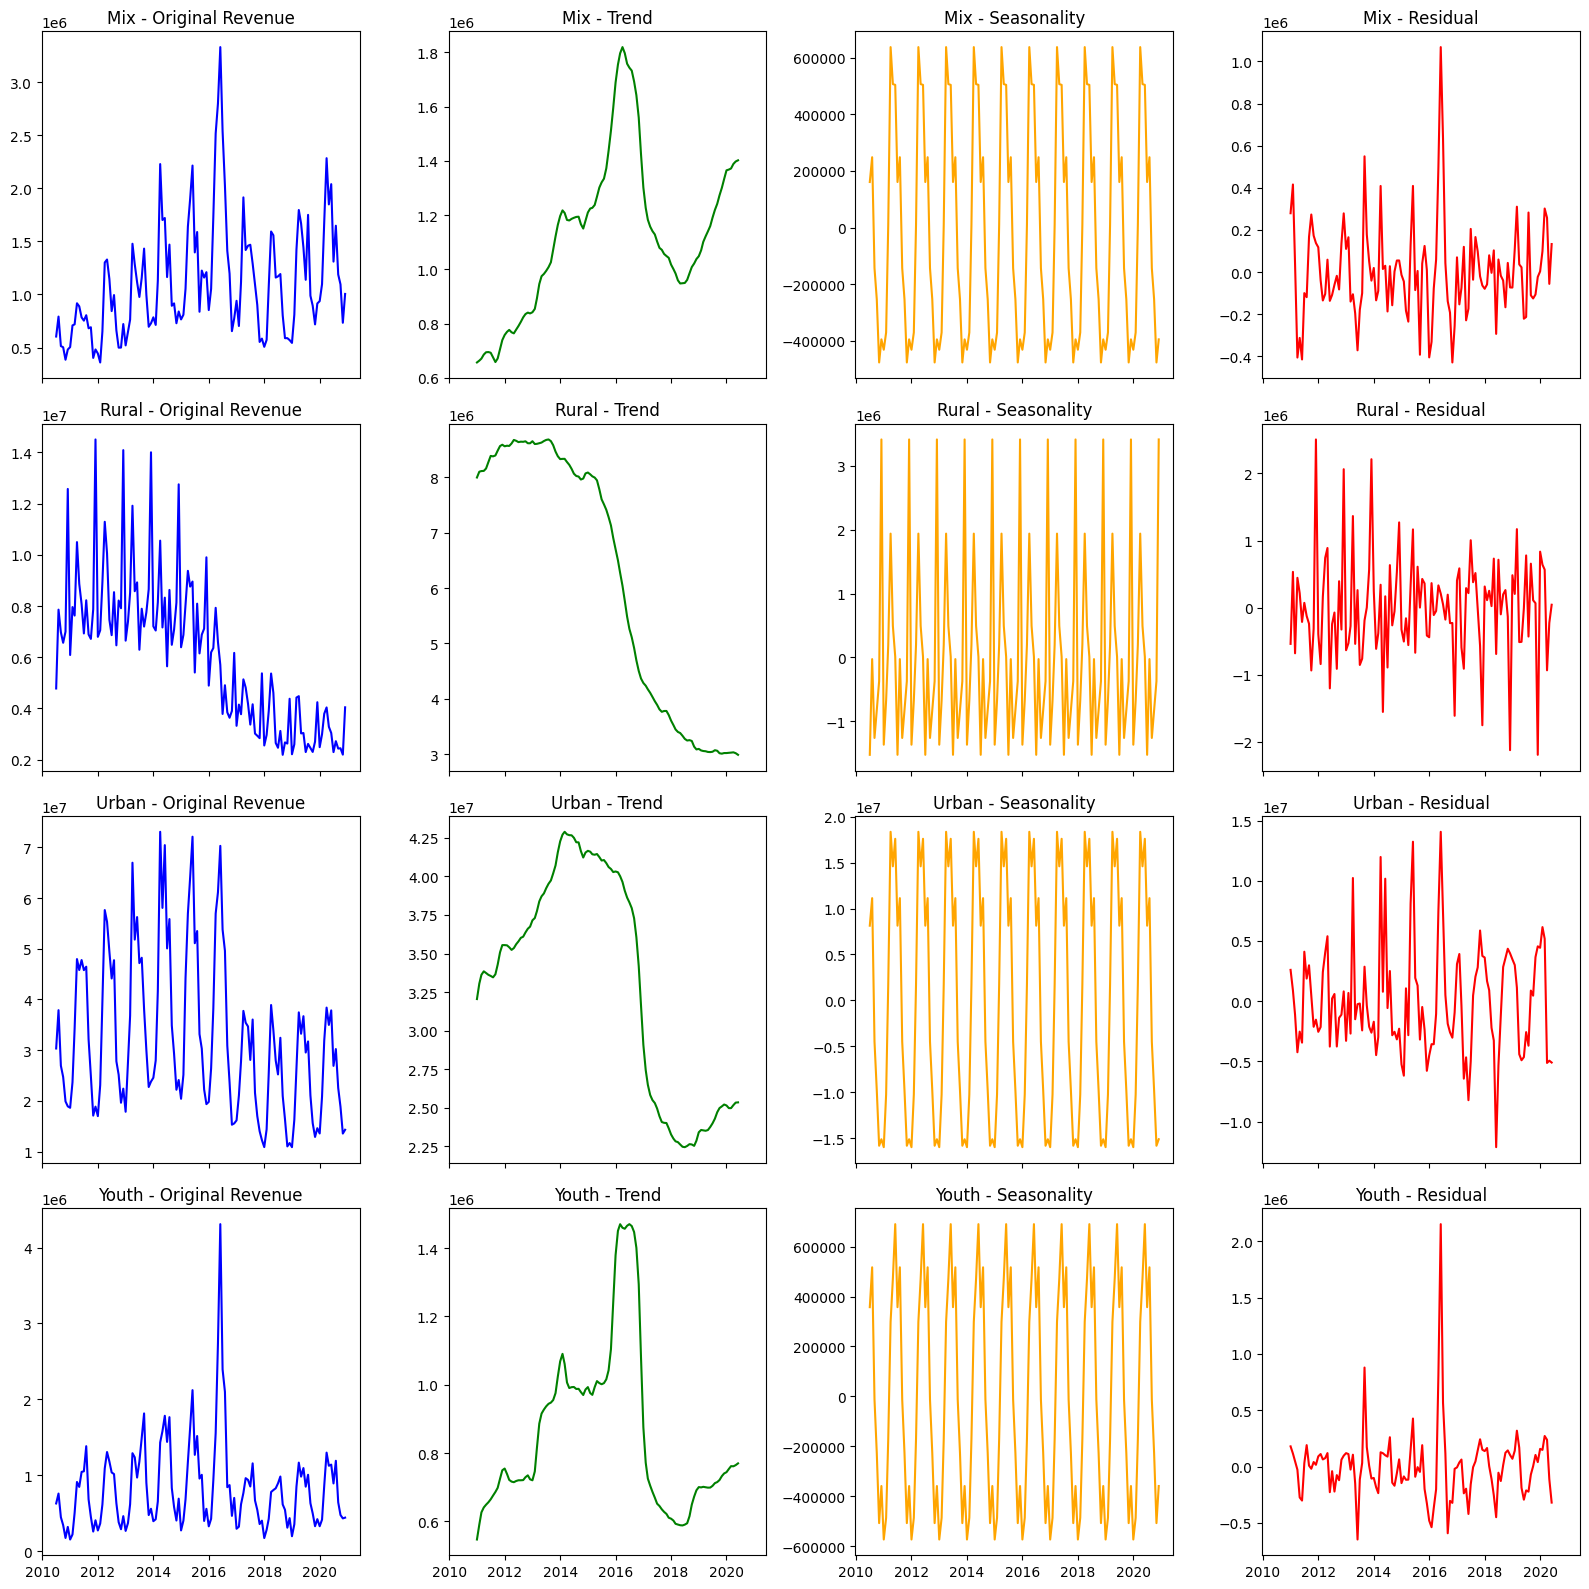

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Chuyển cột Date về dạng tháng (YYYY-MM)
df['Month'] = df['Date'].dt.to_period('M')

# Nhóm dữ liệu theo tháng và Category
monthly_revenue_category = df.groupby(['Month', 'Category'])['Revenue'].sum().unstack()

# Chuyển chỉ mục thành datetime
monthly_revenue_category.index = monthly_revenue_category.index.to_timestamp()

# Xác định số lượng Category để tạo subplot
num_categories = len(monthly_revenue_category.columns)
fig, axes = plt.subplots(num_categories, 4, figsize=(16, 4 * num_categories), sharex=True)

# Duyệt qua từng Category và thực hiện Seasonal Decomposition
for i, category in enumerate(monthly_revenue_category.columns):
    revenue_series = monthly_revenue_category[category].dropna()  # Loại bỏ NaN
    
    # Kiểm tra nếu đủ dữ liệu để phân tích
    if len(revenue_series) >= 24:  # Cần ít nhất 2 năm dữ liệu cho period=12
        decomposition = seasonal_decompose(revenue_series, model='additive', period=12)

        # Vẽ biểu đồ từng phần
        axes[i, 0].plot(decomposition.observed, label='Original', color='blue')
        axes[i, 0].set_title(f'{category} - Original Revenue')

        axes[i, 1].plot(decomposition.trend, label='Trend', color='green')
        axes[i, 1].set_title(f'{category} - Trend')

        axes[i, 2].plot(decomposition.seasonal, label='Seasonality', color='orange')
        axes[i, 2].set_title(f'{category} - Seasonality')

        axes[i, 3].plot(decomposition.resid, label='Residual', color='red')
        axes[i, 3].set_title(f'{category} - Residual')

    else:
        for j in range(4):
            axes[i, j].text(0.5, 0.5, f'Không đủ dữ liệu cho {category}', 
                            horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

# Điều chỉnh layout
plt.tight_layout()
plt.show()


### Phân Tích Yếu Tố Mùa Vụ

#### 1. Mix

- **Xu hướng**: Tăng mạnh đến 2016-2017, sau đó giảm nhẹ và hồi phục sau 2018.
- **Mùa vụ**: Dao động theo chu kỳ rõ ràng, biên độ lớn.
- **Phần dư**: Biến động cao, có một số điểm bất thường.

#### 2. Rural

- **Xu hướng**: Giảm dần từ 2015, cho thấy sự suy giảm dài hạn.
- **Mùa vụ**: Rõ ràng nhưng không quá mạnh, có tính lặp lại theo chu kỳ.
- **Phần dư**: Biến động lớn, có nhiều điểm lệch so với xu hướng.

#### 3. Urban

- **Xu hướng**: Tăng đến 2016-2017, sau đó giảm mạnh và phục hồi nhẹ.
- **Mùa vụ**: Tính chu kỳ mạnh, dao động đều.
- **Phần dư**: Biến động lớn, có những đợt tăng giảm đột ngột.

#### 4. Youth

- **Xu hướng**: Tăng mạnh đến 2016, sau đó giảm nhanh rồi ổn định.
- **Mùa vụ**: Chu kỳ rõ ràng, dao động mạnh.
- **Phần dư**: Có một số điểm đột biến lớn, đặc biệt giai đoạn 2016.

🔹 **Tổng kết**: Các danh mục đều có tính mùa vụ rõ ràng, nhưng xu hướng dài hạn khác nhau. **Urban và Mix có biến động mạnh nhất**, trong khi **Rural suy giảm dài hạn**. **Youth có nhiều biến động đột ngột, có thể do sự kiện đặc biệt.**



## 7. Hiệu suất của từng Category

In [20]:
import pandas as pd

# Thêm cột Month, Quarter, Year để phân tích theo thời gian
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Tạo dictionary lưu kết quả
results = {}

# Duyệt qua từng Category
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]

    # Cửa hàng có doanh thu cao nhất
    best_store_revenue = category_data.groupby('City')['Revenue'].sum().idxmax()
    
    # Cửa hàng có lợi nhuận cao nhất
    best_store_profit = category_data.groupby('City')['Profit'].sum().idxmax()

    # Vùng có doanh thu cao nhất
    best_region_revenue = category_data.groupby('Region')['Revenue'].sum().idxmax()
    
    # Vùng có lợi nhuận cao nhất
    best_region_profit = category_data.groupby('Region')['Profit'].sum().idxmax()

    # Tháng bán chạy nhất
    best_month = category_data.groupby('Month')['Units'].sum().idxmax()

    # Quý bán chạy nhất
    best_quarter = category_data.groupby('Quarter')['Units'].sum().idxmax()

    # Năm bán chạy nhất
    best_year = category_data.groupby('Year')['Units'].sum().idxmax()

    # Lưu kết quả vào dictionary
    results[category] = {
        "Cửa hàng doanh thu cao nhất": best_store_revenue,
        "Cửa hàng lợi nhuận cao nhất": best_store_profit,
        "Vùng doanh thu cao nhất": best_region_revenue,
        "Vùng lợi nhuận cao nhất": best_region_profit,
        "Tháng bán chạy nhất": best_month,
        "Quý bán chạy nhất": str(best_quarter),
        "Năm bán chạy nhất": best_year
    }

# Chuyển kết quả thành DataFrame để hiển thị
df_results = pd.DataFrame(results).T
print(df_results)


      Cửa hàng doanh thu cao nhất Cửa hàng lợi nhuận cao nhất  \
Urban                 Houston, TX                 Houston, TX   
Rural                   Miami, FL                   Miami, FL   
Mix                     Miami, FL                   Miami, FL   
Youth                New York, NY                New York, NY   

      Vùng doanh thu cao nhất Vùng lợi nhuận cao nhất Tháng bán chạy nhất  \
Urban                    East                    East                   4   
Rural                    West                    West                  12   
Mix                      West                    West                   4   
Youth                    East                    East                   6   

      Quý bán chạy nhất Năm bán chạy nhất  
Urban            2014Q2              2014  
Rural            2011Q4              2011  
Mix              2016Q2              2016  
Youth            2016Q2              2016  


## 8. Kiểm định 

### a. Kiểm định xem mùa (season) và kỳ nghỉ lễ ở Mỹ có ảnh hưởng đến doanh thu (Revenue) và doanh số (Units) của từng Category

In [21]:
df['Month'] = df['Date'].dt.month  # Lấy tháng từ Date

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

import pandas as pd
import holidays

# Tạo danh sách ngày lễ của Mỹ
us_holidays = holidays.US(years=df['Date'].dt.year.unique())

# Thêm cột Holiday: 1 nếu là ngày lễ, 0 nếu không
df['Holiday'] = df['Date'].isin(us_holidays).astype(int)

# Kiểm tra dữ liệu
print(df[['Date', 'Holiday']].head())



        Date  Holiday
0 2013-07-31        0
1 2014-03-12        0
2 2013-11-29        0
3 2018-08-29        0
4 2013-04-27        0


In [22]:
import scipy.stats as stats
import pandas as pd

# Tạo DataFrame lưu kết quả kiểm định
results = []

for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    
    # Kiểm định ANOVA cho Season (Doanh thu & Doanh số)
    anova_season_revenue = stats.f_oneway(
        *[category_data.loc[category_data['Season'] == season, 'Revenue'] for season in category_data['Season'].unique()]
    )
    anova_season_units = stats.f_oneway(
        *[category_data.loc[category_data['Season'] == season, 'Units'] for season in category_data['Season'].unique()]
    )
    
    # Kiểm định T-test cho Holiday (Doanh thu & Doanh số)
    if category_data['Holiday'].nunique() > 1:  # Kiểm tra xem có đủ nhóm để kiểm định không
        revenue_holiday = category_data.loc[category_data['Holiday'] == 1, 'Revenue']
        revenue_non_holiday = category_data.loc[category_data['Holiday'] == 0, 'Revenue']
        units_holiday = category_data.loc[category_data['Holiday'] == 1, 'Units']
        units_non_holiday = category_data.loc[category_data['Holiday'] == 0, 'Units']
        
        t_test_holiday_revenue = stats.ttest_ind(revenue_holiday, revenue_non_holiday, equal_var=False, nan_policy='omit')
        t_test_holiday_units = stats.ttest_ind(units_holiday, units_non_holiday, equal_var=False, nan_policy='omit')
    else:
        t_test_holiday_revenue = None
        t_test_holiday_units = None

    # Lưu kết quả vào danh sách
    results.append({
        "Category": category,
        "ANOVA Season Revenue": anova_season_revenue.pvalue if anova_season_revenue else None,
        "ANOVA Season Units": anova_season_units.pvalue if anova_season_units else None,
        "T-Test Holiday Revenue": t_test_holiday_revenue.pvalue if t_test_holiday_revenue else None,
        "T-Test Holiday Units": t_test_holiday_units.pvalue if t_test_holiday_units else None,
    })

# Chuyển danh sách kết quả thành DataFrame
df_results = pd.DataFrame(results)

# Hiển thị kết quả
print(df_results)

# 🎯 In diễn giải kết quả có điều kiện if-else
for _, row in df_results.iterrows():
    print(f"\n📌 **Category: {row['Category']}**")

    if row["ANOVA Season Revenue"] < 0.05:
        print("✅ Mùa có ảnh hưởng đến doanh thu.")
    else:
        print("❌ Không có bằng chứng cho thấy mùa ảnh hưởng đến doanh thu.")

    if row["ANOVA Season Units"] < 0.05:
        print("✅ Mùa có ảnh hưởng đến doanh số.")
    else:
        print("❌ Không có bằng chứng cho thấy mùa ảnh hưởng đến doanh số.")

    if row["T-Test Holiday Revenue"] is not None and row["T-Test Holiday Revenue"] < 0.05:
        print("✅ Ngày lễ có ảnh hưởng đến doanh thu.")
    else:
        print("❌ Không có bằng chứng cho thấy ngày lễ ảnh hưởng đến doanh thu.")

    if row["T-Test Holiday Units"] is not None and row["T-Test Holiday Units"] < 0.05:
        print("✅ Ngày lễ có ảnh hưởng đến doanh số.")
    else:
        print("❌ Không có bằng chứng cho thấy ngày lễ ảnh hưởng đến doanh số.")


  Category  ANOVA Season Revenue  ANOVA Season Units  T-Test Holiday Revenue  \
0    Urban          0.000000e+00        1.845255e-07            1.575201e-10   
1    Rural         2.269961e-285        1.950203e-13            3.242728e-03   
2      Mix          4.777606e-20        3.645270e-01            3.232562e-04   
3    Youth          2.302994e-02        6.000899e-03            6.852804e-01   

   T-Test Holiday Units  
0              0.084112  
1              0.000013  
2              0.184547  
3              0.912661  

📌 **Category: Urban**
✅ Mùa có ảnh hưởng đến doanh thu.
✅ Mùa có ảnh hưởng đến doanh số.
✅ Ngày lễ có ảnh hưởng đến doanh thu.
❌ Không có bằng chứng cho thấy ngày lễ ảnh hưởng đến doanh số.

📌 **Category: Rural**
✅ Mùa có ảnh hưởng đến doanh thu.
✅ Mùa có ảnh hưởng đến doanh số.
✅ Ngày lễ có ảnh hưởng đến doanh thu.
✅ Ngày lễ có ảnh hưởng đến doanh số.

📌 **Category: Mix**
✅ Mùa có ảnh hưởng đến doanh thu.
❌ Không có bằng chứng cho thấy mùa ảnh hưởng đến doanh số.

# II. Phân tích theo Segment


## 1. Kiểm tra dữ liệu cơ bản

In [ ]:
print(df.info())

print(df["Segment"].isnull().sum())

print(df["Segment"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ProductID      901561 non-null  int64         
 1   Date           901561 non-null  datetime64[ns]
 2   Zip            901561 non-null  int64         
 3   Units          901561 non-null  int64         
 4   Revenue        901561 non-null  float64       
 5   COGS           901561 non-null  float64       
 6   City           901561 non-null  object        
 7   State          901561 non-null  object        
 8   Region         901561 non-null  object        
 9   District       901561 non-null  object        
 10  Category       901561 non-null  object        
 11  Segment        901561 non-null  object        
 12  Product        901561 non-null  object        
 13  Total Profit   901561 non-null  float64       
 14  Profit Margin  901561 non-null  float64       
 15  

## 2. Phân bố dữ liệu


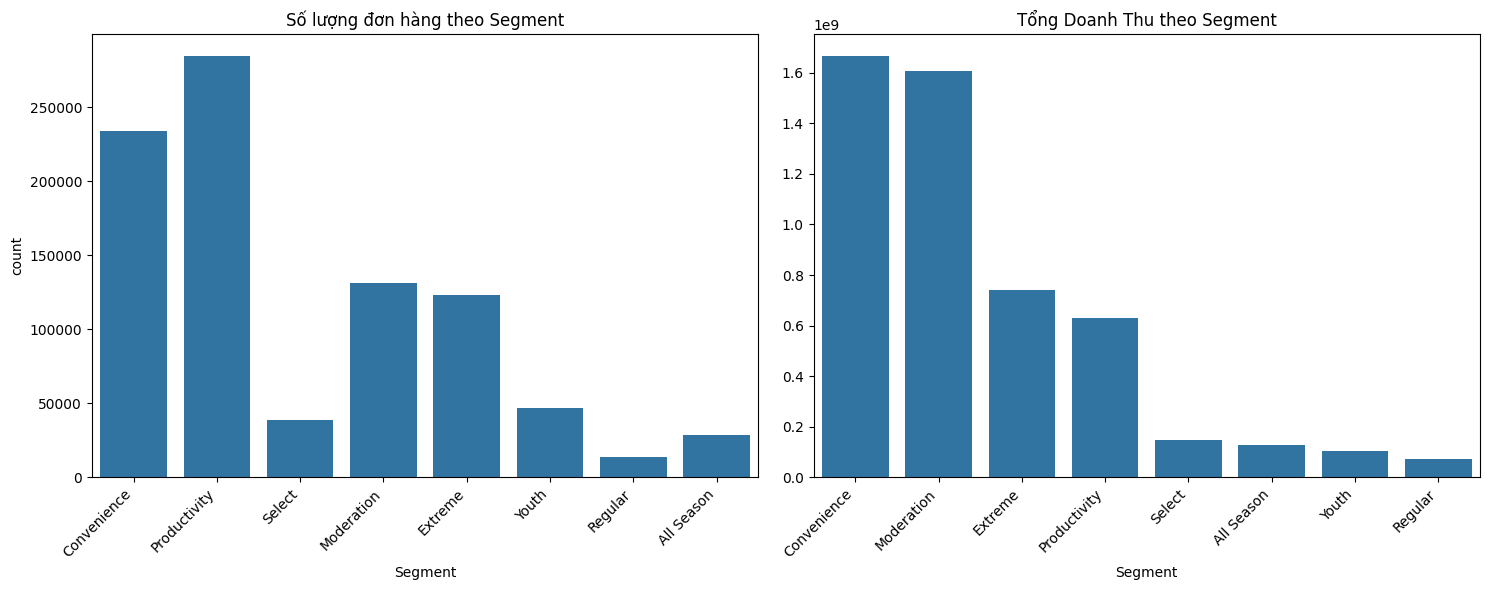

In [ ]:
fig_segment, axes_segment = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x="Segment", data=df, ax=axes_segment[0])
axes_segment[0].set_title("Số lượng đơn hàng theo Segment")
axes_segment[0].set_xticklabels(axes_segment[0].get_xticklabels(), rotation=45, ha='right')

segment_revenue = df.groupby("Segment")["Revenue"].sum().sort_values(ascending=False)
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, ax=axes_segment[1])
axes_segment[1].set_title("Tổng Doanh Thu theo Segment")
axes_segment[1].set_xticklabels(axes_segment[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

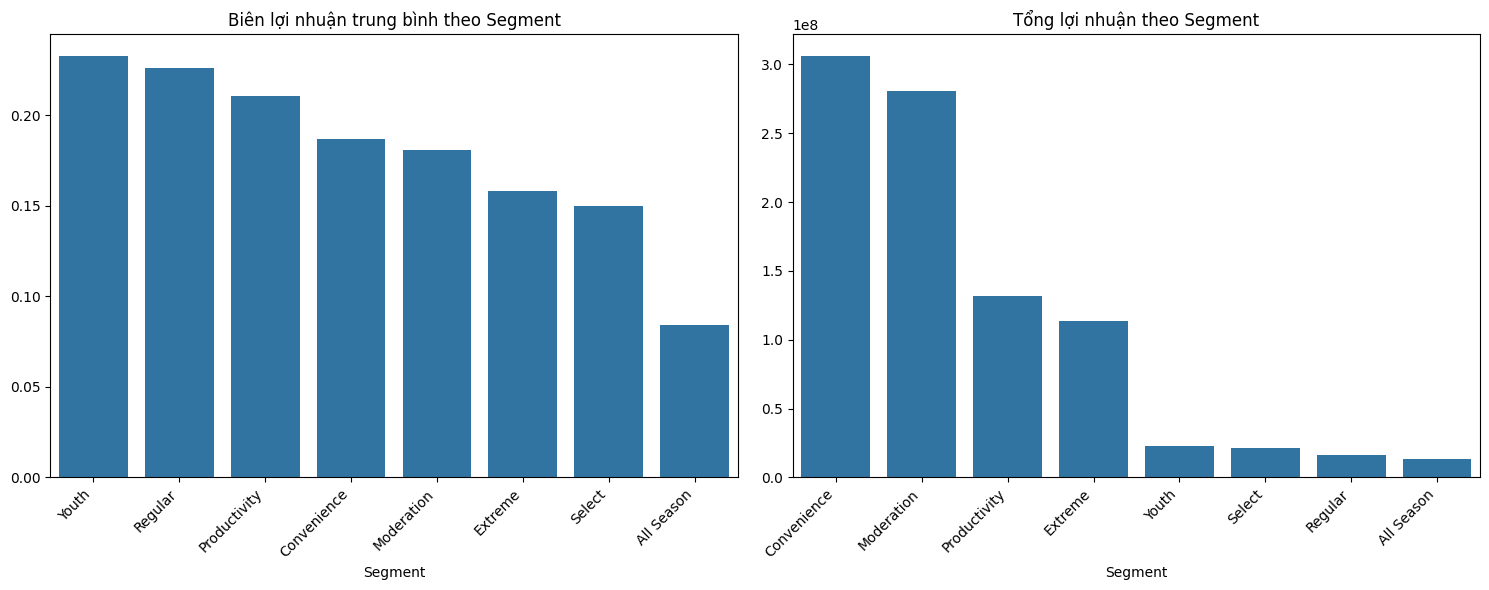

In [25]:
# Tạo figure cho Segment
fig_segment, axes_segment = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ Biên lợi nhuận trung bình theo Segment
sns.barplot(x=segment_profit.index, y=segment_profit.values, ax=axes_segment[0])
axes_segment[0].set_title("Biên lợi nhuận trung bình theo Segment")
axes_segment[0].set_xticklabels(axes_segment[0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Tổng lợi nhuận theo Segment
sns.barplot(x=segment_total_profit.index, y=segment_total_profit.values, ax=axes_segment[1])
axes_segment[1].set_title("Tổng lợi nhuận theo Segment")
axes_segment[1].set_xticklabels(axes_segment[1].get_xticklabels(), rotation=45, ha='right')

# Hiển thị figure Segment
plt.tight_layout()
plt.show()

`Segment:`
- Convenience có doanh thu cao nhất, cho thấy nhu cầu mạnh mẽ đối với các sản phẩm tiện lợi, dễ sử dụng và phù hợp với lối sống bận rộn. Đây là phân khúc chiến lược quan trọng.
- Moderation và Extreme có doanh thu ổn định, phục vụ nhu cầu tiêu dùng trung bình và cao hơn. Các sản phẩm trong các phân khúc này có thể tập trung vào chất lượng và tính năng đặc biệt, thu hút khách hàng tìm kiếm sự khác biệt.
- Youth và Regular có doanh thu thấp nhất, có thể do chưa khai thác được hết tiềm năng của nhóm khách hàng này. Cần cải thiện chiến lược tiếp thị và sáng tạo sản phẩm để thu hút sự chú ý từ đối tượng trẻ tuổi và những khách hàng tìm kiếm sự ổn định.  

## 3. Xu hướng theo thời gian

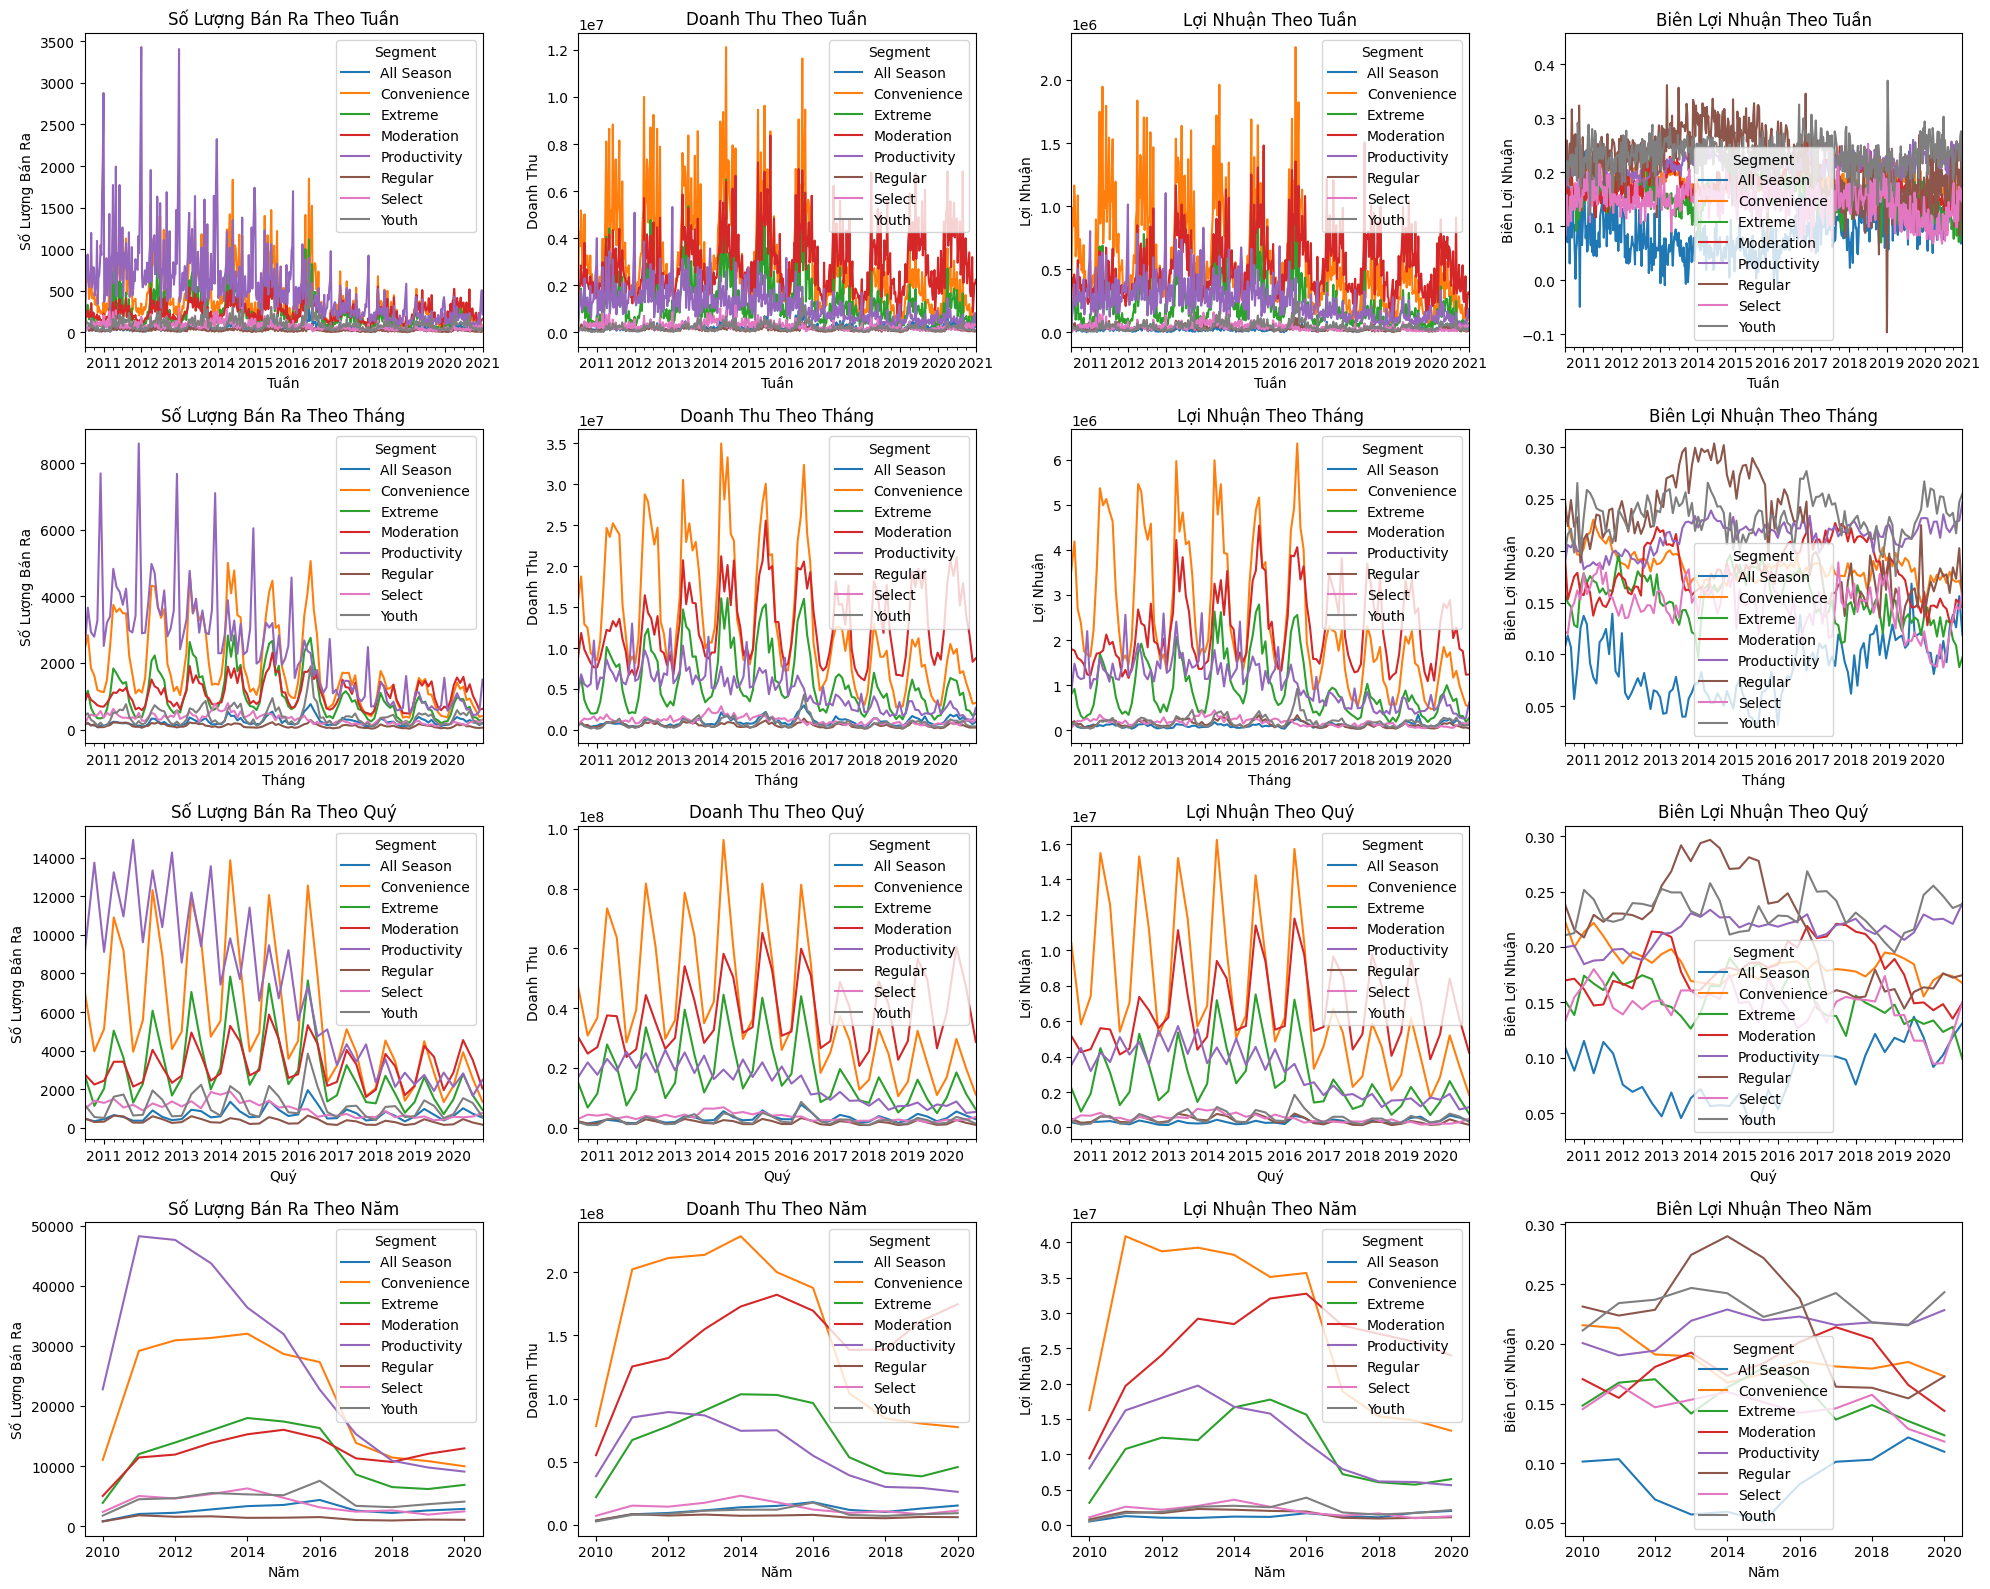

In [26]:
# Tạo các cột thời gian
df['Profit'] = df['Revenue'] - df['COGS']
df['Profit Margin'] = df['Profit'] / df['Revenue']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.to_period('W')
df['Quarter'] = df['Date'].dt.to_period('Q')

# Nhóm dữ liệu theo thời gian và segment
units_by_year_segment = df.groupby(['Year', 'Segment'])['Units'].sum().unstack()
revenue_by_year_segment = df.groupby(['Year', 'Segment'])['Revenue'].sum().unstack()
profit_by_year_segment = df.groupby(['Year', 'Segment'])['Profit'].sum().unstack()
profit_margin_by_year_segment = df.groupby(['Year', 'Segment'])['Profit Margin'].mean().unstack()

units_by_month_segment = df.groupby(['Month', 'Segment'])['Units'].sum().unstack()
revenue_by_month_segment = df.groupby(['Month', 'Segment'])['Revenue'].sum().unstack()
profit_by_month_segment = df.groupby(['Month', 'Segment'])['Profit'].sum().unstack()
profit_margin_by_month_segment = df.groupby(['Month', 'Segment'])['Profit Margin'].mean().unstack()

units_by_week_segment = df.groupby(['Week', 'Segment'])['Units'].sum().unstack()
revenue_by_week_segment = df.groupby(['Week', 'Segment'])['Revenue'].sum().unstack()
profit_by_week_segment = df.groupby(['Week', 'Segment'])['Profit'].sum().unstack()
profit_margin_by_week_segment = df.groupby(['Week', 'Segment'])['Profit Margin'].mean().unstack()

units_by_quarter_segment = df.groupby(['Quarter', 'Segment'])['Units'].sum().unstack()
revenue_by_quarter_segment = df.groupby(['Quarter', 'Segment'])['Revenue'].sum().unstack()
profit_by_quarter_segment = df.groupby(['Quarter', 'Segment'])['Profit'].sum().unstack()
profit_margin_by_quarter_segment = df.groupby(['Quarter', 'Segment'])['Profit Margin'].mean().unstack()

# Tạo figure chung
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

def plot_time_series(axes, data, title, xlabel, ylabel, row, col):
    data.plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel(xlabel)
    axes[row, col].set_ylabel(ylabel)
    axes[row, col].legend(title='Segment')

# Biểu đồ theo tuần
plot_time_series(axes, units_by_week_segment, 'Số Lượng Bán Ra Theo Tuần', 'Tuần', 'Số Lượng Bán Ra', 0, 0)
plot_time_series(axes, revenue_by_week_segment, 'Doanh Thu Theo Tuần', 'Tuần', 'Doanh Thu', 0, 1)
plot_time_series(axes, profit_by_week_segment, 'Lợi Nhuận Theo Tuần', 'Tuần', 'Lợi Nhuận', 0, 2)
plot_time_series(axes, profit_margin_by_week_segment, 'Biên Lợi Nhuận Theo Tuần', 'Tuần', 'Biên Lợi Nhuận', 0, 3)

# Biểu đồ theo tháng
plot_time_series(axes, units_by_month_segment, 'Số Lượng Bán Ra Theo Tháng', 'Tháng', 'Số Lượng Bán Ra', 1, 0)
plot_time_series(axes, revenue_by_month_segment, 'Doanh Thu Theo Tháng', 'Tháng', 'Doanh Thu', 1, 1)
plot_time_series(axes, profit_by_month_segment, 'Lợi Nhuận Theo Tháng', 'Tháng', 'Lợi Nhuận', 1, 2)
plot_time_series(axes, profit_margin_by_month_segment, 'Biên Lợi Nhuận Theo Tháng', 'Tháng', 'Biên Lợi Nhuận', 1, 3)

# Biểu đồ theo quý
plot_time_series(axes, units_by_quarter_segment, 'Số Lượng Bán Ra Theo Quý', 'Quý', 'Số Lượng Bán Ra', 2, 0)
plot_time_series(axes, revenue_by_quarter_segment, 'Doanh Thu Theo Quý', 'Quý', 'Doanh Thu', 2, 1)
plot_time_series(axes, profit_by_quarter_segment, 'Lợi Nhuận Theo Quý', 'Quý', 'Lợi Nhuận', 2, 2)
plot_time_series(axes, profit_margin_by_quarter_segment, 'Biên Lợi Nhuận Theo Quý', 'Quý', 'Biên Lợi Nhuận', 2, 3)

# Biểu đồ theo năm
plot_time_series(axes, units_by_year_segment, 'Số Lượng Bán Ra Theo Năm', 'Năm', 'Số Lượng Bán Ra', 3, 0)
plot_time_series(axes, revenue_by_year_segment, 'Doanh Thu Theo Năm', 'Năm', 'Doanh Thu', 3, 1)
plot_time_series(axes, profit_by_year_segment, 'Lợi Nhuận Theo Năm', 'Năm', 'Lợi Nhuận', 3, 2)
plot_time_series(axes, profit_margin_by_year_segment, 'Biên Lợi Nhuận Theo Năm', 'Năm', 'Biên Lợi Nhuận', 3, 3)

plt.tight_layout()
plt.show()


### **Nhận xét chung về tình hình và chiến lược đầu tư**  

#### **1. Tình hình thị trường có dấu hiệu suy giảm sau 2016**  
- Tổng thể, nhiều phân khúc có xu hướng giảm về **số lượng bán ra, doanh thu và lợi nhuận**, đặc biệt là các phân khúc từng có doanh thu cao như **Convenience và Productivity**.  
- Điều này có thể do **thay đổi xu hướng tiêu dùng, cạnh tranh gia tăng hoặc chi phí vận hành tăng lên**.  

#### **2. Một số phân khúc vẫn giữ vững lợi nhuận**  
- **Extreme, Moderation và Select** có mức **ổn định tốt hơn**, không bị suy giảm mạnh. Điều này cho thấy các phân khúc này có **độ bền vững cao hơn**, thích hợp để đầu tư lâu dài.  
- **Youth** tuy có doanh thu thấp nhưng có **biên lợi nhuận cao**, cho thấy tiềm năng phát triển nếu có chiến lược marketing tốt.  

#### **3. Cần tập trung tối ưu hóa chi phí cho Convenience và Productivity**  
- Hai phân khúc này có doanh thu lớn nhưng lại có dấu hiệu giảm lợi nhuận, cho thấy **chi phí hoạt động có thể đang gia tăng**.  
- Cần có chiến lược **tinh gọn sản phẩm, giảm chi phí vận hành và tìm kiếm mô hình kinh doanh hiệu quả hơn**.  

#### **4. Một số phân khúc không nên đầu tư mạnh**  
- **All Season và Regular** có biên lợi nhuận thấp, doanh thu không cao và có xu hướng giảm. Do đó, **cần hạn chế đầu tư vào hai phân khúc này** hoặc chỉ duy trì mức đầu tư tối thiểu.  

---  

### **Đề xuất chiến lược chung**  
✔ **Tăng cường đầu tư vào Extreme, Moderation và Select** do biên lợi nhuận tốt và ổn định.  
✔ **Giữ Convenience và Productivity, nhưng tập trung vào tối ưu hóa chi phí** để tránh suy giảm lợi nhuận.  
✔ **Mở rộng phân khúc Youth với chiến lược marketing mạnh hơn** để tận dụng biên lợi nhuận cao.  
✔ **Cắt giảm hoặc không mở rộng All Season và Regular**, tránh đầu tư vào những phân khúc có lợi nhuận thấp.  

---  

### **Chiến lược đầu tư theo phân khúc**

| Segment       | Mức ưu tiên đầu tư  | Chiến lược |
|--------------|------------------|------------|
| **Convenience**  | ⭐⭐⭐ (Khá tốt)   | Tiếp tục đầu tư nhưng cần tối ưu chi phí để duy trì lợi nhuận. Nên đẩy mạnh marketing và cải thiện chất lượng sản phẩm. |
| **Productivity** | ⭐⭐⭐ (Khá tốt)   | Giữ mức đầu tư trung bình, tập trung cải thiện biên lợi nhuận bằng cách cắt giảm chi phí vận hành. |
| **Extreme**      | ⭐⭐⭐⭐ (Tốt nhất)  | Đầu tư mạnh do doanh thu và lợi nhuận duy trì ổn định, ít bị ảnh hưởng bởi xu hướng giảm chung. |
| **Moderation**   | ⭐⭐⭐⭐ (Tốt nhất)  | Đầu tư dài hạn vì có biên lợi nhuận tốt và ổn định. |
| **Select**       | ⭐⭐⭐⭐ (Tốt nhất)  | Phân khúc có biên lợi nhuận cao, phù hợp để đầu tư vào sản phẩm cao cấp hoặc chiến lược giá trị gia tăng. |
| **Youth**        | ⭐⭐⭐ (Khá tốt)   | Tập trung vào đổi mới sản phẩm và marketing số để tận dụng lợi thế biên lợi nhuận cao. |
| **Regular**      | ⭐⭐ (Trung bình)  | Chỉ nên đầu tư cầm chừng, do doanh thu và lợi nhuận không cao. |
| **All Season**   | ⭐ (Thấp)         | Tránh đầu tư mạnh do lợi nhuận thấp và biên lợi nhuận không tốt. |



### Tần suất mua hàng 

#### a. Theo Zip 

In [ ]:

df_sorted = df.sort_values(by=['Zip', 'Segment', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['Zip', 'Segment'])['Date'].diff().dt.days

avg_repurchase_time_zip = df_sorted.groupby(['Zip', 'Segment'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_zip)


Segment  All Season  Convenience  Extreme   Moderation  Productivity  Regular  \
Zip                                                                             
1001            NaN   150.058824   373.50   363.714286    120.555556      NaN   
1002            NaN  2168.000000   429.60          NaN    542.800000      NaN   
1004            NaN          NaN      NaN          NaN           NaN      NaN   
1005            NaN   244.538462      NaN  2027.000000    223.538462      NaN   
1007          656.5   185.187500   249.25   213.875000    183.000000      NaN   
...             ...          ...      ...          ...           ...      ...   
99925           NaN          NaN      NaN          NaN     59.333333      NaN   
99926           NaN          NaN      NaN          NaN    497.333333      NaN   
99928           NaN          NaN      NaN          NaN           NaN      NaN   
99929         397.0          NaN      NaN          NaN           NaN      NaN   
99950           NaN         

#### b. Theo city 

In [ ]:

df_sorted = df.sort_values(by=['City', 'Segment', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['City', 'Segment'])['Date'].diff().dt.days

avg_repurchase_time_city = df_sorted.groupby(['City', 'Segment'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_city)


Segment         All Season  Convenience     Extreme   Moderation  \
City                                                               
Aaronsburg, PA         NaN          NaN         NaN          NaN   
Abbeville, AL          NaN          NaN  746.000000  1518.000000   
Abbeville, GA          NaN          NaN         NaN          NaN   
Abbeville, LA          NaN   140.000000  164.285714   273.857143   
Abbeville, MS          NaN   520.666667         NaN          NaN   
...                    ...          ...         ...          ...   
Zumbrota, MN           NaN   505.000000         NaN          NaN   
Zuni, NM               NaN   790.000000         NaN   915.000000   
Zuni, VA               NaN   945.500000         NaN          NaN   
Zwingle, IA            NaN          NaN         NaN  1057.000000   
Zwolle, LA             NaN   535.333333         NaN          NaN   

Segment         Productivity  Regular  Select   Youth  
City                                                   
Aar

#### c. Theo State 

In [ ]:

# Sắp xếp theo State, Segment, Date
df_sorted = df.sort_values(by=['State', 'Segment', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['State', 'Segment'])['Date'].diff().dt.days

avg_repurchase_time_state = df_sorted.groupby(['State', 'Segment'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_state)


Segment  All Season  Convenience    Extreme  Moderation  Productivity  \
State                                                                   
AK        17.758454     5.463873  11.204819   11.037572      3.087777   
AL        11.792570     0.932294   1.964985    1.691391      0.734228   
AR        12.657807     1.078814   2.955882    3.213087      1.309141   
AZ         5.043593     0.880690   1.548583    1.426816      0.550352   
CA         0.745961     0.207359   0.197505    0.329663      0.065258   
CO         3.328982     0.836976   1.631826    1.425754      0.474650   
CT        11.891720     1.378553   2.330689    2.801024      1.349453   
DC       269.750000    51.013514  44.409639  113.931034     41.901235   
DE        97.333333     4.163557   8.992840    8.543820      6.129241   
FL         2.596062     0.226443   0.336495    0.419991      0.348016   
GA         6.472973     0.604989   1.002354    1.101466      0.471044   
IA        13.478723     1.052747   4.391455    1.54

#### d. Theo Region

In [ ]:

# Sắp xếp theo Region, Segment, Date
df_sorted = df.sort_values(by=['Region', 'Segment', 'Date'])

df_sorted['Time_Diff'] = df_sorted.groupby(['Region', 'Segment'])['Date'].diff().dt.days

avg_repurchase_time_region = df_sorted.groupby(['Region', 'Segment'])['Time_Diff'].mean().unstack()

print(avg_repurchase_time_region)


Segment  All Season  Convenience   Extreme  Moderation  Productivity  \
Region                                                                 
Central    0.561190     0.050622  0.127921    0.086056      0.055695   
East       0.356664     0.032700  0.062039    0.061119      0.033918   
West       0.344821     0.093772  0.120739    0.160114      0.037083   

Segment   Regular    Select     Youth  
Region                                 
Central  1.160157  0.415258  0.259024  
East     0.613022  0.257009  0.179183  
West     0.917844  0.258936  0.365031  


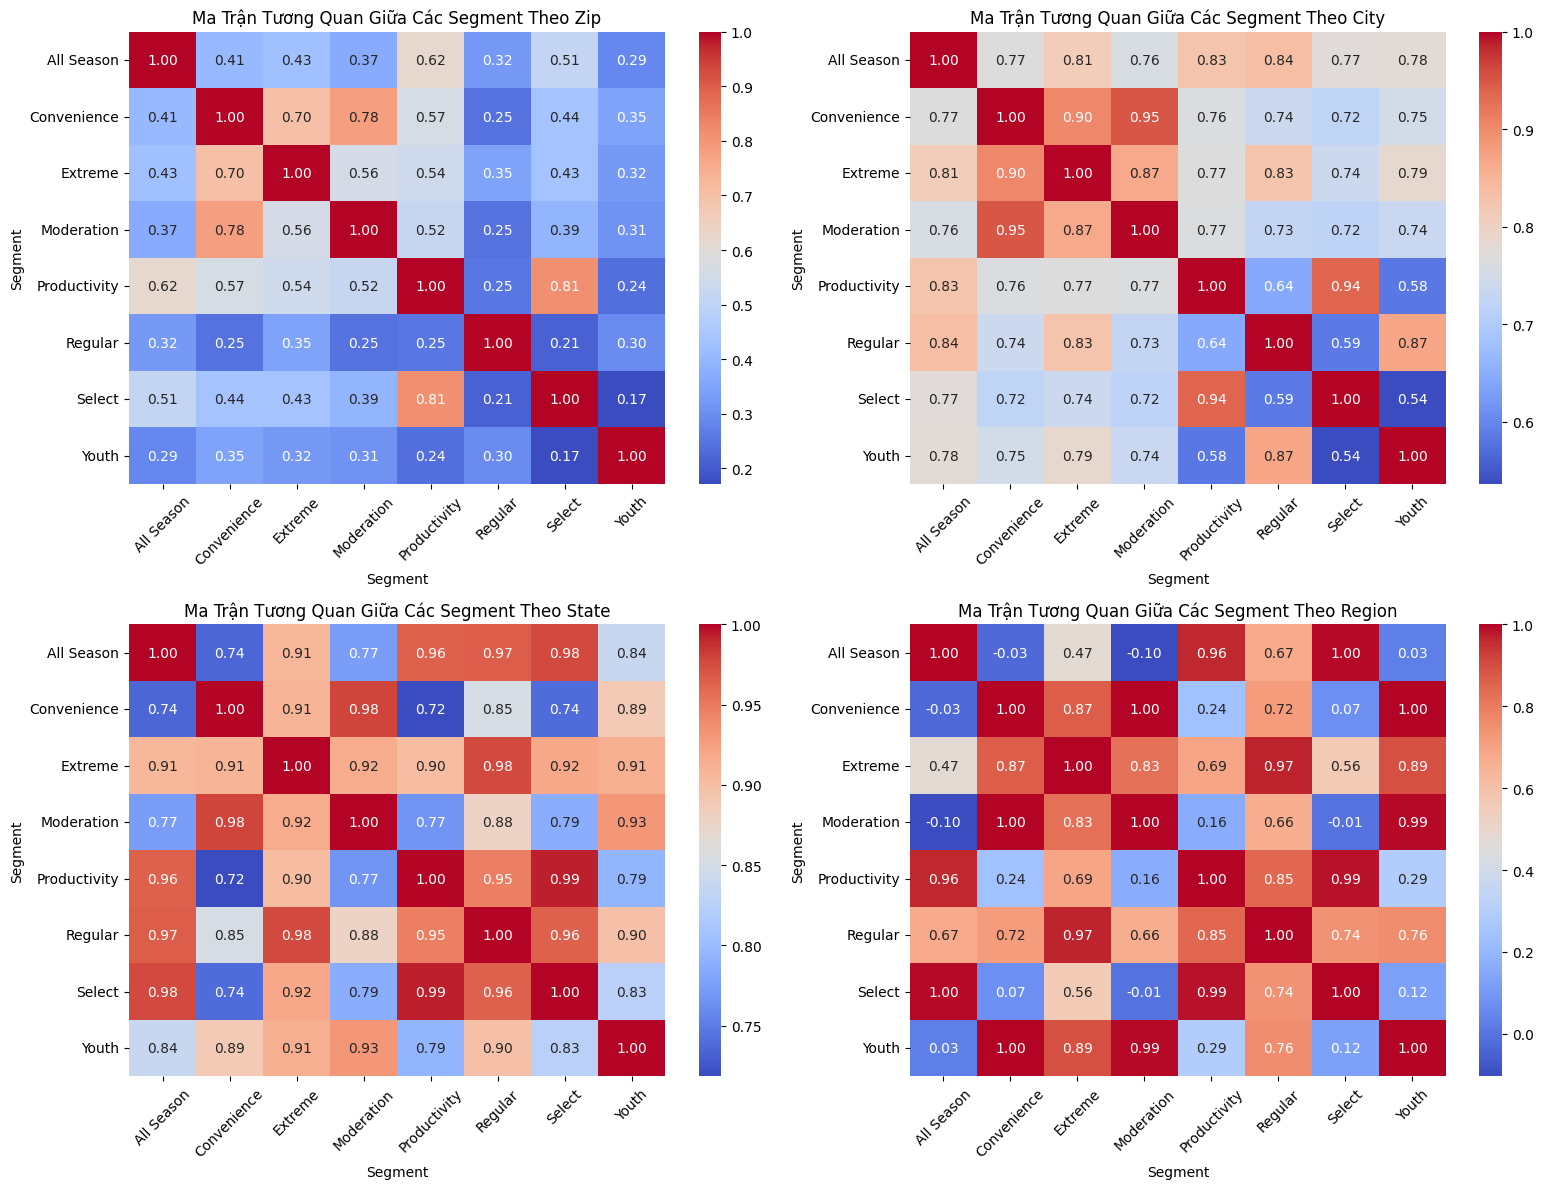

In [ ]:
# Tạo danh sách các chỉ số để tính hệ số tương quan
indices = ["Zip", "City", "State", "Region"]
correlation_matrices = {}

# Tính ma trận tương quan cho từng chỉ số
for idx in indices:
    segment_stats = df.groupby([idx, "Segment"])["Units"].sum().unstack()
    correlation_matrices[idx] = segment_stats.corr()

# Vẽ figure với 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Danh sách vị trí subplot
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Duyệt qua các chỉ số và vẽ heatmap
for (idx, pos) in zip(indices, positions):
    sns.heatmap(correlation_matrices[idx], annot=True, cmap='coolwarm', fmt=".2f", ax=axes[pos])
    axes[pos].set_title(f"Ma Trận Tương Quan Giữa Các Segment Theo {idx}")
    axes[pos].tick_params(axis='x', rotation=45)  # Nghiêng nhãn trục x 45 độ

# Điều chỉnh layout
plt.tight_layout()
plt.show()


## 4. Phân tích rủi ro

Độ lệch chuẩn của Biên lợi nhuận theo Segment:
Segment
Extreme         0.187132
Moderation      0.173694
Productivity    0.171697
Convenience     0.164985
All Season      0.163662
Select          0.162224
Youth           0.161742
Regular         0.151403
Name: Profit Margin, dtype: float64

Độ lệch chuẩn của Tổng lợi nhuận theo Segment:
Segment
Moderation      2360.350170
Convenience     1352.703103
Extreme         1190.631034
Regular         1079.628963
All Season       943.500375
Select           739.204794
Productivity     657.782489
Youth            539.262602
Name: Total Profit, dtype: float64


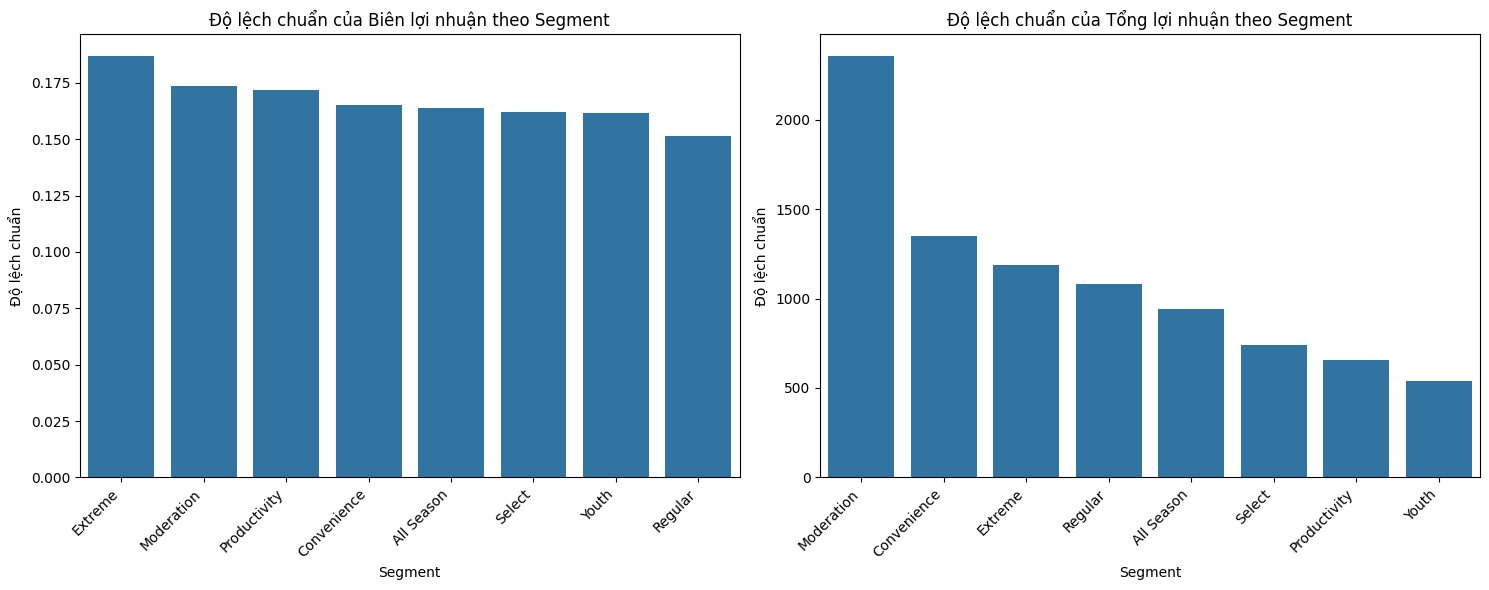

In [32]:
# Tính độ lệch chuẩn của Profit Margin theo Segment
segment_profit_std = df.groupby("Segment")["Profit Margin"].std().sort_values(ascending=False)

# Tính độ lệch chuẩn của Total Profit theo Segment
segment_total_profit_std = df.groupby("Segment")["Total Profit"].std().sort_values(ascending=False)

print("Độ lệch chuẩn của Biên lợi nhuận theo Segment:")
print(segment_profit_std)

print("\nĐộ lệch chuẩn của Tổng lợi nhuận theo Segment:")
print(segment_total_profit_std)


fig_std, axes_std = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ độ lệch chuẩn của Profit Margin theo Segment
sns.barplot(x=segment_profit_std.index, y=segment_profit_std.values, ax=axes_std[0])
axes_std[0].set_title("Độ lệch chuẩn của Biên lợi nhuận theo Segment")
axes_std[0].set_xlabel("Segment")
axes_std[0].set_ylabel("Độ lệch chuẩn")
axes_std[0].set_xticklabels(axes_std[0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ độ lệch chuẩn của Total Profit theo Segment
sns.barplot(x=segment_total_profit_std.index, y=segment_total_profit_std.values, ax=axes_std[1])
axes_std[1].set_title("Độ lệch chuẩn của Tổng lợi nhuận theo Segment")
axes_std[1].set_xlabel("Segment")
axes_std[1].set_ylabel("Độ lệch chuẩn")
axes_std[1].set_xticklabels(axes_std[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


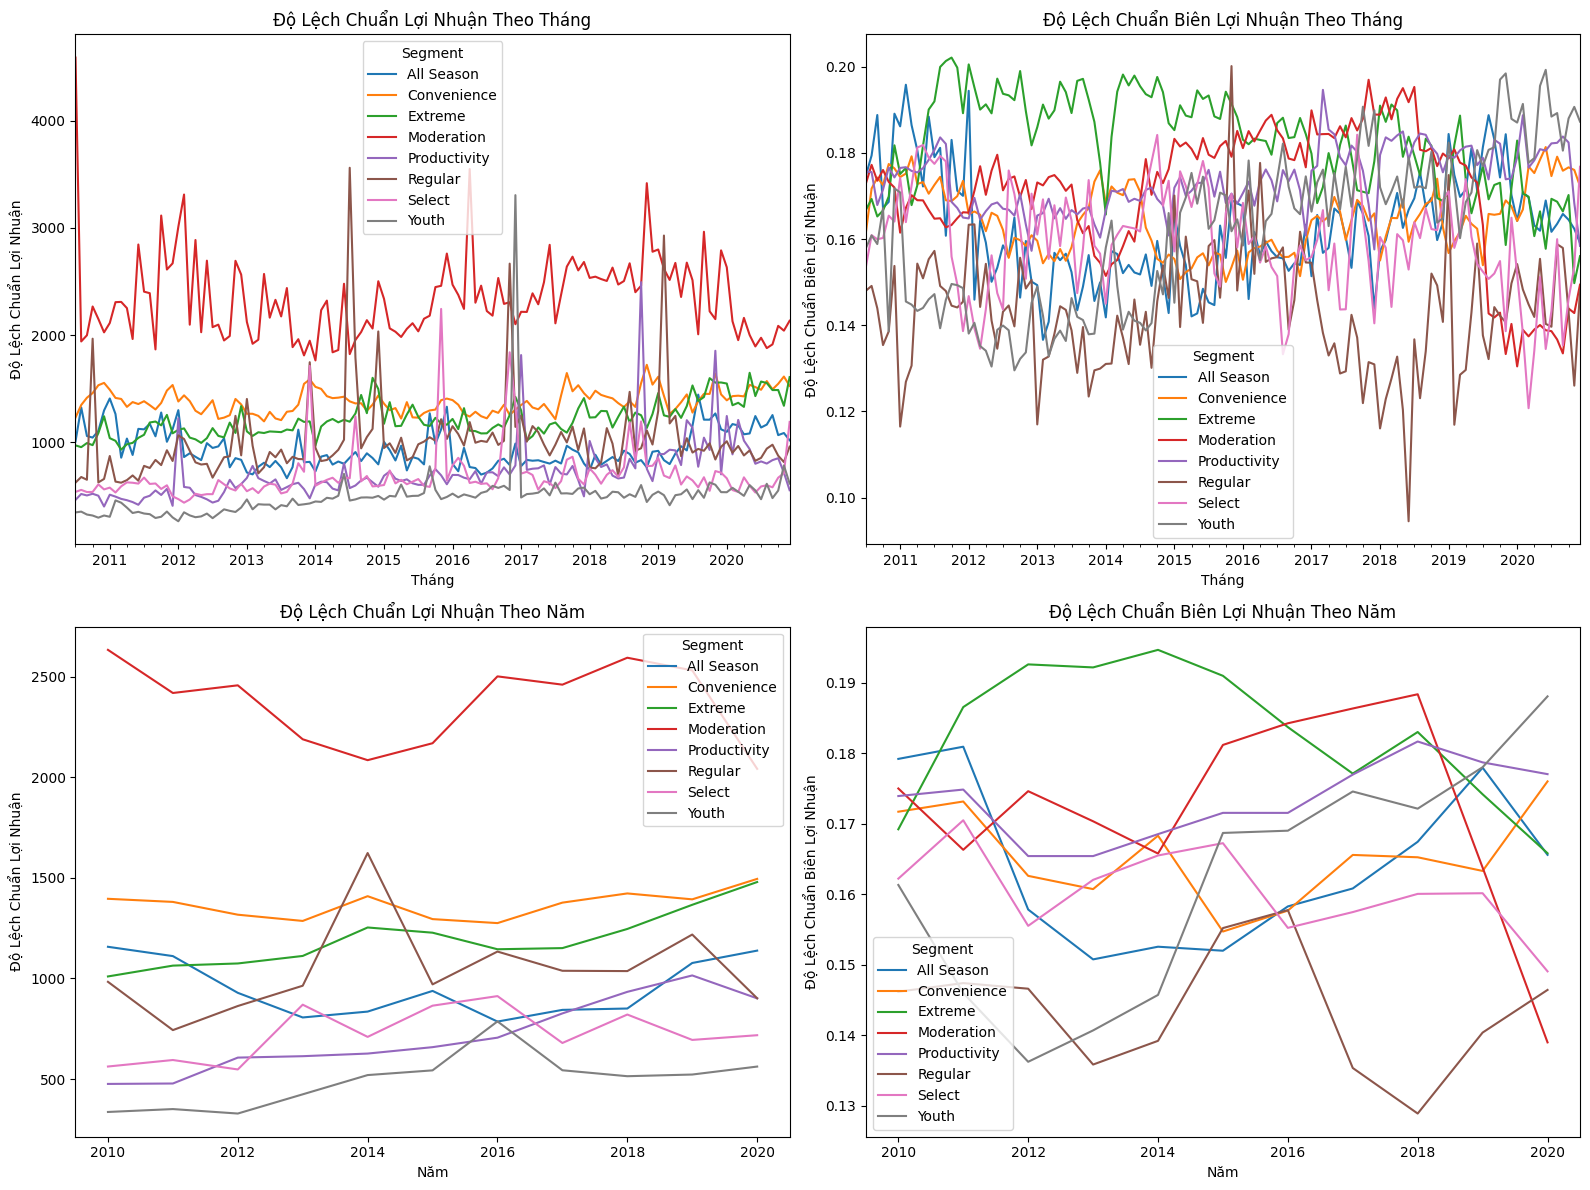

In [33]:
# Tính độ lệch chuẩn của lợi nhuận và biên lợi nhuận theo tháng và năm
profit_std_by_month = df.groupby(['Month', 'Segment'])['Profit'].std().unstack()
profit_margin_std_by_month = df.groupby(['Month', 'Segment'])['Profit Margin'].std().unstack()

profit_std_by_year = df.groupby(['Year', 'Segment'])['Profit'].std().unstack()
profit_margin_std_by_year = df.groupby(['Year', 'Segment'])['Profit Margin'].std().unstack()

import matplotlib.pyplot as plt

# Tạo figure cho độ lệch chuẩn theo tháng và năm
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Vẽ biểu đồ độ lệch chuẩn của lợi nhuận theo tháng
profit_std_by_month.plot(kind='line', ax=axes[0, 0])
axes[0, 0].set_title('Độ Lệch Chuẩn Lợi Nhuận Theo Tháng')
axes[0, 0].set_xlabel('Tháng')
axes[0, 0].set_ylabel('Độ Lệch Chuẩn Lợi Nhuận')
axes[0, 0].legend(title='Segment')

# Vẽ biểu đồ độ lệch chuẩn của biên lợi nhuận theo tháng
profit_margin_std_by_month.plot(kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Độ Lệch Chuẩn Biên Lợi Nhuận Theo Tháng')
axes[0, 1].set_xlabel('Tháng')
axes[0, 1].set_ylabel('Độ Lệch Chuẩn Biên Lợi Nhuận')
axes[0, 1].legend(title='Segment')

# Vẽ biểu đồ độ lệch chuẩn của lợi nhuận theo năm
profit_std_by_year.plot(kind='line', ax=axes[1, 0])
axes[1, 0].set_title('Độ Lệch Chuẩn Lợi Nhuận Theo Năm')
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Độ Lệch Chuẩn Lợi Nhuận')
axes[1, 0].legend(title='Segment')

# Vẽ biểu đồ độ lệch chuẩn của biên lợi nhuận theo năm
profit_margin_std_by_year.plot(kind='line', ax=axes[1, 1])
axes[1, 1].set_title('Độ Lệch Chuẩn Biên Lợi Nhuận Theo Năm')
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Độ Lệch Chuẩn Biên Lợi Nhuận')
axes[1, 1].legend(title='Segment')

# Điều chỉnh layout và hiển thị
plt.tight_layout()
plt.show()


Skewness (Lợi Nhuận) theo Segment:
Segment
All Season       1.543656
Convenience      1.157244
Extreme          1.531110
Moderation       4.425606
Productivity     9.287831
Regular          7.079655
Select          11.638484
Youth           14.489573
Name: Profit, dtype: float64

Kurtosis (Lợi Nhuận) theo Segment:
Segment
All Season        4.590707
Convenience       6.624605
Extreme          10.207900
Moderation      106.032208
Productivity    481.906309
Regular         207.870617
Select          527.448835
Youth           971.128440
Name: Profit, dtype: float64

Skewness (Biên Lợi Nhuận) theo Segment:
Segment
All Season      0.577801
Convenience    -0.025852
Extreme         0.532633
Moderation      0.211301
Productivity   -0.185200
Regular         0.061844
Select          0.717787
Youth          -0.392049
Name: Profit Margin, dtype: float64

Kurtosis (Biên Lợi Nhuận) theo Segment:
Segment
All Season     -1.003787
Convenience    -1.134984
Extreme        -1.134397
Moderation     -1.3041

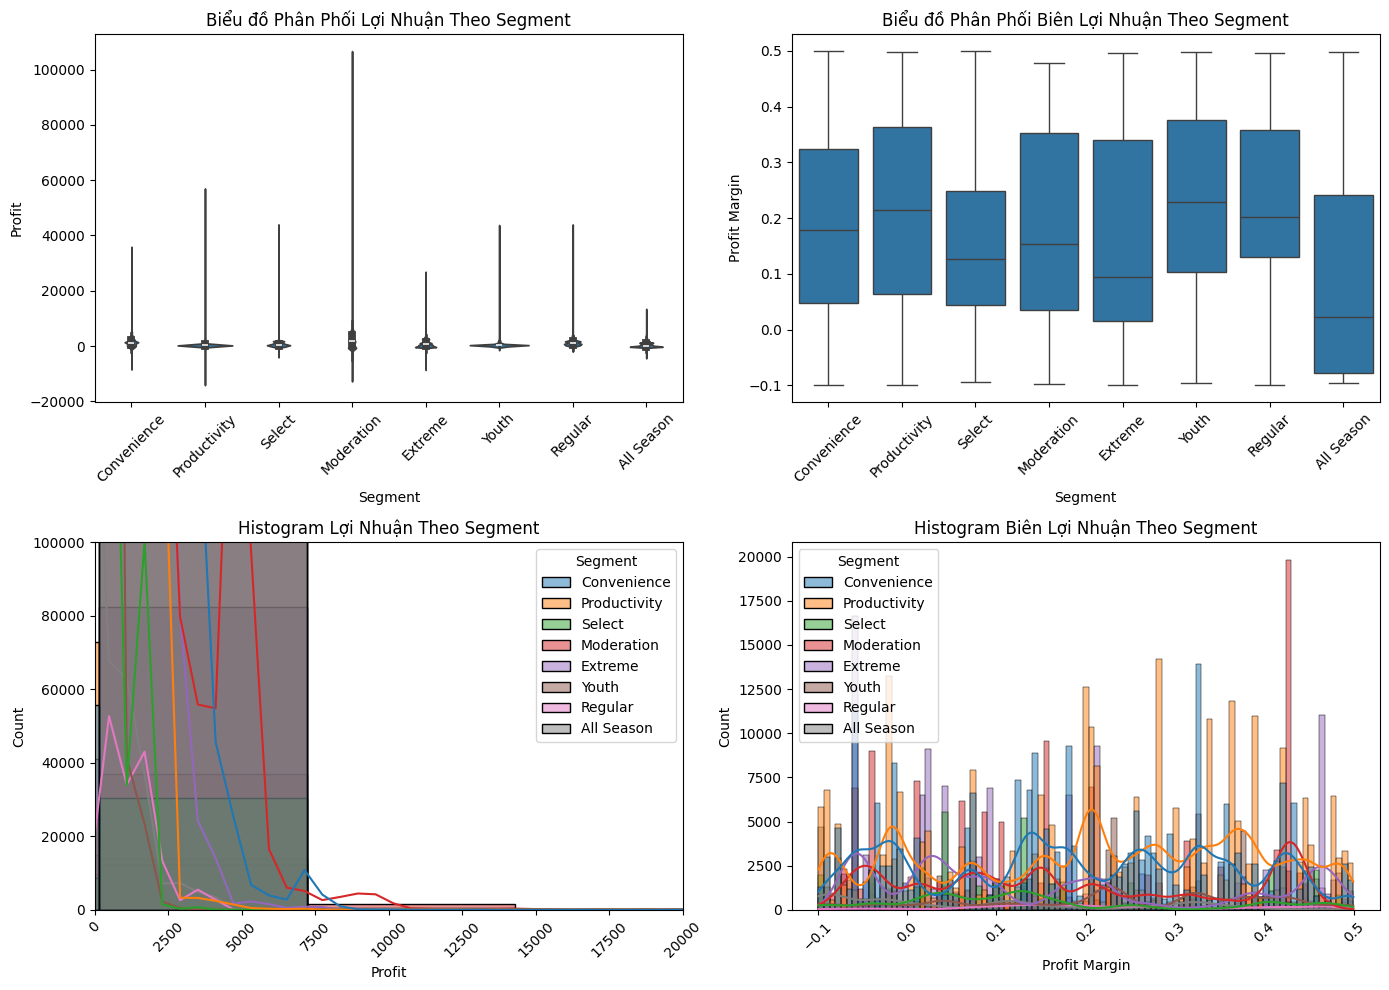

In [34]:

# Tính skewness và kurtosis theo segment cho lợi nhuận và biên lợi nhuận
skewness_by_segment = df.groupby('Segment')['Profit'].apply(lambda x: skew(x))
kurtosis_by_segment = df.groupby('Segment')['Profit'].apply(lambda x: kurtosis(x))

# Tính skewness và kurtosis cho biên lợi nhuận
skewness_margin_by_segment = df.groupby('Segment')['Profit Margin'].apply(lambda x: skew(x))
kurtosis_margin_by_segment = df.groupby('Segment')['Profit Margin'].apply(lambda x: kurtosis(x))

# In kết quả skewness và kurtosis
print("Skewness (Lợi Nhuận) theo Segment:")
print(skewness_by_segment)
print("\nKurtosis (Lợi Nhuận) theo Segment:")
print(kurtosis_by_segment)

print("\nSkewness (Biên Lợi Nhuận) theo Segment:")
print(skewness_margin_by_segment)
print("\nKurtosis (Biên Lợi Nhuận) theo Segment:")
print(kurtosis_margin_by_segment)

# Vẽ biểu đồ phân phối cho lợi nhuận và biên lợi nhuận theo segment
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Biểu đồ phân phối cho Lợi Nhuận theo Segment (thay violin plot)
sns.violinplot(x='Segment', y='Profit', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Biểu đồ Phân Phối Lợi Nhuận Theo Segment')

# Biểu đồ phân phối cho Biên Lợi Nhuận theo Segment
sns.boxplot(x='Segment', y='Profit Margin', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Biểu đồ Phân Phối Biên Lợi Nhuận Theo Segment')

# Biểu đồ phân phối lợi nhuận (Histogram) theo Segment (giảm độ cao còn 13000 và trục hoành max là 7000)
sns.histplot(df, x='Profit', hue='Segment', kde=True, ax=axes[1, 0], binwidth=7000)
axes[1, 0].set_title('Histogram Lợi Nhuận Theo Segment')
axes[1, 0].set_ylim(0, 100000)  # Điều chỉnh chiều cao tối đa
axes[1, 0].set_xlim(0, 20000)  # Điều chỉnh trục hoành tối đa


# Biểu đồ phân phối biên lợi nhuận (Histogram) theo Segment
sns.histplot(df, x='Profit Margin', hue='Segment', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram Biên Lợi Nhuận Theo Segment')

# Chỉnh sửa chữ trục X nghiêng 45 độ
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


### **Phân Tích Rủi Ro Và Chiến Lược Đầu Tư Theo Segment**

#### **1. Phân Tích Rủi Ro Theo Segment**

##### **Phân phối lợi nhuận (Profit Distribution)**
- Các danh mục có lợi nhuận cao nhưng biến động mạnh bao gồm **Moderation, Select, Youth, Regular, Productivity** với nhiều giá trị ngoại lai.
- **Youth có mức độ biến động lợi nhuận cao nhất**, phản ánh rủi ro lớn.
- **Convenience và All Season có mức lợi nhuận thấp hơn nhưng ổn định hơn.**

##### **Phân phối biên lợi nhuận (Profit Margin Distribution)**
- **All Season và Convenience có biên lợi nhuận ít biến động nhất**, thể hiện tính ổn định cao.
- **Select, Extreme và Youth có biên lợi nhuận dao động lớn**, thể hiện mức rủi ro cao.

##### **Độ lệch chuẩn lợi nhuận theo thời gian**
- **Moderation và Extreme có độ lệch chuẩn cao nhất về lợi nhuận**, thể hiện rủi ro lớn nhất.
- **Convenience, Select và Productivity có độ lệch chuẩn trung bình.**
- **Youth có độ lệch chuẩn thấp nhưng skewness rất cao, có nghĩa là có thể xuất hiện lợi nhuận cực lớn hoặc cực thấp.**

##### **Độ lệch chuẩn tổng lợi nhuận và biên lợi nhuận theo Segment**
- **Moderation có độ lệch chuẩn lợi nhuận lớn nhất → rủi ro cao nhất.**
- **Convenience và Youth có độ lệch chuẩn lợi nhuận thấp nhất → ít biến động nhất.**
- **Extreme và Productivity có độ lệch chuẩn biên lợi nhuận cao, cho thấy lợi nhuận không ổn định.**

##### **Skewness và Kurtosis**
- **Skewness (Profit):**
  - **Youth, Select, Regular và Productivity có skewness cực cao**, cho thấy lợi nhuận có nhiều giá trị đột biến.
  - **Convenience có skewness gần 0**, tức lợi nhuận phân bố cân bằng.
- **Kurtosis (Profit):**
  - **Youth, Select và Productivity có kurtosis cực lớn**, cho thấy lợi nhuận có nhiều giá trị cực đoan.
  - **All Season có kurtosis thấp, phản ánh lợi nhuận ổn định hơn.**
- **Skewness (Profit Margin):**
  - **Youth có skewness âm**, thể hiện phần lớn biên lợi nhuận nhỏ.
  - **Select và Extreme có skewness dương, phản ánh khả năng đạt lợi nhuận cao hơn.**
- **Kurtosis (Profit Margin):**
  - **Tất cả các phân khúc có kurtosis âm, thể hiện biên lợi nhuận có sự ổn định cao.**

---

#### **2. Chiến Lược Đầu Tư Theo Segment**
Dựa trên phân tích trên, tôi đề xuất chiến lược đầu tư theo mức độ chấp nhận rủi ro:

##### **1. Chiến lược rủi ro cao - lợi nhuận cao (Aggressive Strategy)**
- **Danh mục: Youth, Select, Productivity, Extreme**
- **Đặc điểm:**
  - Có lợi nhuận đột biến nhưng rủi ro cao.
  - Kurtosis rất lớn, thể hiện khả năng xuất hiện lợi nhuận cực cao hoặc cực thấp.
  - Skewness cao, có thể đạt lợi nhuận khổng lồ nhưng cũng có nguy cơ lỗ nặng.
- **Chiến lược:**
  - Đầu tư nếu bạn có khả năng chịu rủi ro lớn.
  - Cần áp dụng các kỹ thuật phân tích rủi ro như Value at Risk (VaR) hoặc sử dụng hedging để giảm thiểu tổn thất.

##### **2. Chiến lược cân bằng rủi ro - lợi nhuận (Balanced Strategy)**
- **Danh mục: Convenience, Regular, Select**
- **Đặc điểm:**
  - Rủi ro ở mức trung bình, có khả năng sinh lời ổn định hơn so với nhóm trên.
  - Độ lệch chuẩn trung bình, ít biến động hơn.
- **Chiến lược:**
  - Đầu tư nếu bạn muốn có sự ổn định nhưng vẫn muốn có cơ hội lợi nhuận cao.
  - Sử dụng chiến lược đa dạng hóa để giảm thiểu rủi ro.

##### **3. Chiến lược an toàn - rủi ro thấp (Conservative Strategy)**
- **Danh mục: All Season, Convenience**
- **Đặc điểm:**
  - Lợi nhuận thấp hơn nhưng ổn định nhất.
  - Biên lợi nhuận có sự ổn định cao, ít dao động theo thời gian.
- **Chiến lược:**
  - Đầu tư dài hạn với mục tiêu bảo toàn vốn.
  - Phù hợp với các nhà đầu tư không muốn chịu biến động lớn.

---

#### **Kết Luận**
- **Nếu bạn chấp nhận rủi ro cao → đầu tư vào Youth, Select, Productivity, Extreme để tối đa hóa lợi nhuận.**
- **Nếu muốn sự cân bằng giữa rủi ro và lợi nhuận → Convenience, Regular và Select là lựa chọn tốt.**
- **Nếu muốn đầu tư an toàn, ít rủi ro → chọn All Season và Convenience.**

---



## 5. Kiểm tra tương quan giữa các thành phần của Segment

### Phân tích tương quan của các Segment theo doanh số và doanh thu 


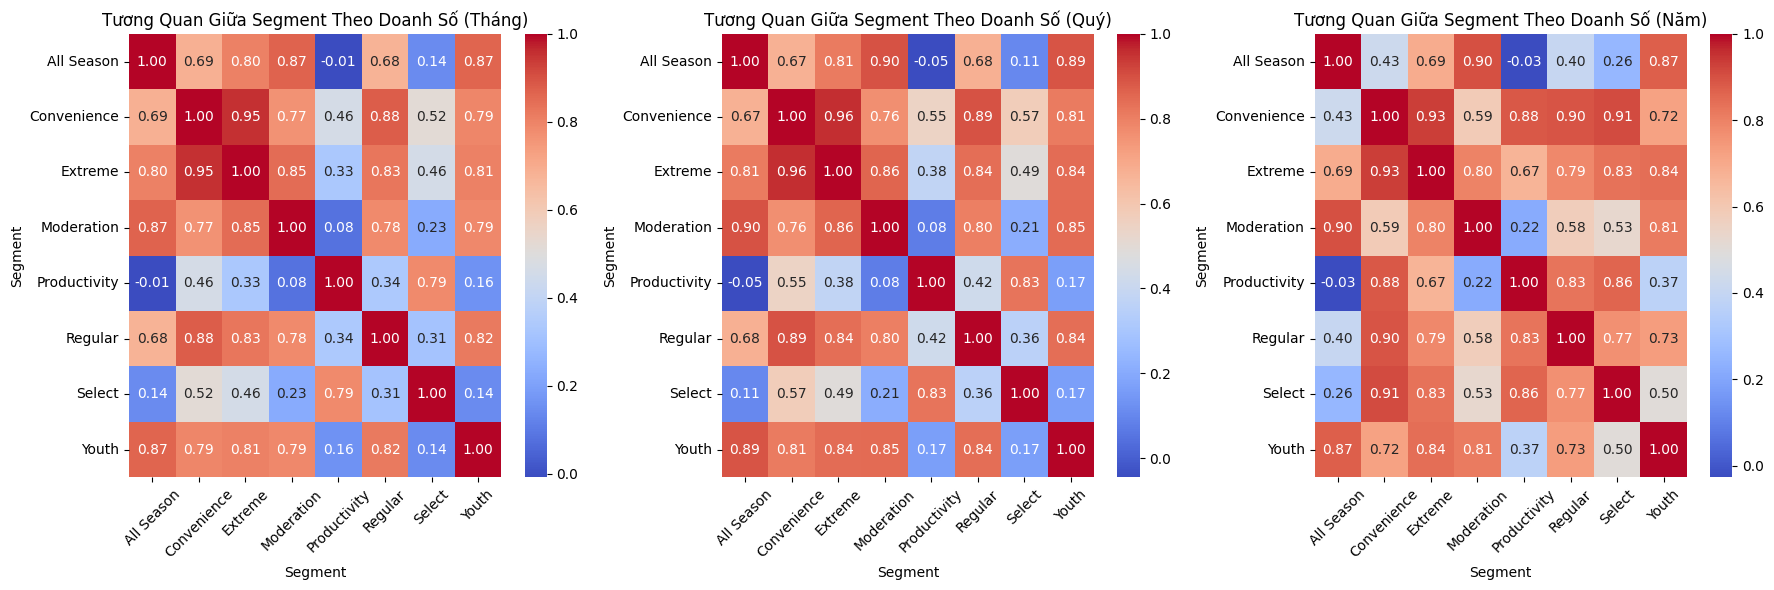

In [ ]:
# Chuyển cột Date về tháng, quý, năm
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Nhóm dữ liệu theo Month, Quarter, Year và Segment, tính tổng Units
monthly_units = df.groupby(['Month', 'Segment'])['Units'].sum().unstack()
quarterly_units = df.groupby(['Quarter', 'Segment'])['Units'].sum().unstack()
yearly_units = df.groupby(['Year', 'Segment'])['Units'].sum().unstack()

# Tính ma trận tương quan giữa các Segment theo Units
corr_month = monthly_units.corr()
corr_quarter = quarterly_units.corr()
corr_year = yearly_units.corr()

# Vẽ heatmap với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(corr_month, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Tương Quan Giữa Segment Theo Doanh Số (Tháng)")
axes[0].tick_params(axis='x', rotation=45)

sns.heatmap(corr_quarter, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Tương Quan Giữa Segment Theo Doanh Số (Quý)")
axes[1].tick_params(axis='x', rotation=45)

sns.heatmap(corr_year, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2])
axes[2].set_title("Tương Quan Giữa Segment Theo Doanh Số (Năm)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


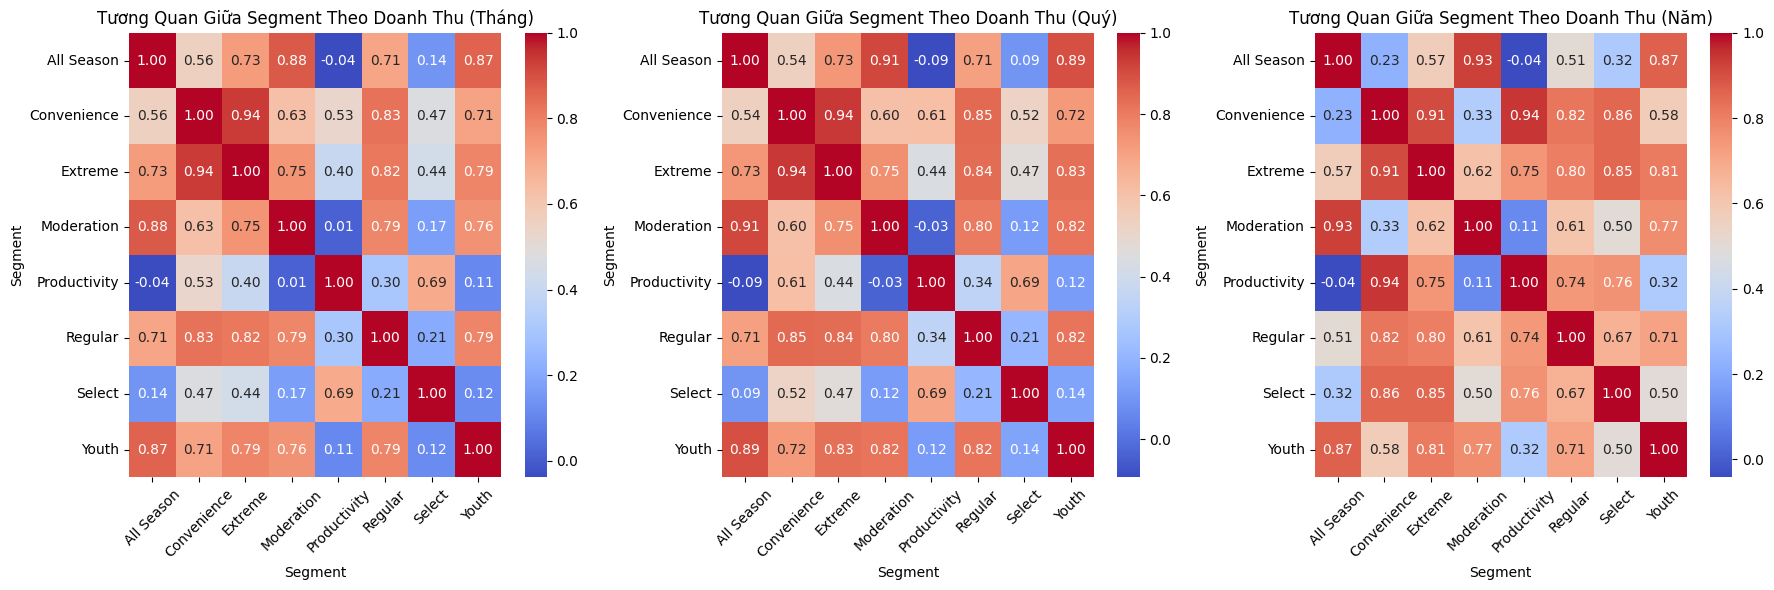

In [ ]:
# Chuyển cột Date về tháng, quý, năm
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Nhóm dữ liệu theo Month, Quarter, Year và Segment, tính tổng Revenue
monthly_revenue = df.groupby(['Month', 'Segment'])['Revenue'].sum().unstack()
quarterly_revenue = df.groupby(['Quarter', 'Segment'])['Revenue'].sum().unstack()
yearly_revenue = df.groupby(['Year', 'Segment'])['Revenue'].sum().unstack()

# Tính ma trận tương quan giữa các Segment theo Month, Quarter, Year
corr_month = monthly_revenue.corr()
corr_quarter = quarterly_revenue.corr()
corr_year = yearly_revenue.corr()

# Vẽ heatmap với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(corr_month, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Tương Quan Giữa Segment Theo Doanh Thu (Tháng)")
axes[0].tick_params(axis='x', rotation=45)

sns.heatmap(corr_quarter, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Tương Quan Giữa Segment Theo Doanh Thu (Quý)")
axes[1].tick_params(axis='x', rotation=45)

sns.heatmap(corr_year, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2])
axes[2].set_title("Tương Quan Giữa Segment Theo Doanh Thu (Năm)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### 1. Tổng Quan
- Các segment có **mối tương quan cao**, đặc biệt là giữa **Extreme, Convenience, All Season, và Moderation**.  
- **Productivity và Select có mức tương quan thấp hơn với các nhóm khác**, thể hiện sự độc lập hơn về doanh số và doanh thu.  

#### 2. Theo Từng Thời Kỳ
- **Tháng:** Extreme và Convenience có mối tương quan cực kỳ chặt chẽ (~0.95), cho thấy doanh số và doanh thu của chúng có xu hướng thay đổi cùng nhau. Productivity có mối tương quan yếu với hầu hết các nhóm.  
- **Quý:** Mối quan hệ giữa Extreme và Convenience tiếp tục duy trì mạnh (~0.96), Moderation cũng có liên kết cao với các nhóm lớn khác. Productivity vẫn có tương quan thấp.  
- **Năm:** Mối quan hệ giữa Convenience và Extreme vẫn rất chặt chẽ, nhưng tương quan giữa Productivity với các nhóm khác có dấu hiệu tăng nhẹ.  

#### 3. Nhóm Có Ảnh Hưởng Mạnh Mẽ Nhất
- **Extreme và Convenience** có mức ảnh hưởng lớn đến các nhóm khác.  
- **Moderation cũng có tác động đáng kể, đặc biệt là với Extreme và All Season.**  

#### 4. Nhóm Có Sự Độc Lập Cao
- **Productivity có mối liên kết yếu nhất với các nhóm còn lại**, cho thấy đây có thể là một nhóm có xu hướng riêng.  
- **Select có mức tương quan trung bình với phần lớn các nhóm khác**, thể hiện sự giao thoa giữa nhóm chính và nhóm độc lập.  

#### 5. Tổng Kết
- **Extreme, Convenience, và All Season có mức ảnh hưởng mạnh, tác động lớn đến doanh thu và doanh số chung.**  
- **Productivity là nhóm ít bị ảnh hưởng nhất, có thể cần chiến lược riêng.**  
- **Moderation đóng vai trò kết nối giữa các nhóm chính.**



## 6. Kiểm tra yếu tố mùa vụ


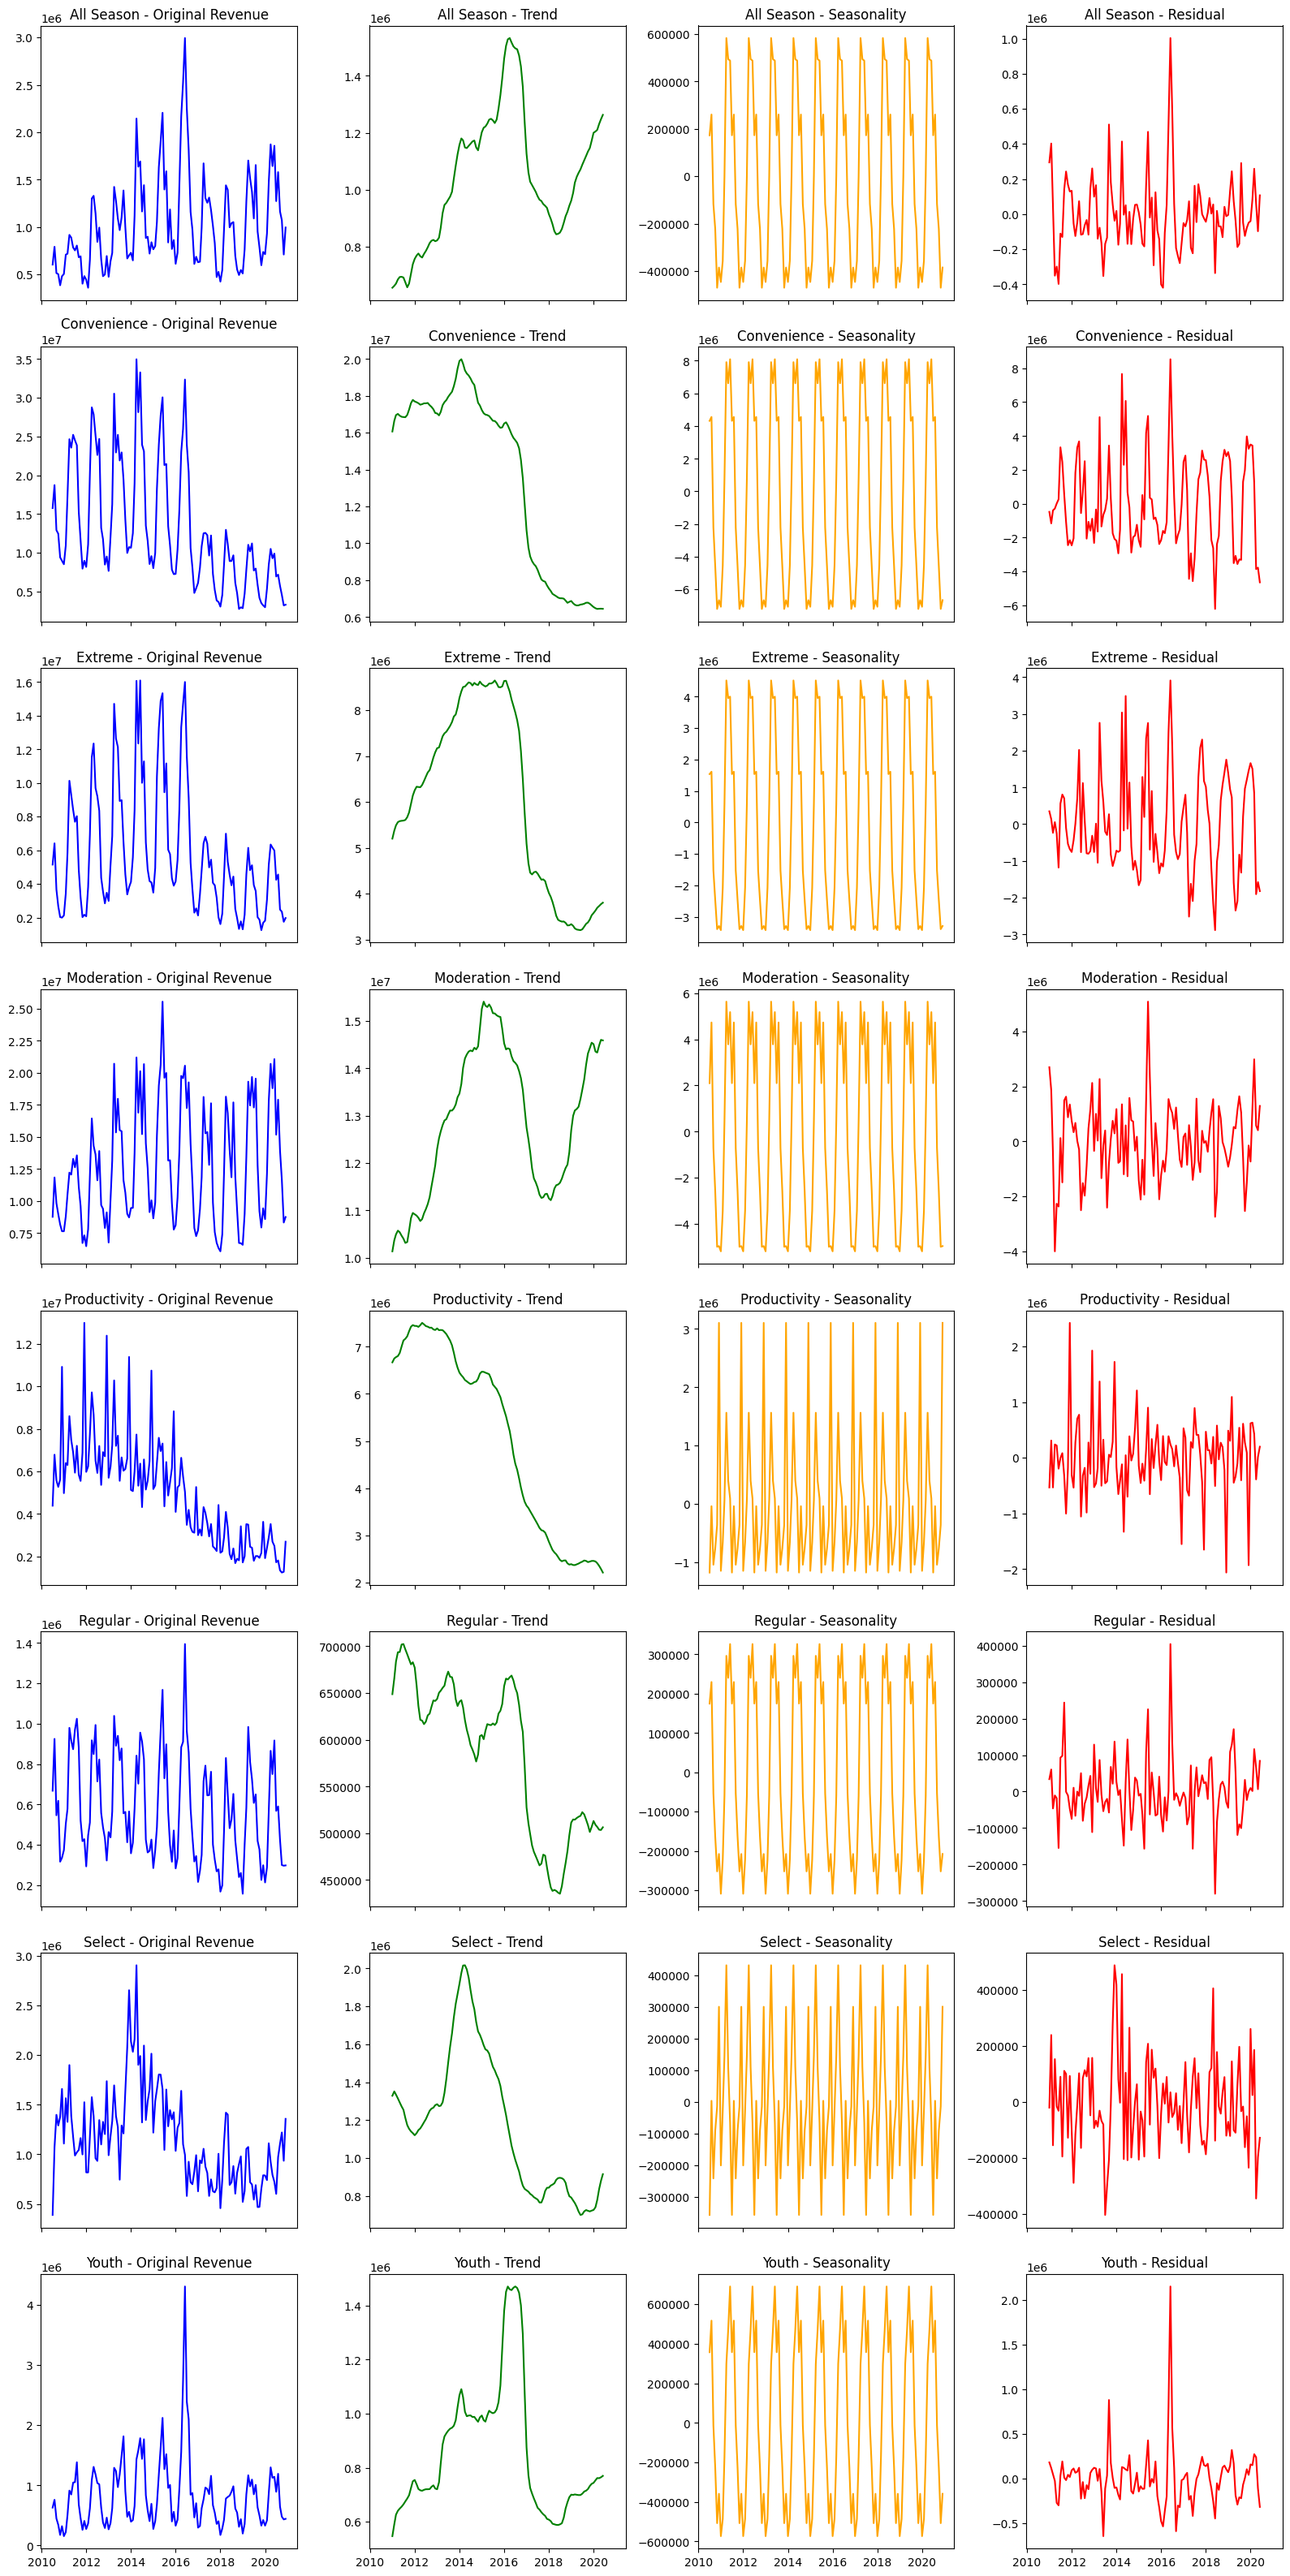

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Chuyển cột Date về dạng tháng (YYYY-MM)
df['Month'] = df['Date'].dt.to_period('M')

# Nhóm dữ liệu theo tháng và Segment
monthly_revenue_segment = df.groupby(['Month', 'Segment'])['Revenue'].sum().unstack()

# Chuyển chỉ mục thành datetime
monthly_revenue_segment.index = monthly_revenue_segment.index.to_timestamp()

# Xác định số lượng Segment để tạo subplot
num_segments = len(monthly_revenue_segment.columns)
fig, axes = plt.subplots(num_segments, 4, figsize=(16, 4 * num_segments), sharex=True)

# Duyệt qua từng Segment và thực hiện Seasonal Decomposition
for i, segment in enumerate(monthly_revenue_segment.columns):
    revenue_series = monthly_revenue_segment[segment].dropna()  # Loại bỏ NaN
    
    # Kiểm tra nếu đủ dữ liệu để phân tích
    if len(revenue_series) >= 24:  # Cần ít nhất 2 năm dữ liệu cho period=12
        decomposition = seasonal_decompose(revenue_series, model='additive', period=12)

        # Vẽ biểu đồ từng phần
        axes[i, 0].plot(decomposition.observed, label='Original', color='blue')
        axes[i, 0].set_title(f'{segment} - Original Revenue')

        axes[i, 1].plot(decomposition.trend, label='Trend', color='green')
        axes[i, 1].set_title(f'{segment} - Trend')

        axes[i, 2].plot(decomposition.seasonal, label='Seasonality', color='orange')
        axes[i, 2].set_title(f'{segment} - Seasonality')

        axes[i, 3].plot(decomposition.resid, label='Residual', color='red')
        axes[i, 3].set_title(f'{segment} - Residual')

    else:
        for j in range(4):
            axes[i, j].text(0.5, 0.5, f'Không đủ dữ liệu cho {segment}', 
                            horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

# Điều chỉnh layout
plt.tight_layout()
plt.show()


### Nhận Xét Về Yếu Tố Mùa Vụ Của Các Segment

#### 1. All Season  
- **Xu hướng:** Tăng mạnh đến 2017, sau đó giảm nhẹ và phục hồi.  
- **Mùa vụ:** Rõ ràng, biên độ dao động lớn.  
- **Phần dư:** Biến động mạnh nhưng không có nhiều điểm bất thường.  

#### 2. Convenience  
- **Xu hướng:** Giảm dần sau 2016, cho thấy sự suy giảm dài hạn.  
- **Mùa vụ:** Chu kỳ rõ ràng nhưng có xu hướng giảm dần.  
- **Phần dư:** Biến động lớn, có nhiều điểm đột biến.  

#### 3. Extreme  
- **Xu hướng:** Tăng mạnh đến 2016, sau đó giảm dần.  
- **Mùa vụ:** Rõ ràng với biên độ dao động đều đặn.  
- **Phần dư:** Dao động mạnh, có một số điểm bất thường.  

#### 4. Moderation  
- **Xu hướng:** Hai giai đoạn tăng mạnh (2014-2016, 2018-nay).  
- **Mùa vụ:** Dao động theo chu kỳ nhưng không quá mạnh.  
- **Phần dư:** Biến động lớn, có sự bất thường vào một số thời điểm.  

#### 5. Productivity  
- **Xu hướng:** Giảm dần từ 2015, thể hiện sự suy giảm bền vững.  
- **Mùa vụ:** Chu kỳ ổn định nhưng có xu hướng giảm về biên độ.  
- **Phần dư:** Dao động mạnh, có nhiều điểm lệch so với xu hướng.  

#### 6. Regular  
- **Xu hướng:** Tăng nhẹ đến 2016, sau đó có xu hướng ổn định.  
- **Mùa vụ:** Rõ ràng nhưng có biên độ dao động thấp hơn các nhóm khác.  
- **Phần dư:** Không có nhiều đột biến, khá ổn định.  

#### 7. Select  
- **Xu hướng:** Tăng mạnh đến 2016, sau đó giảm nhanh rồi phục hồi.  
- **Mùa vụ:** Rõ ràng nhưng có sự dao động bất thường.  
- **Phần dư:** Biến động mạnh, có nhiều điểm bất thường.  

#### 8. Youth  
- **Xu hướng:** Tăng mạnh đến 2016, sau đó giảm nhanh rồi ổn định.  
- **Mùa vụ:** Chu kỳ rõ ràng với biên độ dao động lớn.  
- **Phần dư:** Có một số điểm đột biến, đặc biệt vào năm 2016.  

#### Tổng kết  
- **Các segment có tính mùa vụ rõ ràng, nhưng mức độ dao động khác nhau.**  
- **Convenience và Productivity có xu hướng giảm dài hạn, có thể cần điều chỉnh chiến lược.**  
- **Moderation và Youth có nhiều biến động bất thường, có thể do các sự kiện đặc biệt.**

## 7. Hiệu suất của từng Segment

In [ ]:
# Thêm cột Month, Quarter, Year để phân tích theo thời gian
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Year'] = df['Date'].dt.year

# Tạo dictionary lưu kết quả
results = {}

# Duyệt qua từng Segment
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]

    # Cửa hàng có doanh thu cao nhất
    best_store_revenue = segment_data.groupby('City')['Revenue'].sum().idxmax()
    
    # Cửa hàng có lợi nhuận cao nhất
    best_store_profit = segment_data.groupby('City')['Profit'].sum().idxmax()

    # Vùng có doanh thu cao nhất
    best_region_revenue = segment_data.groupby('Region')['Revenue'].sum().idxmax()
    
    # Vùng có lợi nhuận cao nhất
    best_region_profit = segment_data.groupby('Region')['Profit'].sum().idxmax()

    # Tháng bán chạy nhất
    best_month = segment_data.groupby('Month')['Units'].sum().idxmax()

    # Quý bán chạy nhất
    best_quarter = segment_data.groupby('Quarter')['Units'].sum().idxmax()

    # Năm bán chạy nhất
    best_year = segment_data.groupby('Year')['Units'].sum().idxmax()

    # Lưu kết quả vào dictionary
    results[segment] = {
        "Cửa hàng doanh thu cao nhất": best_store_revenue,
        "Cửa hàng lợi nhuận cao nhất": best_store_profit,
        "Vùng doanh thu cao nhất": best_region_revenue,
        "Vùng lợi nhuận cao nhất": best_region_profit,
        "Tháng bán chạy nhất": best_month,
        "Quý bán chạy nhất": str(best_quarter),
        "Năm bán chạy nhất": best_year
    }

# Chuyển kết quả thành DataFrame để hiển thị
df_results = pd.DataFrame(results).T
print(df_results)


             Cửa hàng doanh thu cao nhất Cửa hàng lợi nhuận cao nhất  \
Convenience              San Antonio, TX             San Antonio, TX   
Productivity                   Miami, FL                   Miami, FL   
Select                         Miami, FL                 Houston, TX   
Moderation                   Houston, TX               Las Vegas, NV   
Extreme                        Miami, FL               San Diego, CA   
Youth                       New York, NY                New York, NY   
Regular                San Francisco, CA           San Francisco, CA   
All Season                     Miami, FL                   Miami, FL   

             Vùng doanh thu cao nhất Vùng lợi nhuận cao nhất  \
Convenience                     East                    East   
Productivity                    West                    West   
Select                          West                    West   
Moderation                      East                    East   
Extreme                        

## 8. Kiểm định

### a. Kiểm định xem mùa (season) và kỳ nghỉ lễ ở Mỹ có ảnh hưởng đến doanh thu (Revenue) và doanh số (Units) của từng Segment

In [ ]:
import scipy.stats as stats
# Tạo DataFrame lưu kết quả kiểm định
results = []

for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]
    
    # Kiểm định ANOVA cho Season (Doanh thu & Doanh số)
    anova_season_revenue = stats.f_oneway(
        *[segment_data.loc[segment_data['Season'] == season, 'Revenue'] for season in segment_data['Season'].unique()]
    )
    anova_season_units = stats.f_oneway(
        *[segment_data.loc[segment_data['Season'] == season, 'Units'] for season in segment_data['Season'].unique()]
    )
    
    # Kiểm định T-test cho Holiday (Doanh thu & Doanh số)
    if segment_data['Holiday'].nunique() > 1:  # Kiểm tra xem có đủ nhóm để kiểm định không
        revenue_holiday = segment_data.loc[segment_data['Holiday'] == 1, 'Revenue']
        revenue_non_holiday = segment_data.loc[segment_data['Holiday'] == 0, 'Revenue']
        units_holiday = segment_data.loc[segment_data['Holiday'] == 1, 'Units']
        units_non_holiday = segment_data.loc[segment_data['Holiday'] == 0, 'Units']
        
        t_test_holiday_revenue = stats.ttest_ind(revenue_holiday, revenue_non_holiday, equal_var=False, nan_policy='omit')
        t_test_holiday_units = stats.ttest_ind(units_holiday, units_non_holiday, equal_var=False, nan_policy='omit')
    else:
        t_test_holiday_revenue = None
        t_test_holiday_units = None

    # Lưu kết quả vào danh sách
    results.append({
        "Segment": segment,
        "ANOVA Season Revenue": anova_season_revenue.pvalue if anova_season_revenue else None,
        "ANOVA Season Units": anova_season_units.pvalue if anova_season_units else None,
        "T-Test Holiday Revenue": t_test_holiday_revenue.pvalue if t_test_holiday_revenue else None,
        "T-Test Holiday Units": t_test_holiday_units.pvalue if t_test_holiday_units else None,
    })

# Chuyển danh sách kết quả thành DataFrame
df_results = pd.DataFrame(results)

# Hiển thị kết quả
print(df_results)

# 🎯 In diễn giải kết quả có điều kiện if-else
for _, row in df_results.iterrows():
    print(f"\n📌 **Segment: {row['Segment']}**")

    if row["ANOVA Season Revenue"] < 0.05:
        print("✅ Mùa có ảnh hưởng đến doanh thu.")
    else:
        print("❌ Không có bằng chứng cho thấy mùa ảnh hưởng đến doanh thu.")

    if row["ANOVA Season Units"] < 0.05:
        print("✅ Mùa có ảnh hưởng đến doanh số.")
    else:
        print("❌ Không có bằng chứng cho thấy mùa ảnh hưởng đến doanh số.")

    if row["T-Test Holiday Revenue"] is not None and row["T-Test Holiday Revenue"] < 0.05:
        print("✅ Ngày lễ có ảnh hưởng đến doanh thu.")
    else:
        print("❌ Không có bằng chứng cho thấy ngày lễ ảnh hưởng đến doanh thu.")

    if row["T-Test Holiday Units"] is not None and row["T-Test Holiday Units"] < 0.05:
        print("✅ Ngày lễ có ảnh hưởng đến doanh số.")
    else:
        print("❌ Không có bằng chứng cho thấy ngày lễ ảnh hưởng đến doanh số.")


        Segment  ANOVA Season Revenue  ANOVA Season Units  \
0   Convenience          0.000000e+00        2.168267e-02   
1  Productivity         3.823769e-240        3.531803e-13   
2        Select          2.751613e-03        5.770583e-02   
3    Moderation          6.540792e-42        2.523794e-03   
4       Extreme          6.154265e-68        1.359359e-02   
5         Youth          2.302994e-02        6.000899e-03   
6       Regular          4.974641e-11        2.573734e-01   
7    All Season          9.087560e-19        7.025078e-01   

   T-Test Holiday Revenue  T-Test Holiday Units  
0            8.749781e-08              0.303086  
1            3.705518e-03              0.000015  
2            2.886229e-01              0.245865  
3            8.921008e-02              0.153697  
4            2.887205e-02              0.541422  
5            6.852804e-01              0.912661  
6            8.232027e-01              0.000359  
7            2.159225e-04              0.148991  


# III. Liên hệ giữa Category và Segment 

## 1. Category có phải là tập lớn của Segment ?

In [40]:
# Xem bảng tần suất giữa Category và Segment
contingency_table = pd.crosstab(df['Category'], df['Segment'])
print(contingency_table)


Segment   All Season  Convenience  Extreme  Moderation  Productivity  Regular  \
Category                                                                        
Mix            28683            0        0           0          1770        0   
Rural              0            0        0           0        283348        0   
Urban              0       233783   123465      131162             0    13732   
Youth              0            0        0           0             0        0   

Segment   Select  Youth  
Category                 
Mix            0      0  
Rural      38940      0  
Urban          0      0  
Youth          0  46678  


Vì mỗi phần tử của Segment thuộc đúng 1 Category nên Category là tập lớn của Segment 

## 2. Tỉ lệ đóng góp của Segment vào mỗi Category

### a. Trong 10 năm

In [ ]:
# Tính tổng Units & Revenue theo Category - Segment
total_units = df.groupby(['Category', 'Segment'])['Units'].sum()
total_revenue = df.groupby(['Category', 'Segment'])['Revenue'].sum()

# Tính tổng Units & Revenue theo Category
total_units_category = df.groupby('Category')['Units'].sum()
total_revenue_category = df.groupby('Category')['Revenue'].sum()

# Tính phần trăm đóng góp của mỗi Segment trong Category
percent_units = (total_units / total_units_category).unstack().fillna(0) * 100
percent_revenue = (total_revenue / total_revenue_category).unstack().fillna(0) * 100

# Tạo bảng hiển thị 4x8
df_table = pd.concat([percent_units, percent_revenue], keys=['Units (%)', 'Revenue (%)'])
df_table = df_table.swaplevel().sort_index()

# Hiển thị bảng
print(df_table)



Segment               All Season  Convenience    Extreme  Moderation  \
Category                                                               
Mix      Revenue (%)   92.784785     0.000000   0.000000    0.000000   
         Units (%)     94.154221     0.000000   0.000000    0.000000   
Rural    Revenue (%)    0.000000     0.000000   0.000000    0.000000   
         Units (%)      0.000000     0.000000   0.000000    0.000000   
Urban    Revenue (%)    0.000000    40.821209  18.088421   39.303141   
         Units (%)      0.000000    46.238565  24.560529   26.417931   
Youth    Revenue (%)    0.000000     0.000000   0.000000    0.000000   
         Units (%)      0.000000     0.000000   0.000000    0.000000   

Segment               Productivity   Regular     Select  Youth  
Category                                                        
Mix      Revenue (%)      7.215215  0.000000   0.000000    0.0  
         Units (%)        5.845779  0.000000   0.000000    0.0  
Rural    Revenue (%

In [ ]:
# Tính tổng Units & Revenue theo Category - Segment
total_units = df.groupby(['Category', 'Segment'])['Units'].sum()
total_revenue = df.groupby(['Category', 'Segment'])['Revenue'].sum()

# Tính tổng Units & Revenue theo Category
total_units_category = df.groupby('Category')['Units'].sum()
total_revenue_category = df.groupby('Category')['Revenue'].sum()

# Tính phần trăm đóng góp của mỗi Segment trong Category
percent_units = (total_units / total_units_category).unstack().fillna(0) * 100
percent_revenue = (total_revenue / total_revenue_category).unstack().fillna(0) * 100

# Tính phương sai của tỷ lệ đóng góp trong từng Category
variance_units = percent_units.var(axis=1)
variance_revenue = percent_revenue.var(axis=1)

# Tạo bảng hiển thị
df_variance = pd.DataFrame({
    'Variance Units (%)': variance_units,
    'Variance Revenue (%)': variance_revenue
})

# Hiển thị bảng
print(df_variance)


          Variance Units (%)  Variance Revenue (%)
Category                                          
Mix              1092.741492           1058.725101
Rural             945.890727            806.564018
Urban             313.839498            327.356173
Youth            1250.000000           1250.000000


### b. Theo thời gian 

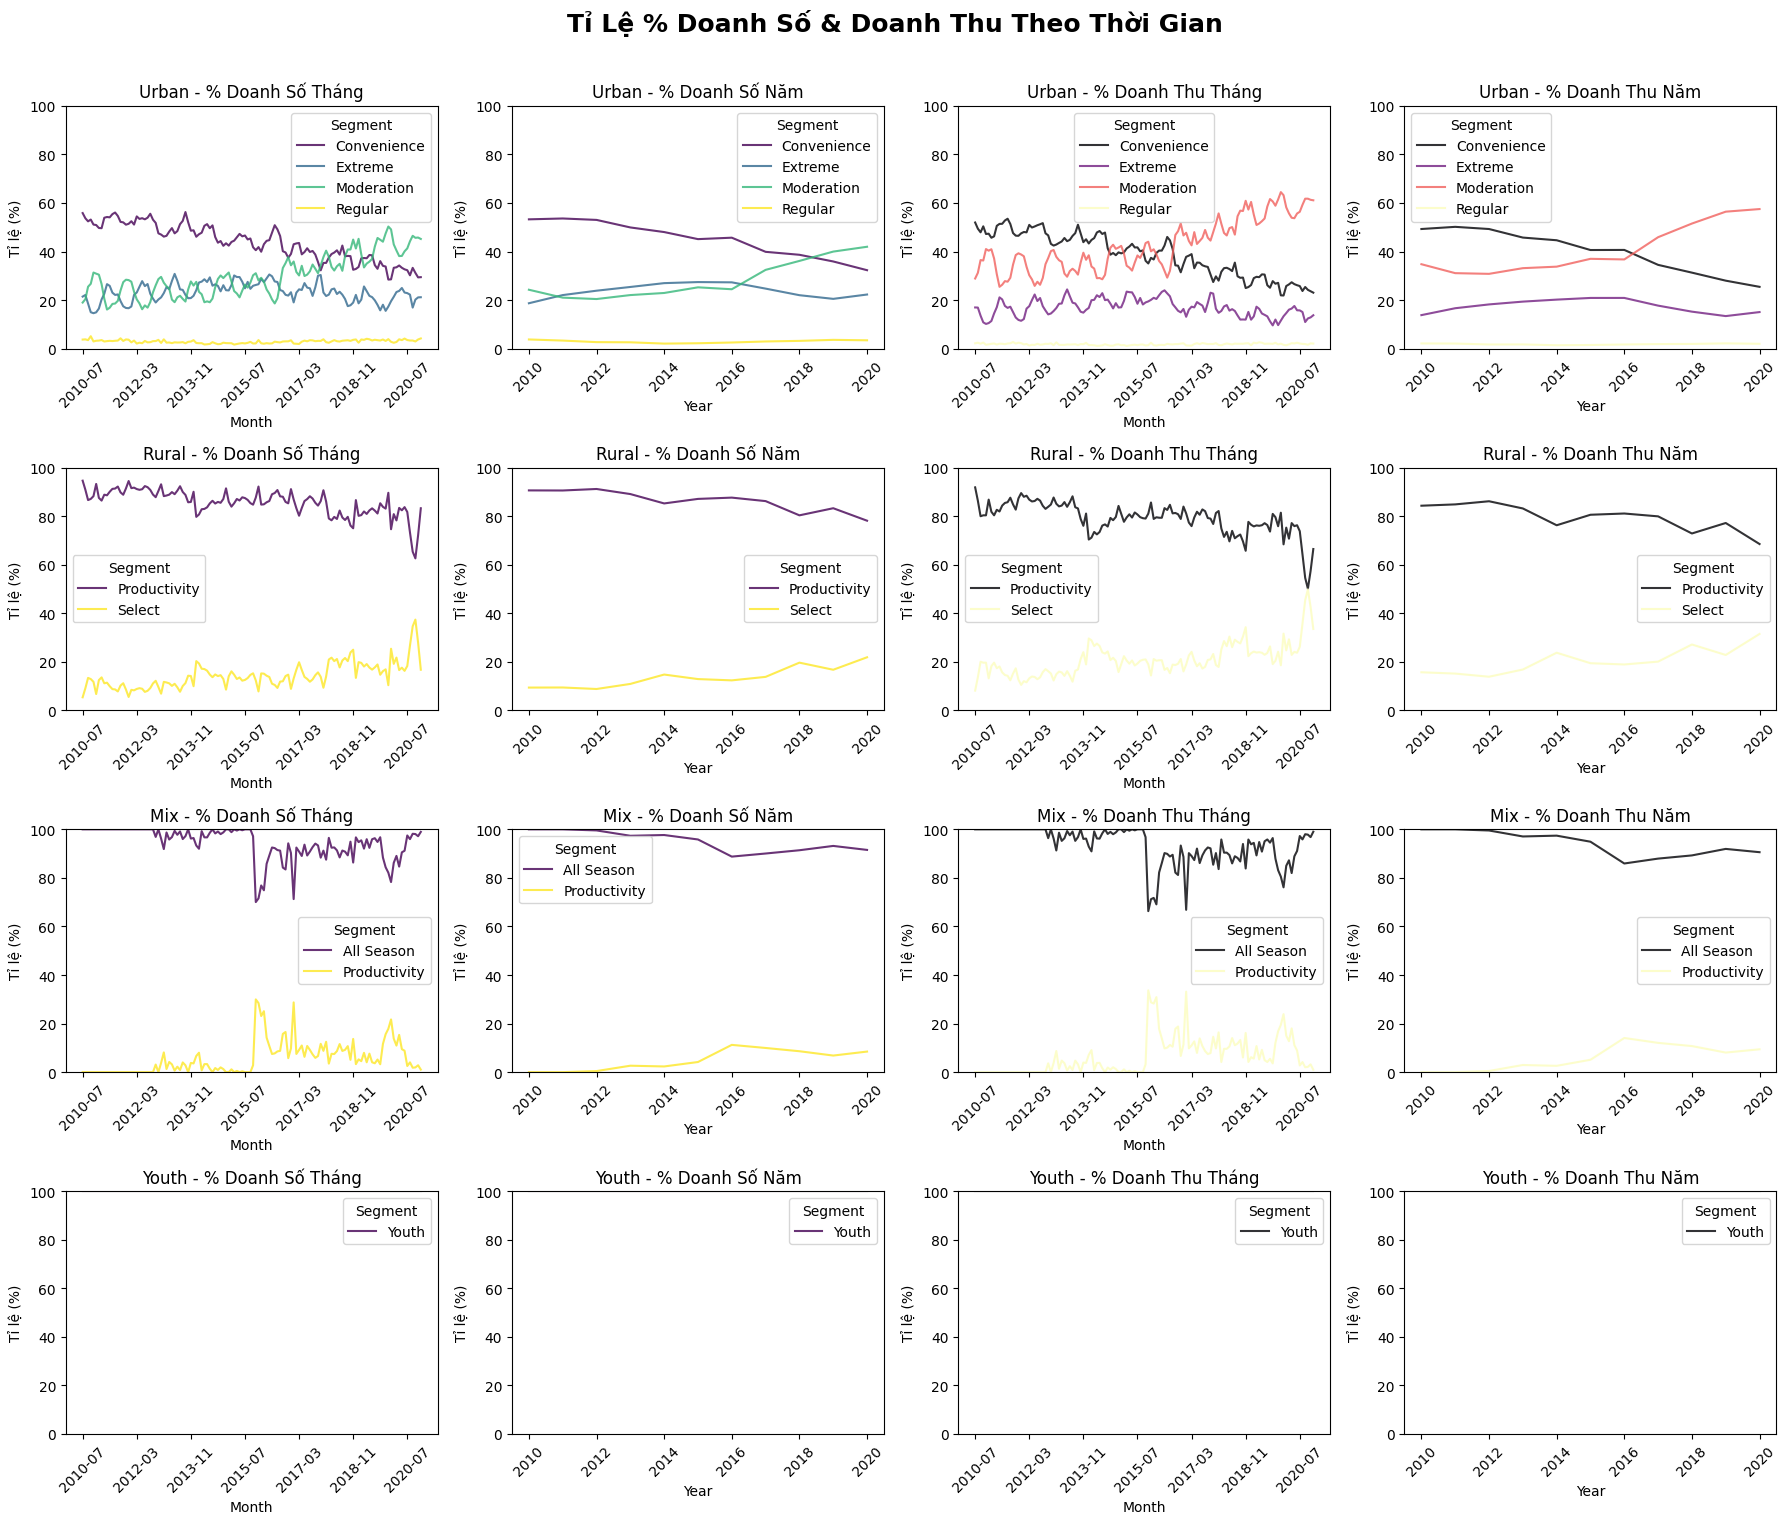

In [ ]:
# Chuyển cột Date về tháng và năm
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Year'] = df['Date'].dt.year.astype(str)

# Lấy danh sách các Category
categories = df['Category'].unique()

# Xác định số lượng hàng và cột
num_categories = len(categories)
rows = num_categories  # Mỗi Category chiếm 1 hàng (4 cột)
cols = 4  # 4 subplot cho mỗi Category

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))  
fig.suptitle('Tỉ Lệ % Doanh Số & Doanh Thu Theo Thời Gian', fontsize=18, fontweight='bold')

# Duyệt qua từng Category và vẽ biểu đồ
for i, category in enumerate(categories):
    df_category = df[df['Category'] == category]

    # Nhóm dữ liệu theo Month & Year
    monthly_units = df_category.groupby(['Month', 'Segment'])['Units'].sum().unstack().fillna(0)
    yearly_units = df_category.groupby(['Year', 'Segment'])['Units'].sum().unstack().fillna(0)
    monthly_revenue = df_category.groupby(['Month', 'Segment'])['Revenue'].sum().unstack().fillna(0)
    yearly_revenue = df_category.groupby(['Year', 'Segment'])['Revenue'].sum().unstack().fillna(0)

    # Chuyển dữ liệu thành % theo tổng từng tháng/năm
    monthly_units_percent = monthly_units.div(monthly_units.sum(axis=1), axis=0) * 100
    yearly_units_percent = yearly_units.div(yearly_units.sum(axis=1), axis=0) * 100
    monthly_revenue_percent = monthly_revenue.div(monthly_revenue.sum(axis=1), axis=0) * 100
    yearly_revenue_percent = yearly_revenue.div(yearly_revenue.sum(axis=1), axis=0) * 100

    # Doanh số theo tháng
    monthly_units_percent.plot(ax=axes[i, 0], linestyle='-', colormap='viridis', alpha=0.8)
    axes[i, 0].set_title(f"{category} - % Doanh Số Tháng")
    axes[i, 0].set_ylabel("Tỉ lệ (%)")
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Doanh số theo năm
    yearly_units_percent.plot(ax=axes[i, 1], linestyle='-', colormap='viridis', alpha=0.8)
    axes[i, 1].set_title(f"{category} - % Doanh Số Năm")
    axes[i, 1].set_ylabel("Tỉ lệ (%)")
    axes[i, 1].set_ylim(0, 100)
    axes[i, 1].tick_params(axis='x', rotation=45)

    # Doanh thu theo tháng
    monthly_revenue_percent.plot(ax=axes[i, 2], linestyle='-', colormap='magma', alpha=0.8)
    axes[i, 2].set_title(f"{category} - % Doanh Thu Tháng")
    axes[i, 2].set_ylabel("Tỉ lệ (%)")
    axes[i, 2].set_ylim(0, 100)
    axes[i, 2].tick_params(axis='x', rotation=45)

    # Doanh thu theo năm
    yearly_revenue_percent.plot(ax=axes[i, 3], linestyle='-', colormap='magma', alpha=0.8)
    axes[i, 3].set_title(f"{category} - % Doanh Thu Năm")
    axes[i, 3].set_ylabel("Tỉ lệ (%)")
    axes[i, 3].set_ylim(0, 100)
    axes[i, 3].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


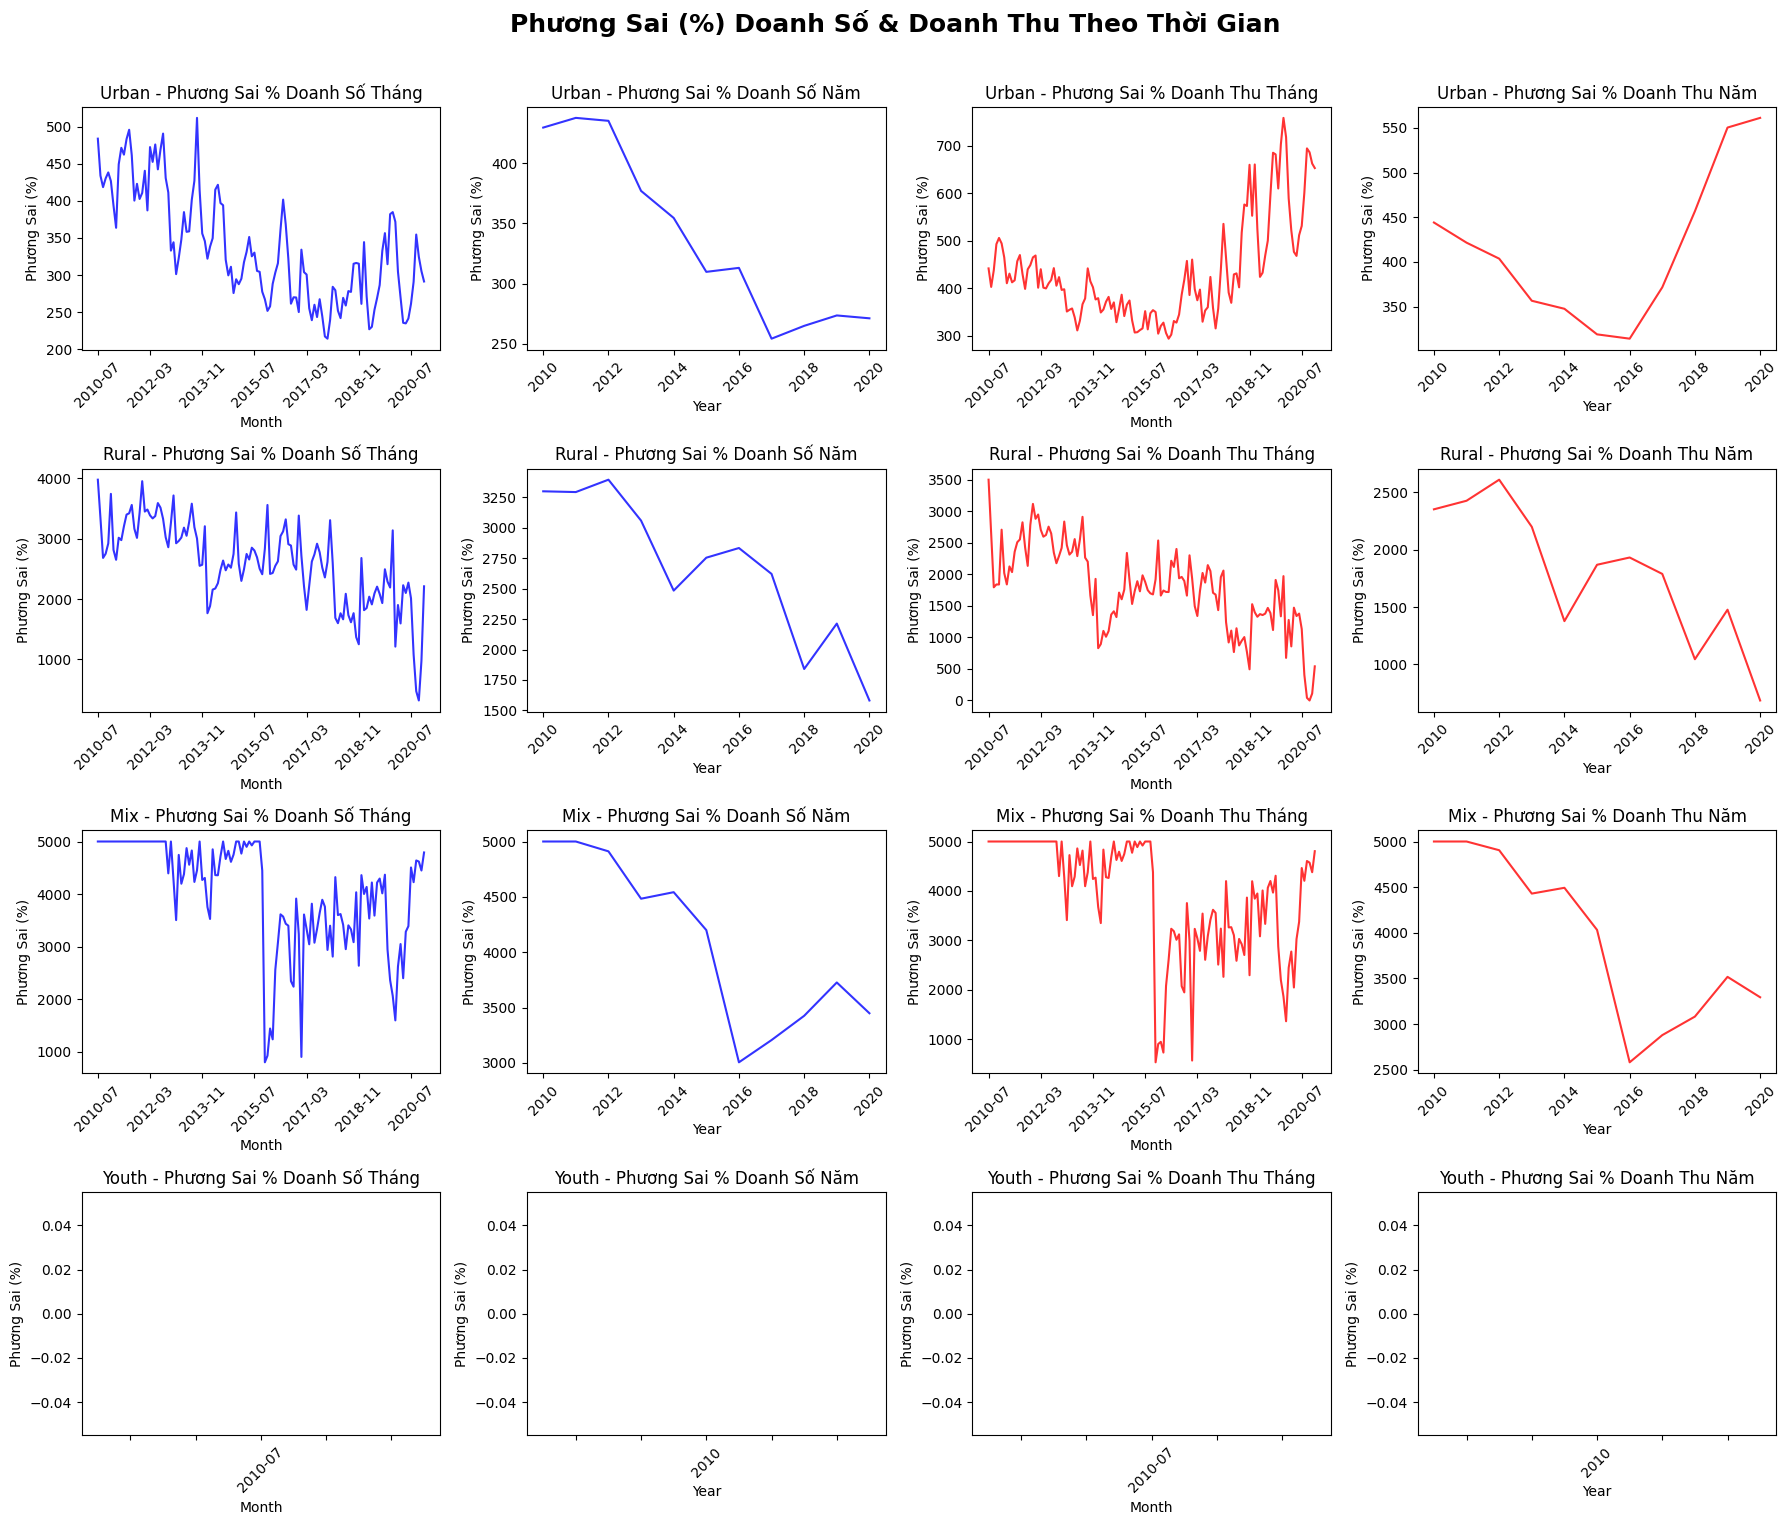

In [ ]:
# Chuyển cột Date về tháng và năm
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Year'] = df['Date'].dt.year.astype(str)

# Lấy danh sách các Category
categories = df['Category'].unique()

# Xác định số lượng hàng và cột
num_categories = len(categories)
rows = num_categories  # Mỗi Category chiếm 1 hàng
cols = 4  # 4 cột phương sai tỷ lệ

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))  
fig.suptitle('Phương Sai (%) Doanh Số & Doanh Thu Theo Thời Gian', fontsize=18, fontweight='bold')

# Duyệt qua từng Category và vẽ biểu đồ
for i, category in enumerate(categories):
    df_category = df[df['Category'] == category]

    # Nhóm dữ liệu theo Month & Year
    monthly_units = df_category.groupby(['Month', 'Segment'])['Units'].sum().unstack().fillna(0)
    yearly_units = df_category.groupby(['Year', 'Segment'])['Units'].sum().unstack().fillna(0)
    monthly_revenue = df_category.groupby(['Month', 'Segment'])['Revenue'].sum().unstack().fillna(0)
    yearly_revenue = df_category.groupby(['Year', 'Segment'])['Revenue'].sum().unstack().fillna(0)

    # Chuyển dữ liệu thành % theo tổng từng tháng/năm
    monthly_units_percent = monthly_units.div(monthly_units.sum(axis=1), axis=0) * 100
    yearly_units_percent = yearly_units.div(yearly_units.sum(axis=1), axis=0) * 100
    monthly_revenue_percent = monthly_revenue.div(monthly_revenue.sum(axis=1), axis=0) * 100
    yearly_revenue_percent = yearly_revenue.div(yearly_revenue.sum(axis=1), axis=0) * 100

    # 🎯 **Tính phương sai của tỷ lệ (%)**
    monthly_units_var_percent = monthly_units_percent.var(axis=1)
    yearly_units_var_percent = yearly_units_percent.var(axis=1)
    monthly_revenue_var_percent = monthly_revenue_percent.var(axis=1)
    yearly_revenue_var_percent = yearly_revenue_percent.var(axis=1)

    # 📌 **Vẽ các biểu đồ**
    # 1️⃣ Phương sai tỷ lệ doanh số theo tháng
    monthly_units_var_percent.plot(ax=axes[i, 0], linestyle='-', color='blue', alpha=0.8)
    axes[i, 0].set_title(f"{category} - Phương Sai % Doanh Số Tháng")
    axes[i, 0].set_ylabel("Phương Sai (%)")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # 2️⃣ Phương sai tỷ lệ doanh số theo năm
    yearly_units_var_percent.plot(ax=axes[i, 1], linestyle='-', color='blue', alpha=0.8)
    axes[i, 1].set_title(f"{category} - Phương Sai % Doanh Số Năm")
    axes[i, 1].set_ylabel("Phương Sai (%)")
    axes[i, 1].tick_params(axis='x', rotation=45)

    # 3️⃣ Phương sai tỷ lệ doanh thu theo tháng
    monthly_revenue_var_percent.plot(ax=axes[i, 2], linestyle='-', color='red', alpha=0.8)
    axes[i, 2].set_title(f"{category} - Phương Sai % Doanh Thu Tháng")
    axes[i, 2].set_ylabel("Phương Sai (%)")
    axes[i, 2].tick_params(axis='x', rotation=45)

    # 4️⃣ Phương sai tỷ lệ doanh thu theo năm
    yearly_revenue_var_percent.plot(ax=axes[i, 3], linestyle='-', color='red', alpha=0.8)
    axes[i, 3].set_title(f"{category} - Phương Sai % Doanh Thu Năm")
    axes[i, 3].set_ylabel("Phương Sai (%)")
    axes[i, 3].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
